In [41]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem
import scienceplots
from cmcrameri import cm

In [42]:
plt.style.use(['science', 'ieee'])

In [50]:
df = pd.read_csv("data.csv", index_col="index")
df["RMSE"] = np.sqrt(df["MSE"])
print(df)

df_pattern = df.loc[df.seed.str.match('^pattern.*')]
# df_pattern["RMSE"] = np.sqrt(df_pattern["MSE"])
df_structure = df.loc[df.seed.str.match('^structure.*')]
# df_structure["RMSE"] = np.sqrt(df_structure["MSE"])
space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]

          code       group               seed phase  epoch       MSE      RMSE
index                                                                         
0       100179    I -4 3 m    pattern_random0  test    100  0.009270  0.096282
1       100202      P a -3    pattern_random0  test    100  0.003467  0.058881
2       100547  F d -3 m Z    pattern_random0  test    100  0.000058  0.007588
3       100569       I 2 3    pattern_random0  test    100  0.033810  0.183874
4       100614    I a -3 d    pattern_random0  test    100  0.001777  0.042153
...        ...         ...                ...   ...    ...       ...       ...
684965   99623    P -4 3 m  structure_random0   val     80  0.001139  0.033751
684966   99626    P -4 3 m  structure_random0   val     80  0.000710  0.026653
684967   99627    P -4 3 m  structure_random0   val     80  0.003469  0.058898
684968    9979  F d -3 m Z  structure_random0   val     80  0.000008  0.002752
684969    9988    F 41 3 2  structure_random0   val 

: 

0.08471612660376013
0.0009676623130924006


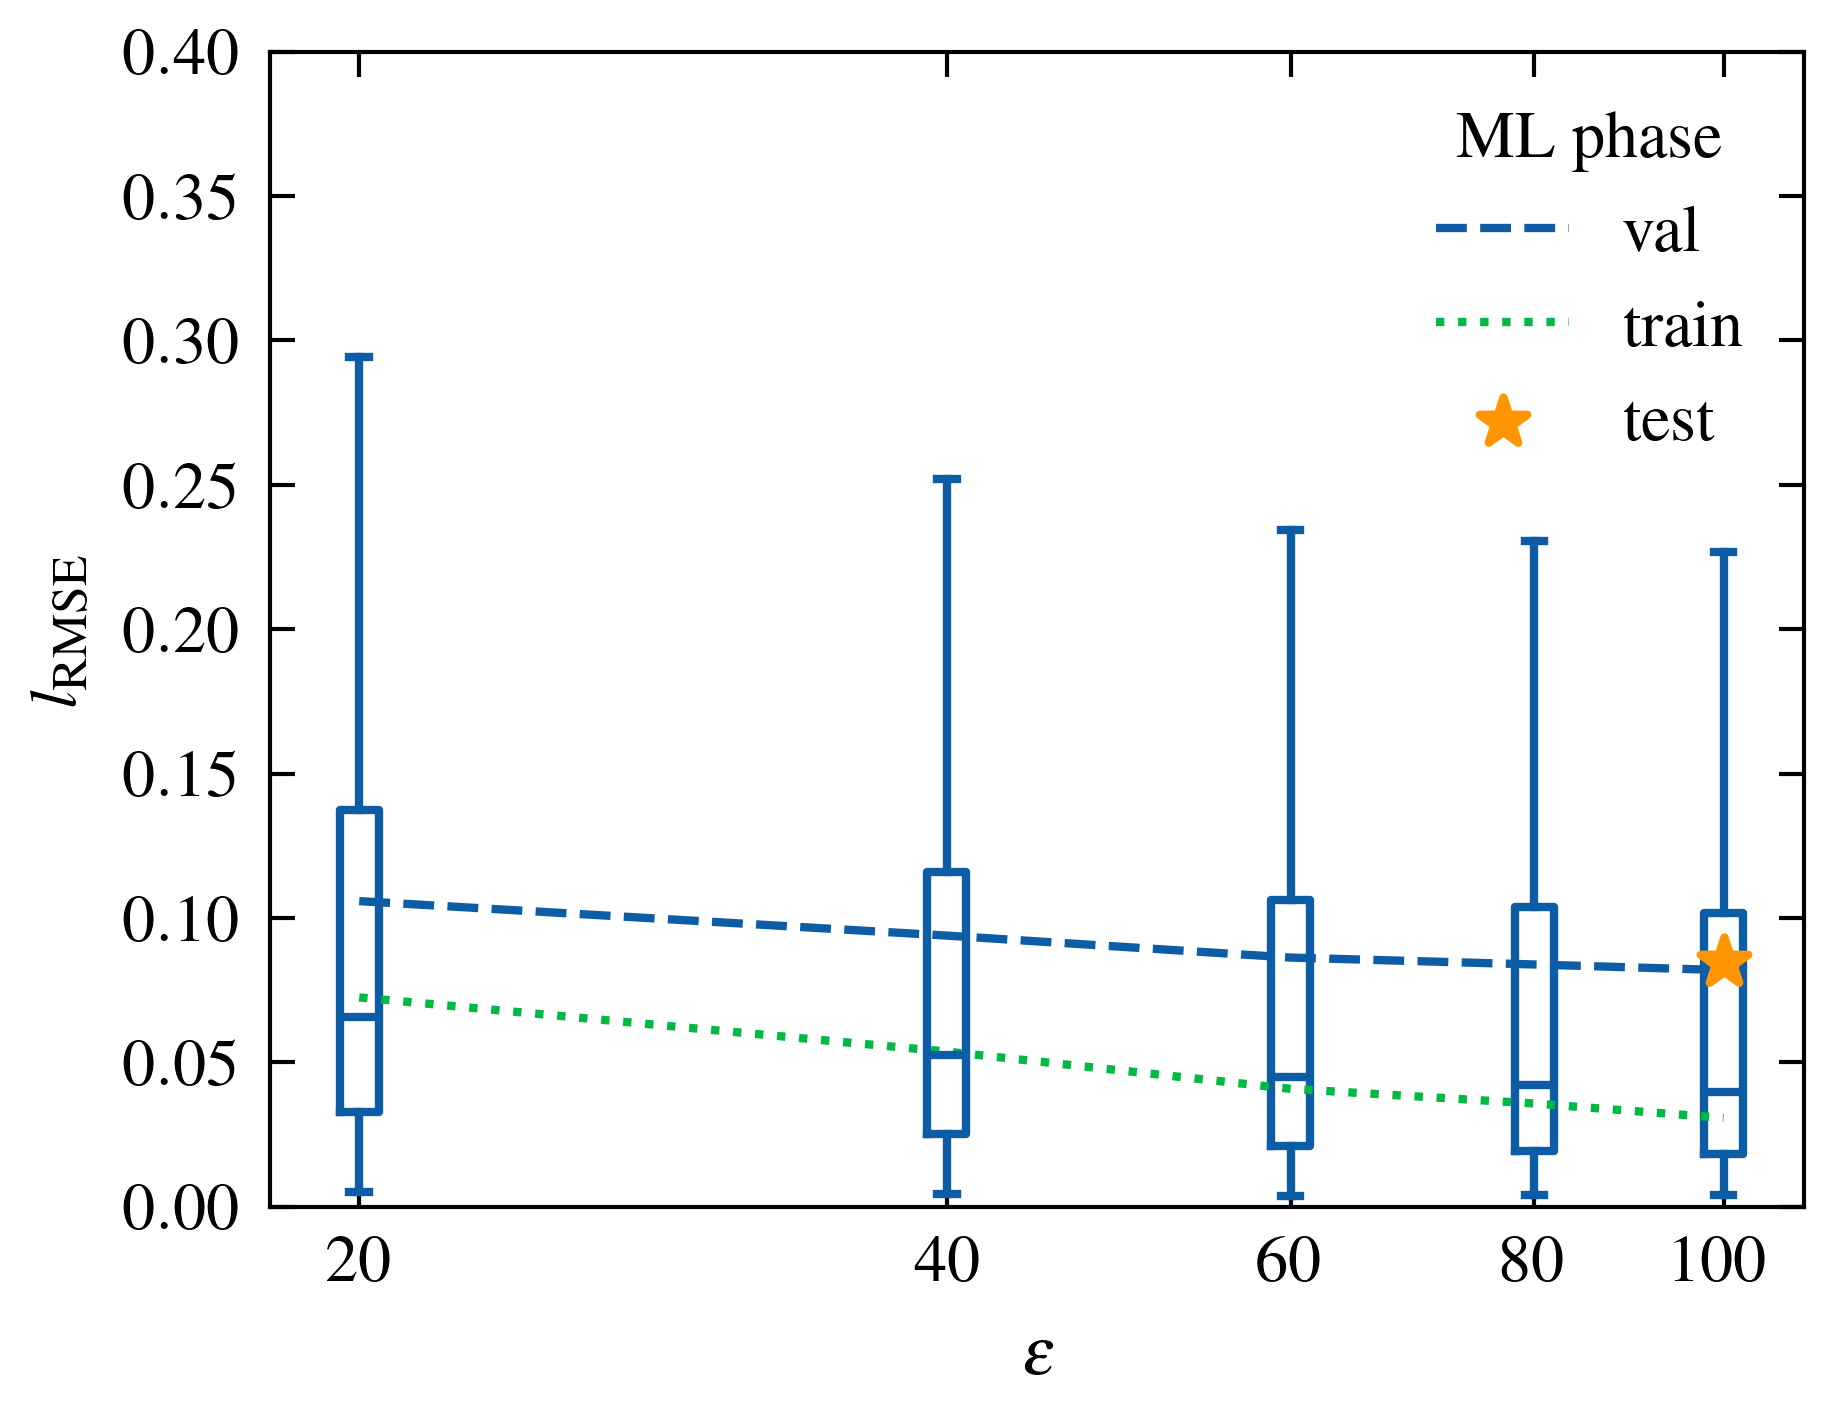

In [44]:
epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{\text{RMSE}}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

# c_train = next(colors)
# next(colors)
# next(colors)
# c_test = next(colors)
# c_val = next(colors)
c_box = dict(color="#0C5DA5")


average_rmse = df_pattern.groupby(['phase', 'epoch'])['RMSE'].mean().reset_index()


print(np.mean(df_pattern.query("phase == 'test' & epoch == 100")["RMSE"]))
print(sem(df_pattern.query("phase == 'test' & epoch == 100")["RMSE"]))


for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_rmse.loc[average_rmse['phase'] == phase]
    
    if phase == "train":
        c = "#00B945"
    else:
        c = "#0C5DA5"
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], df_average_mse_phase["RMSE"], label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(df_pattern.loc[(df_pattern['phase'] == phase) & (df_pattern['epoch'] == epoch)]["RMSE"], positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)

# Scatter point
df_test = average_rmse.loc[average_rmse['phase'] == "test"]
df_test_std = df_pattern.groupby(['phase', 'epoch'])['RMSE'].std().reset_index()

ax.scatter(100, df_test.loc[df_test["epoch"] == 100]["RMSE"], label="test", marker="*", zorder=2, color="#FF9500")

ax.legend(title='ML phase')
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 0.4])
ax.set(**pparam)

fig.savefig('figures/training_pattern', dpi=1200)

C:\Users\joe\AppData\Local\Temp\ipykernel_28140\2821335811.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


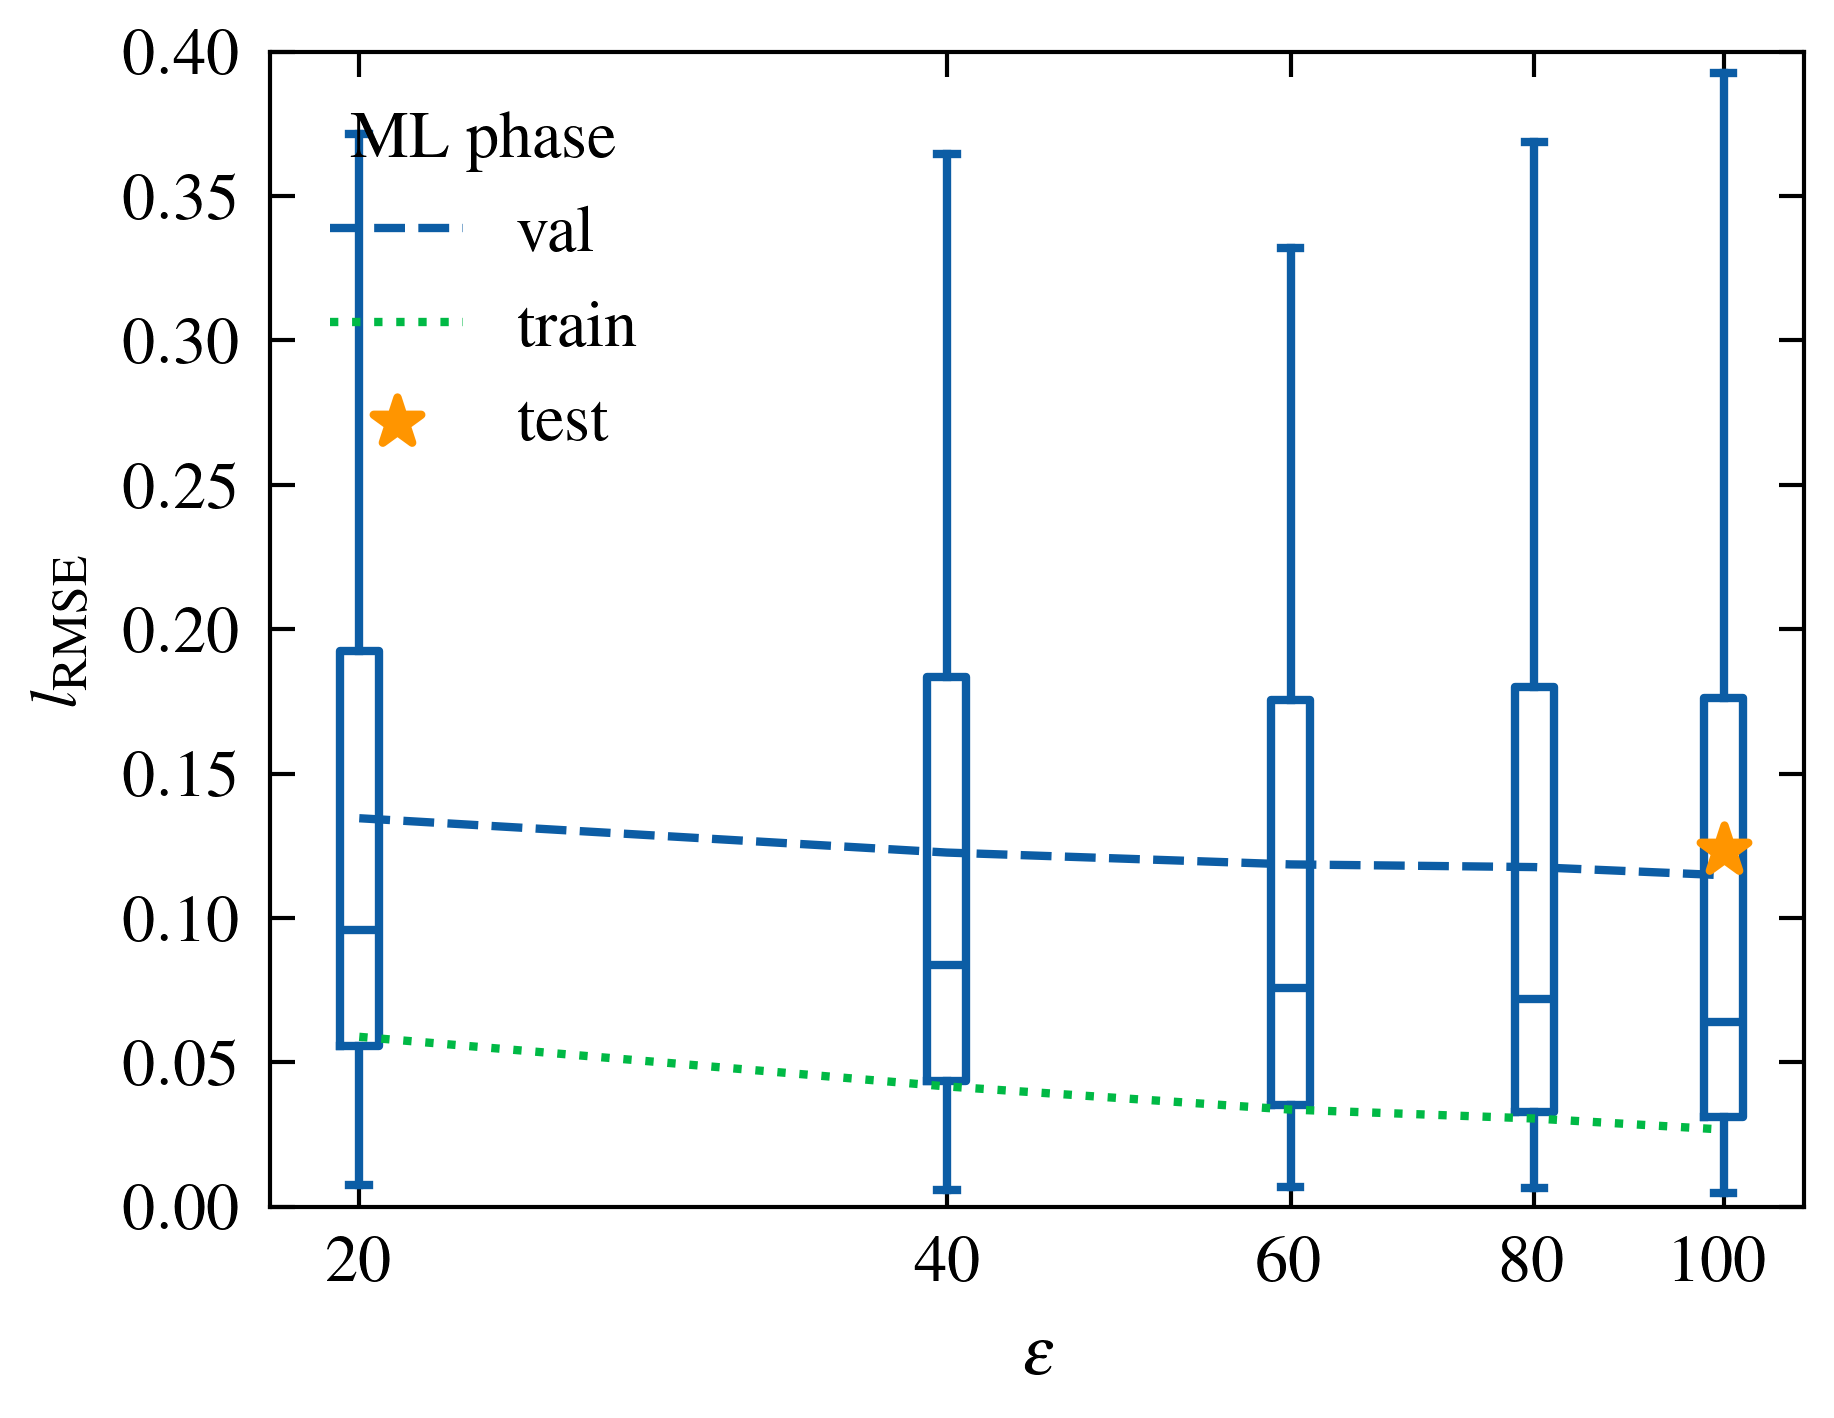

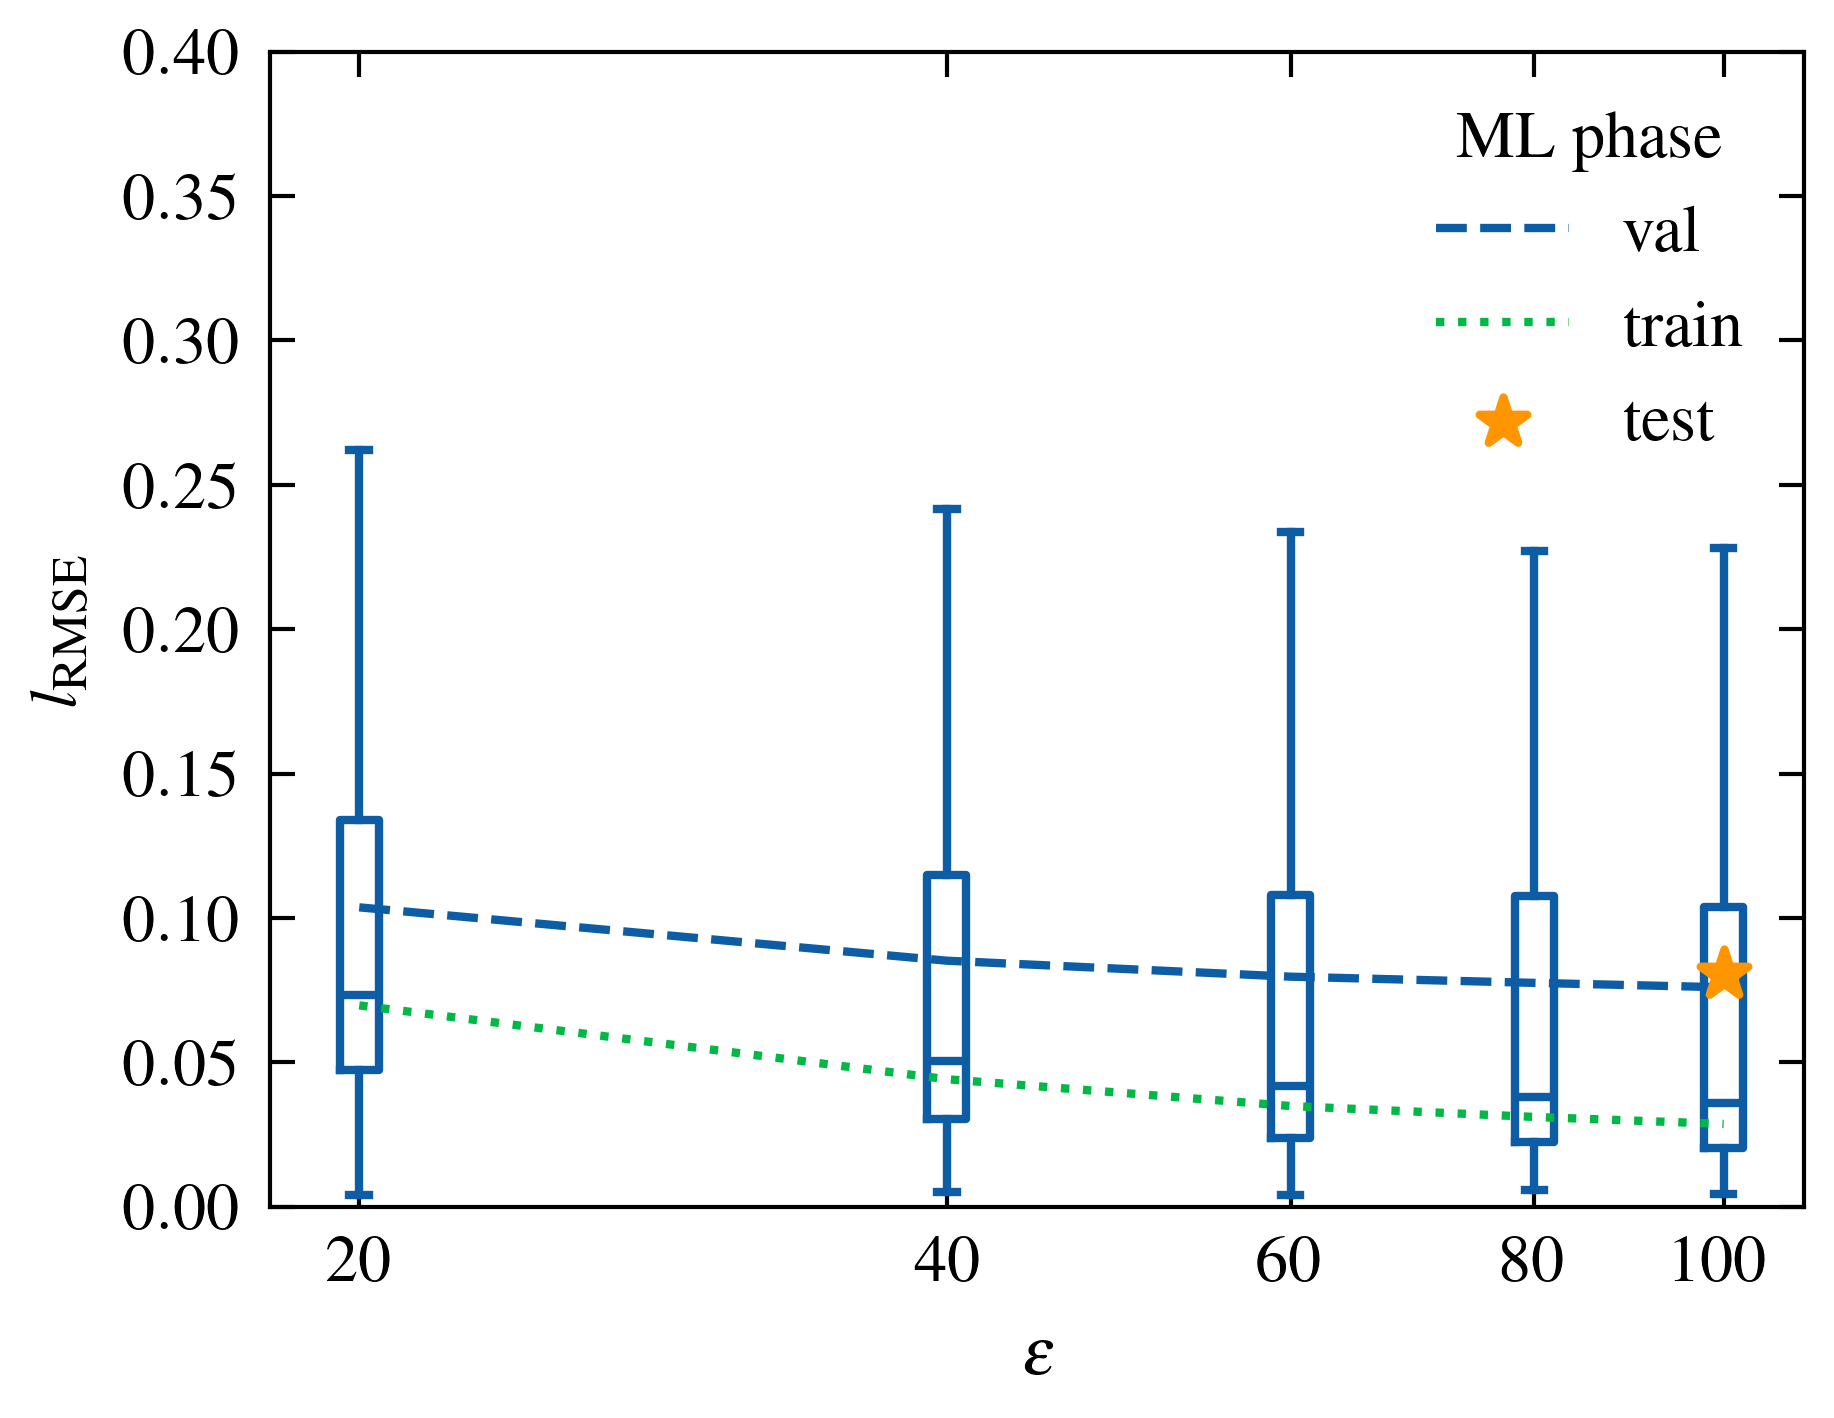

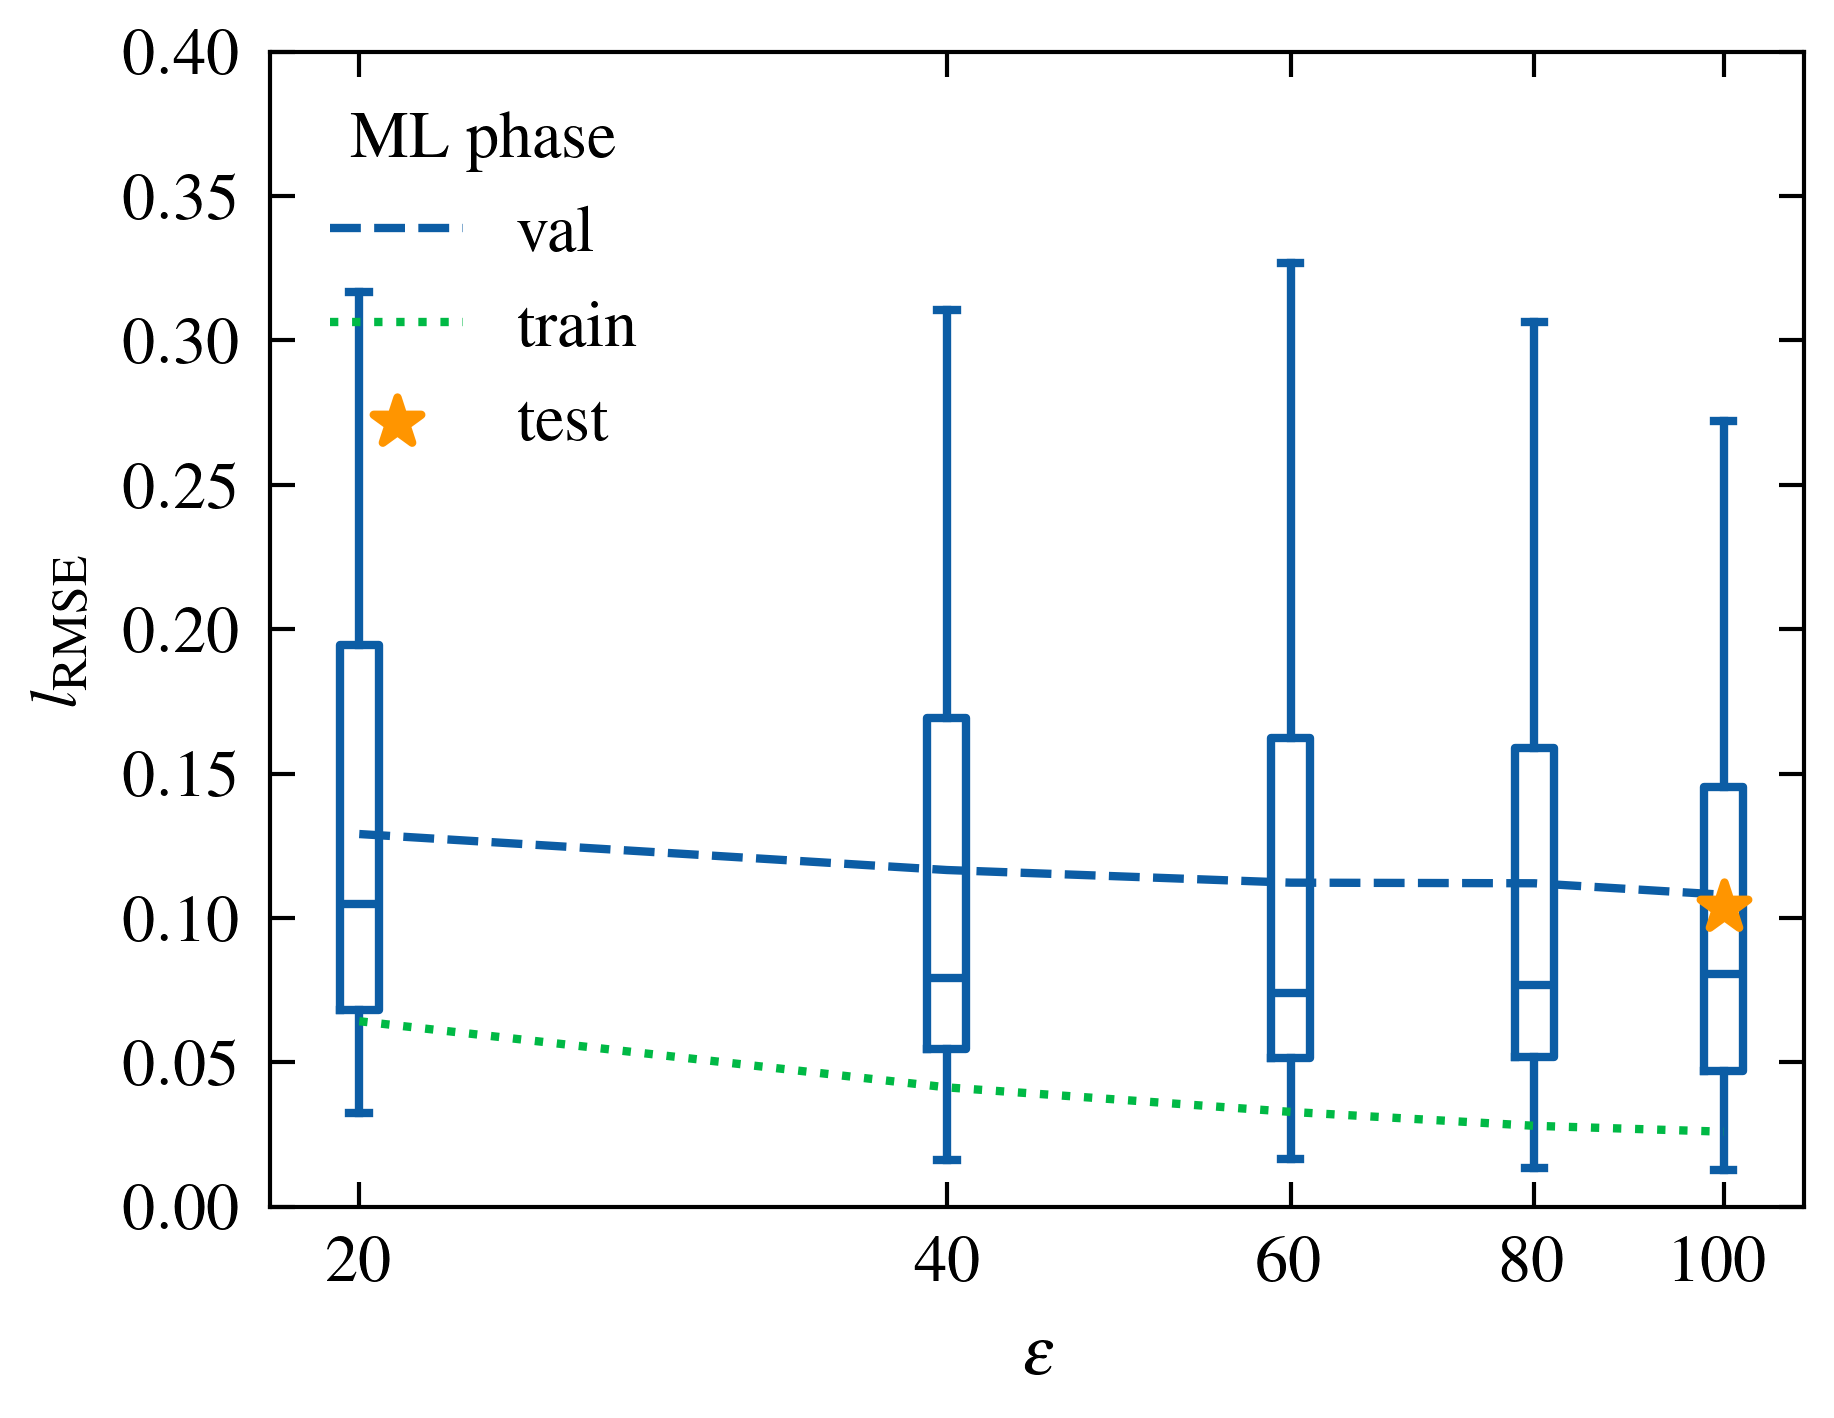

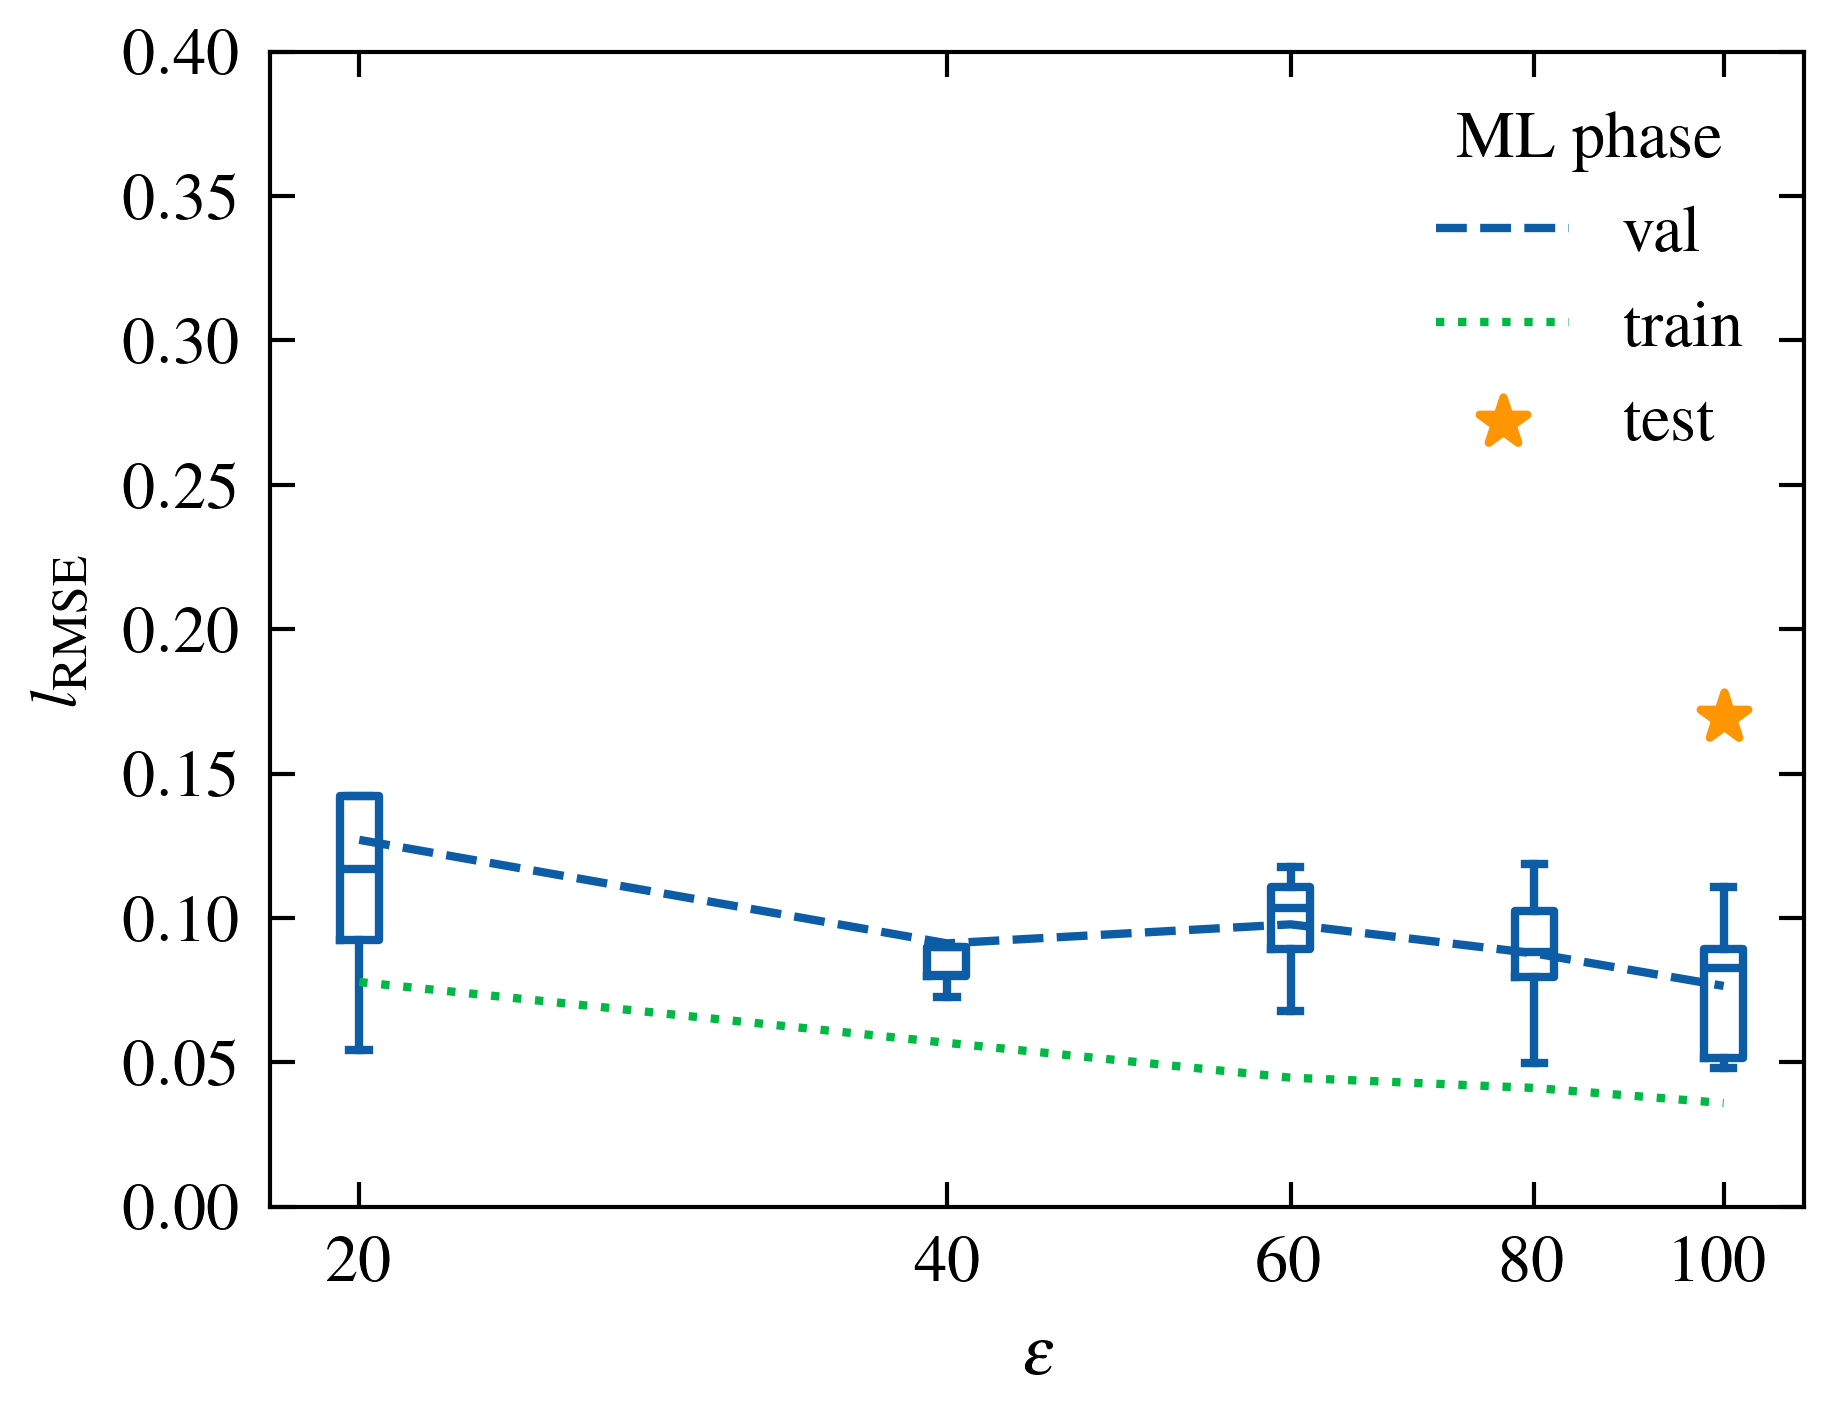

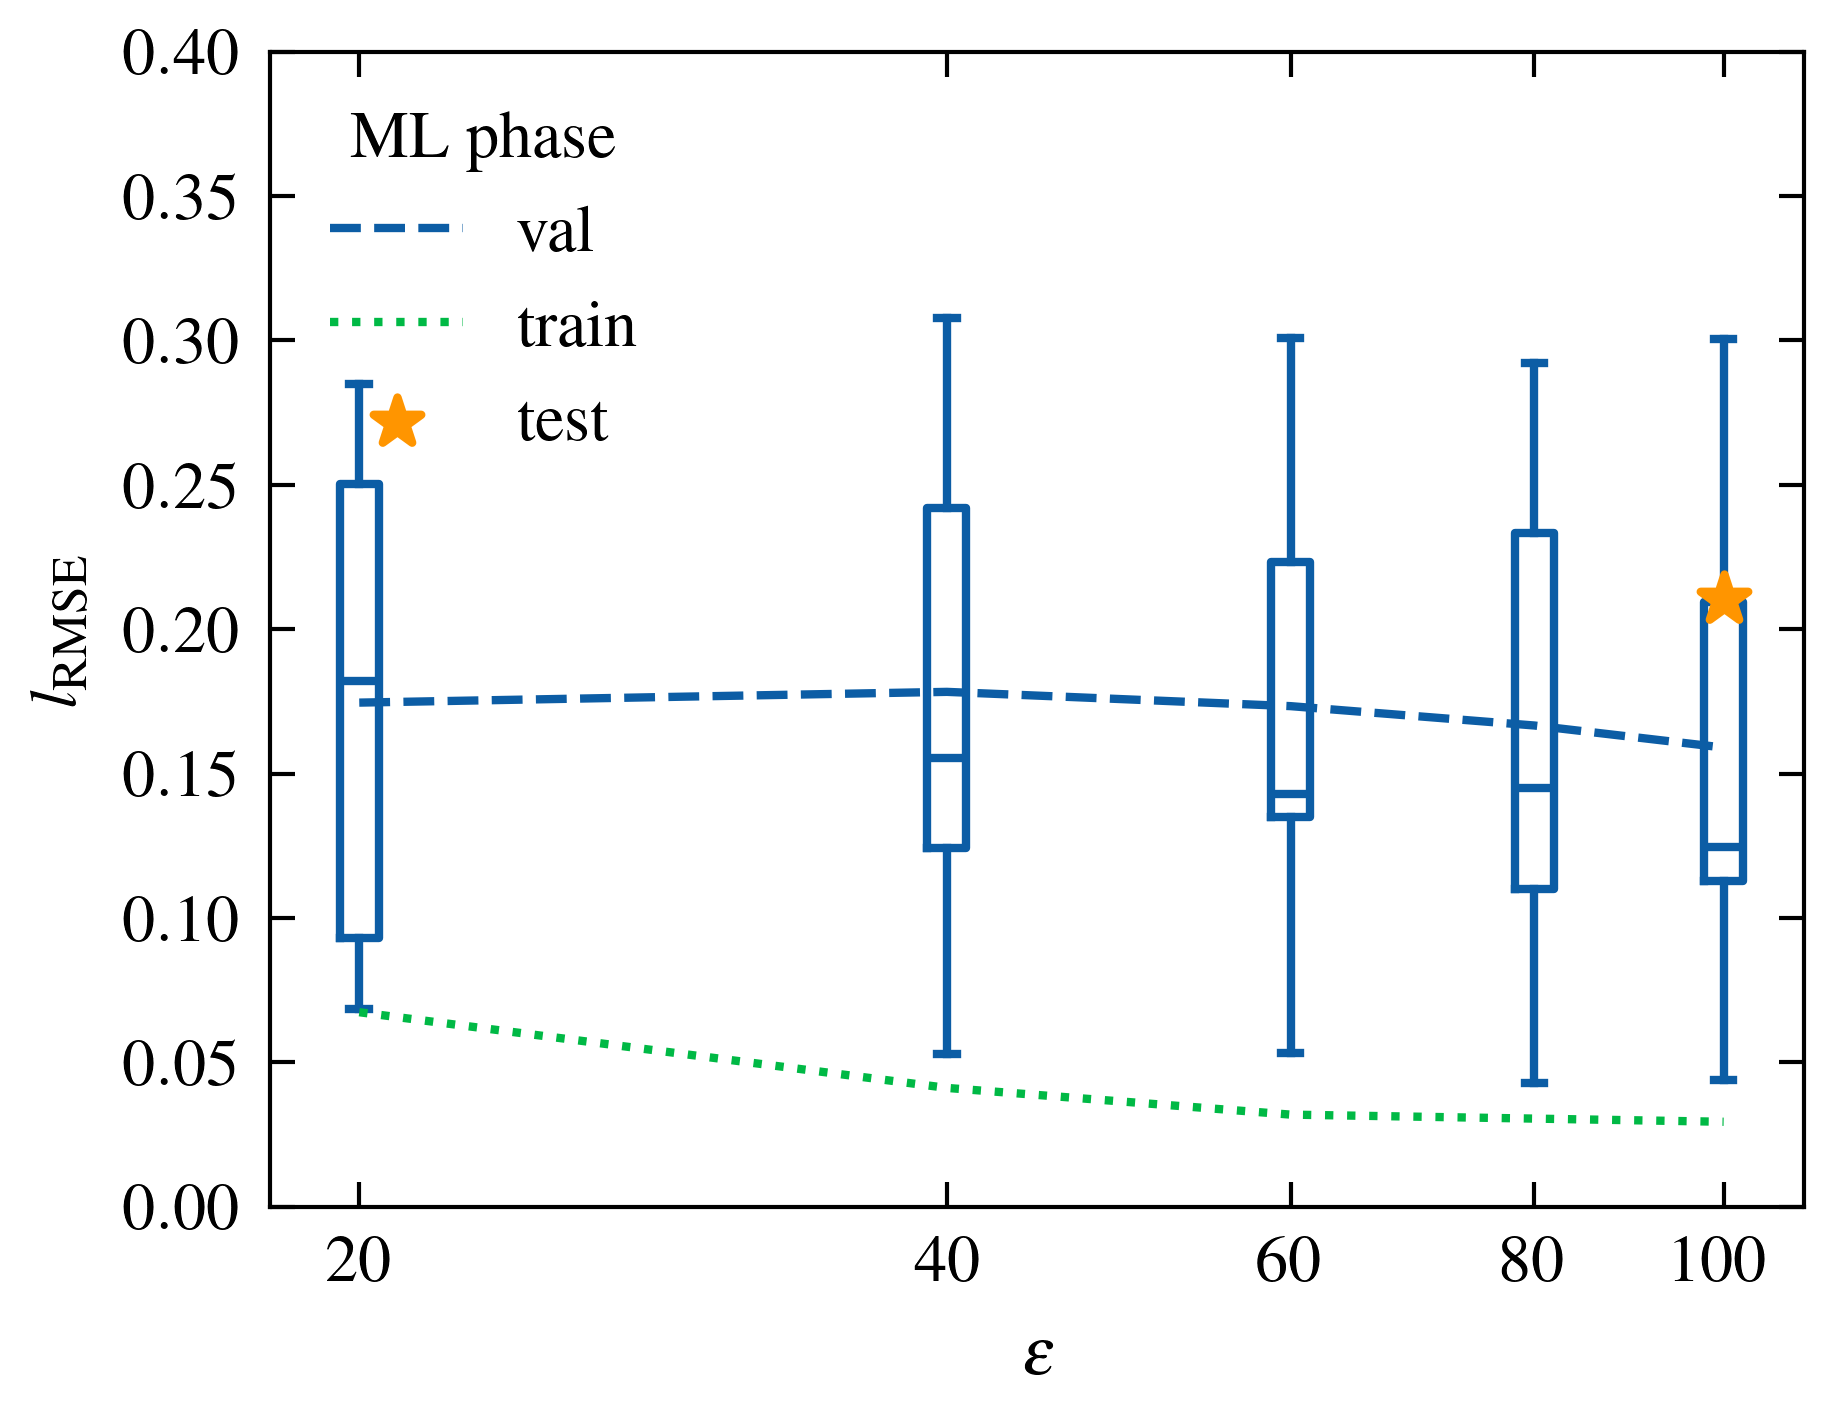

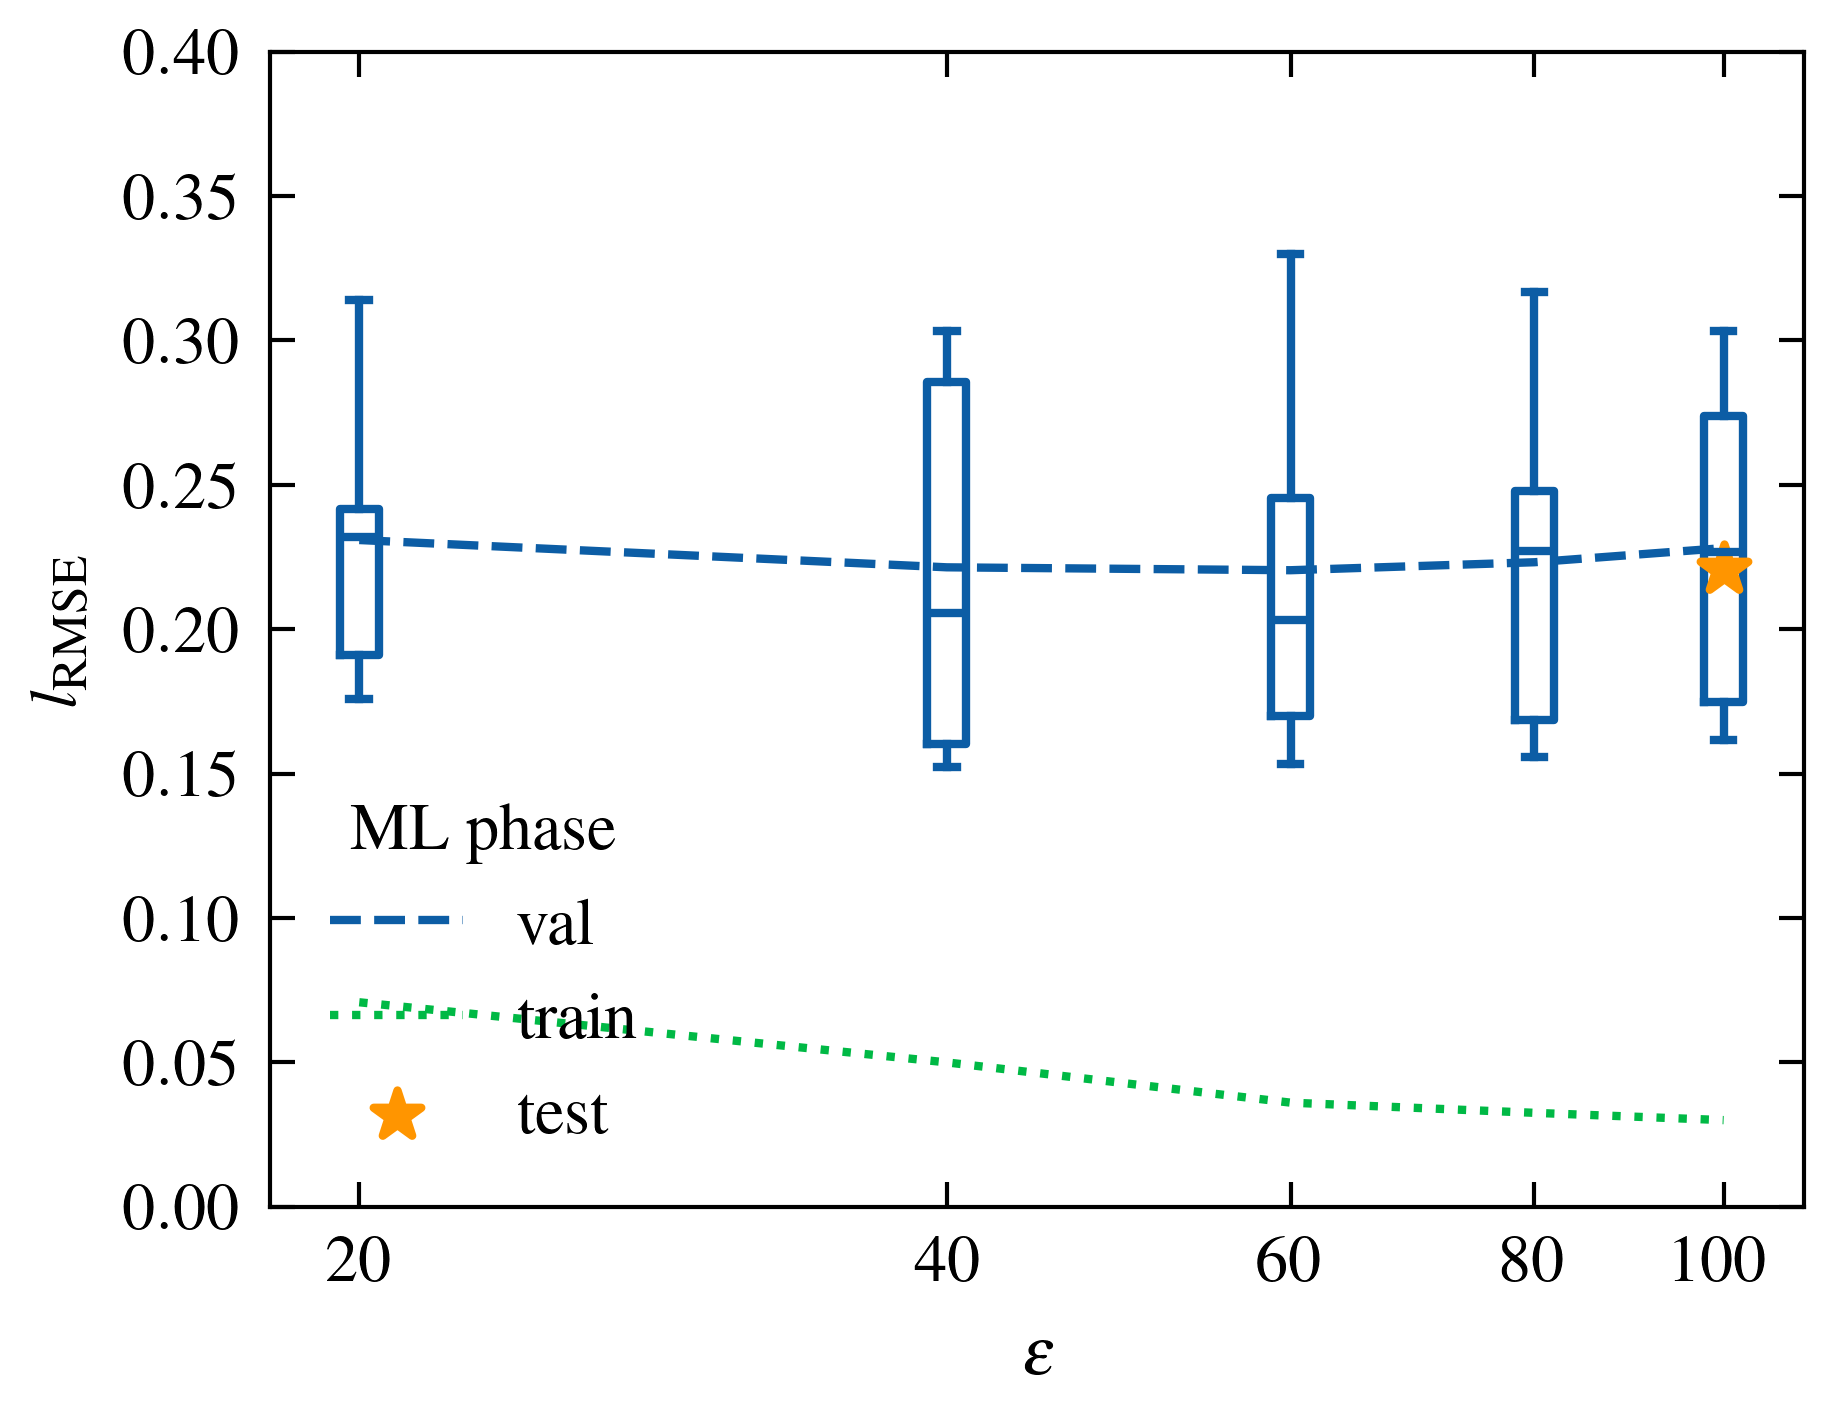

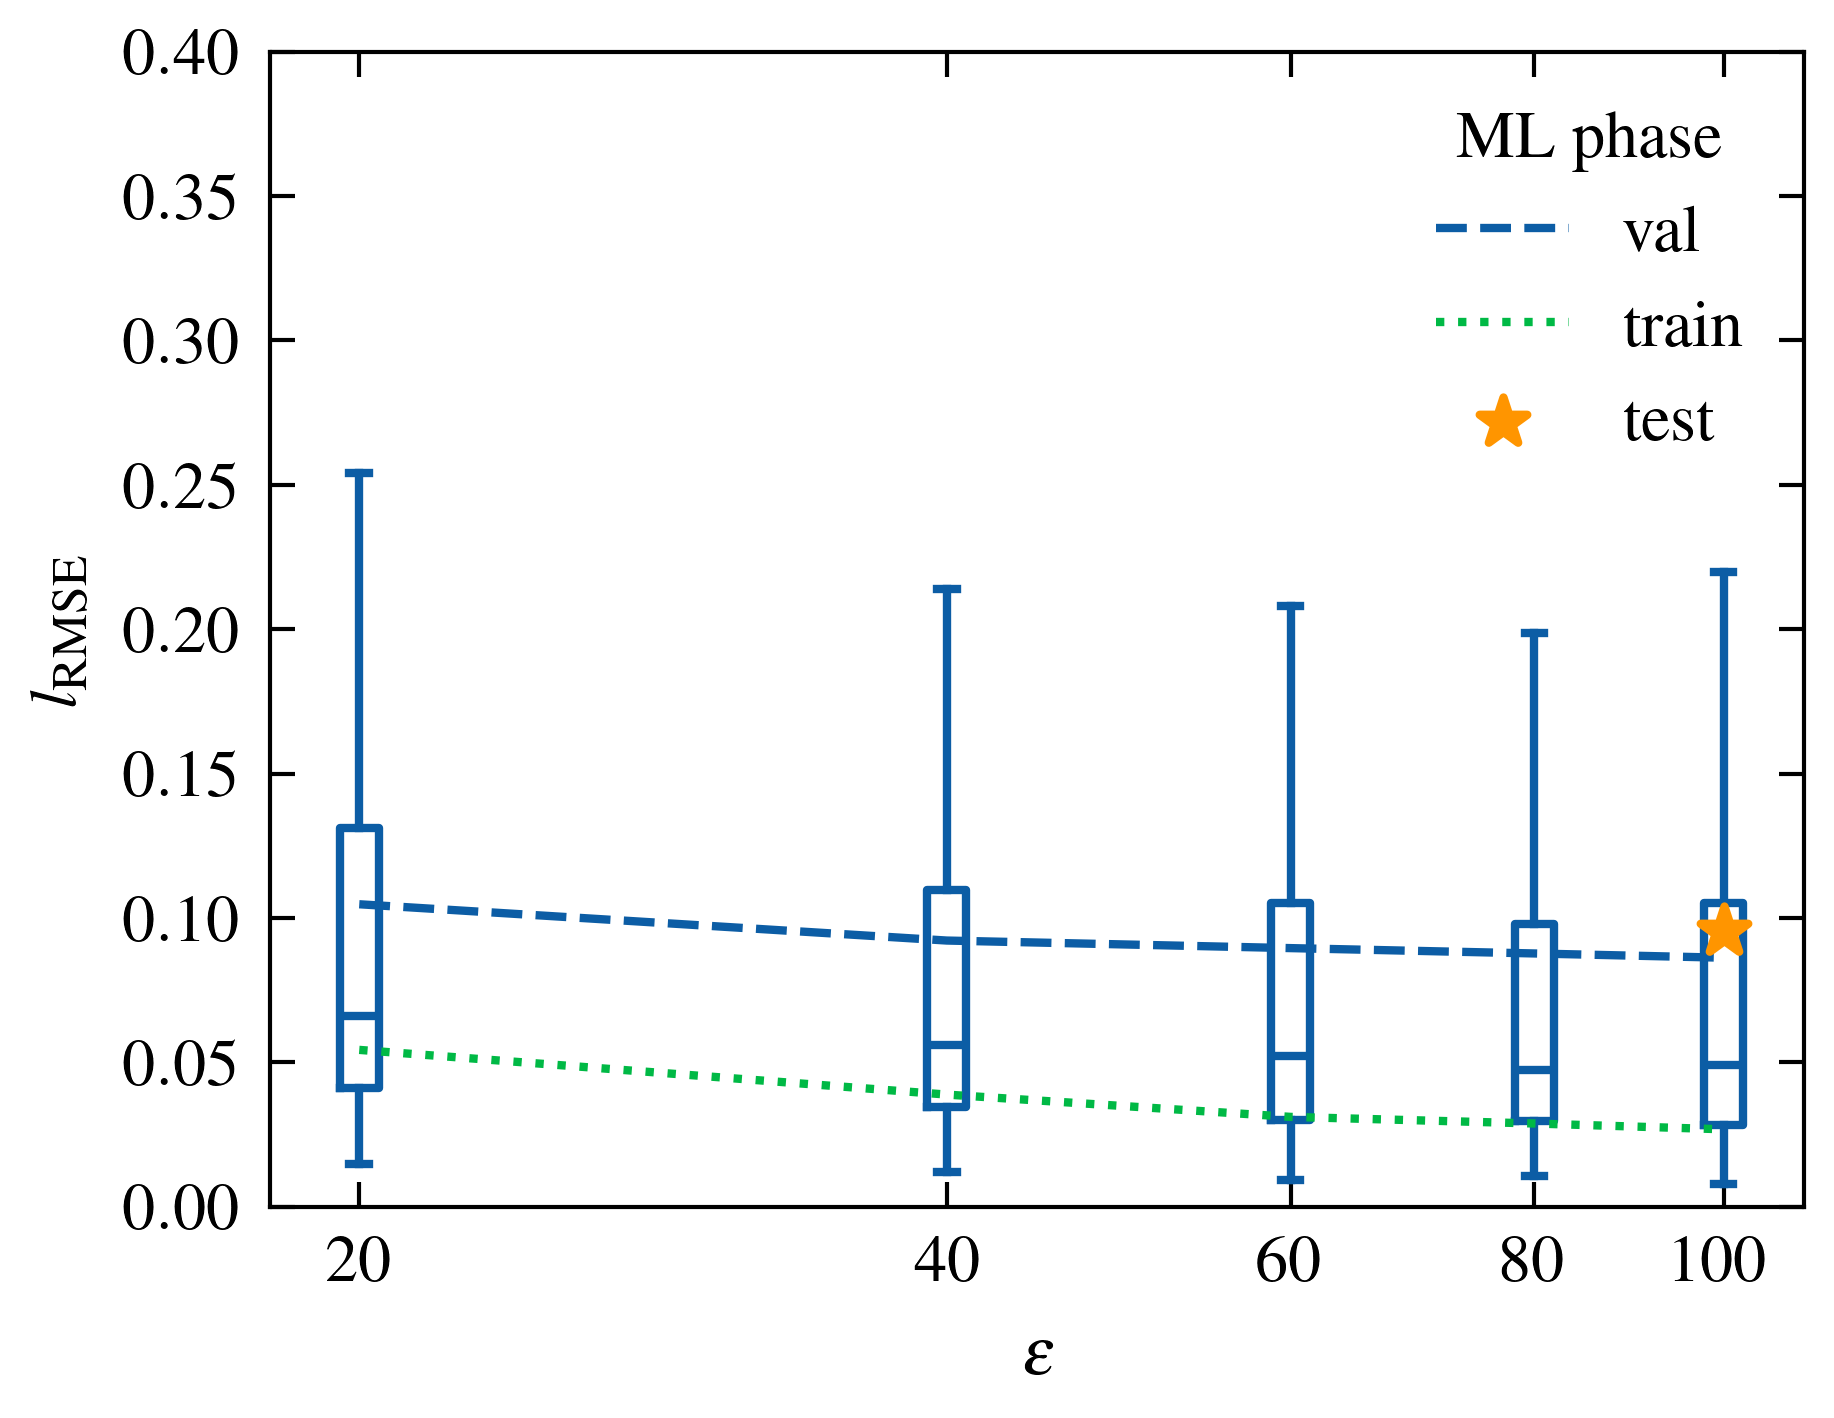

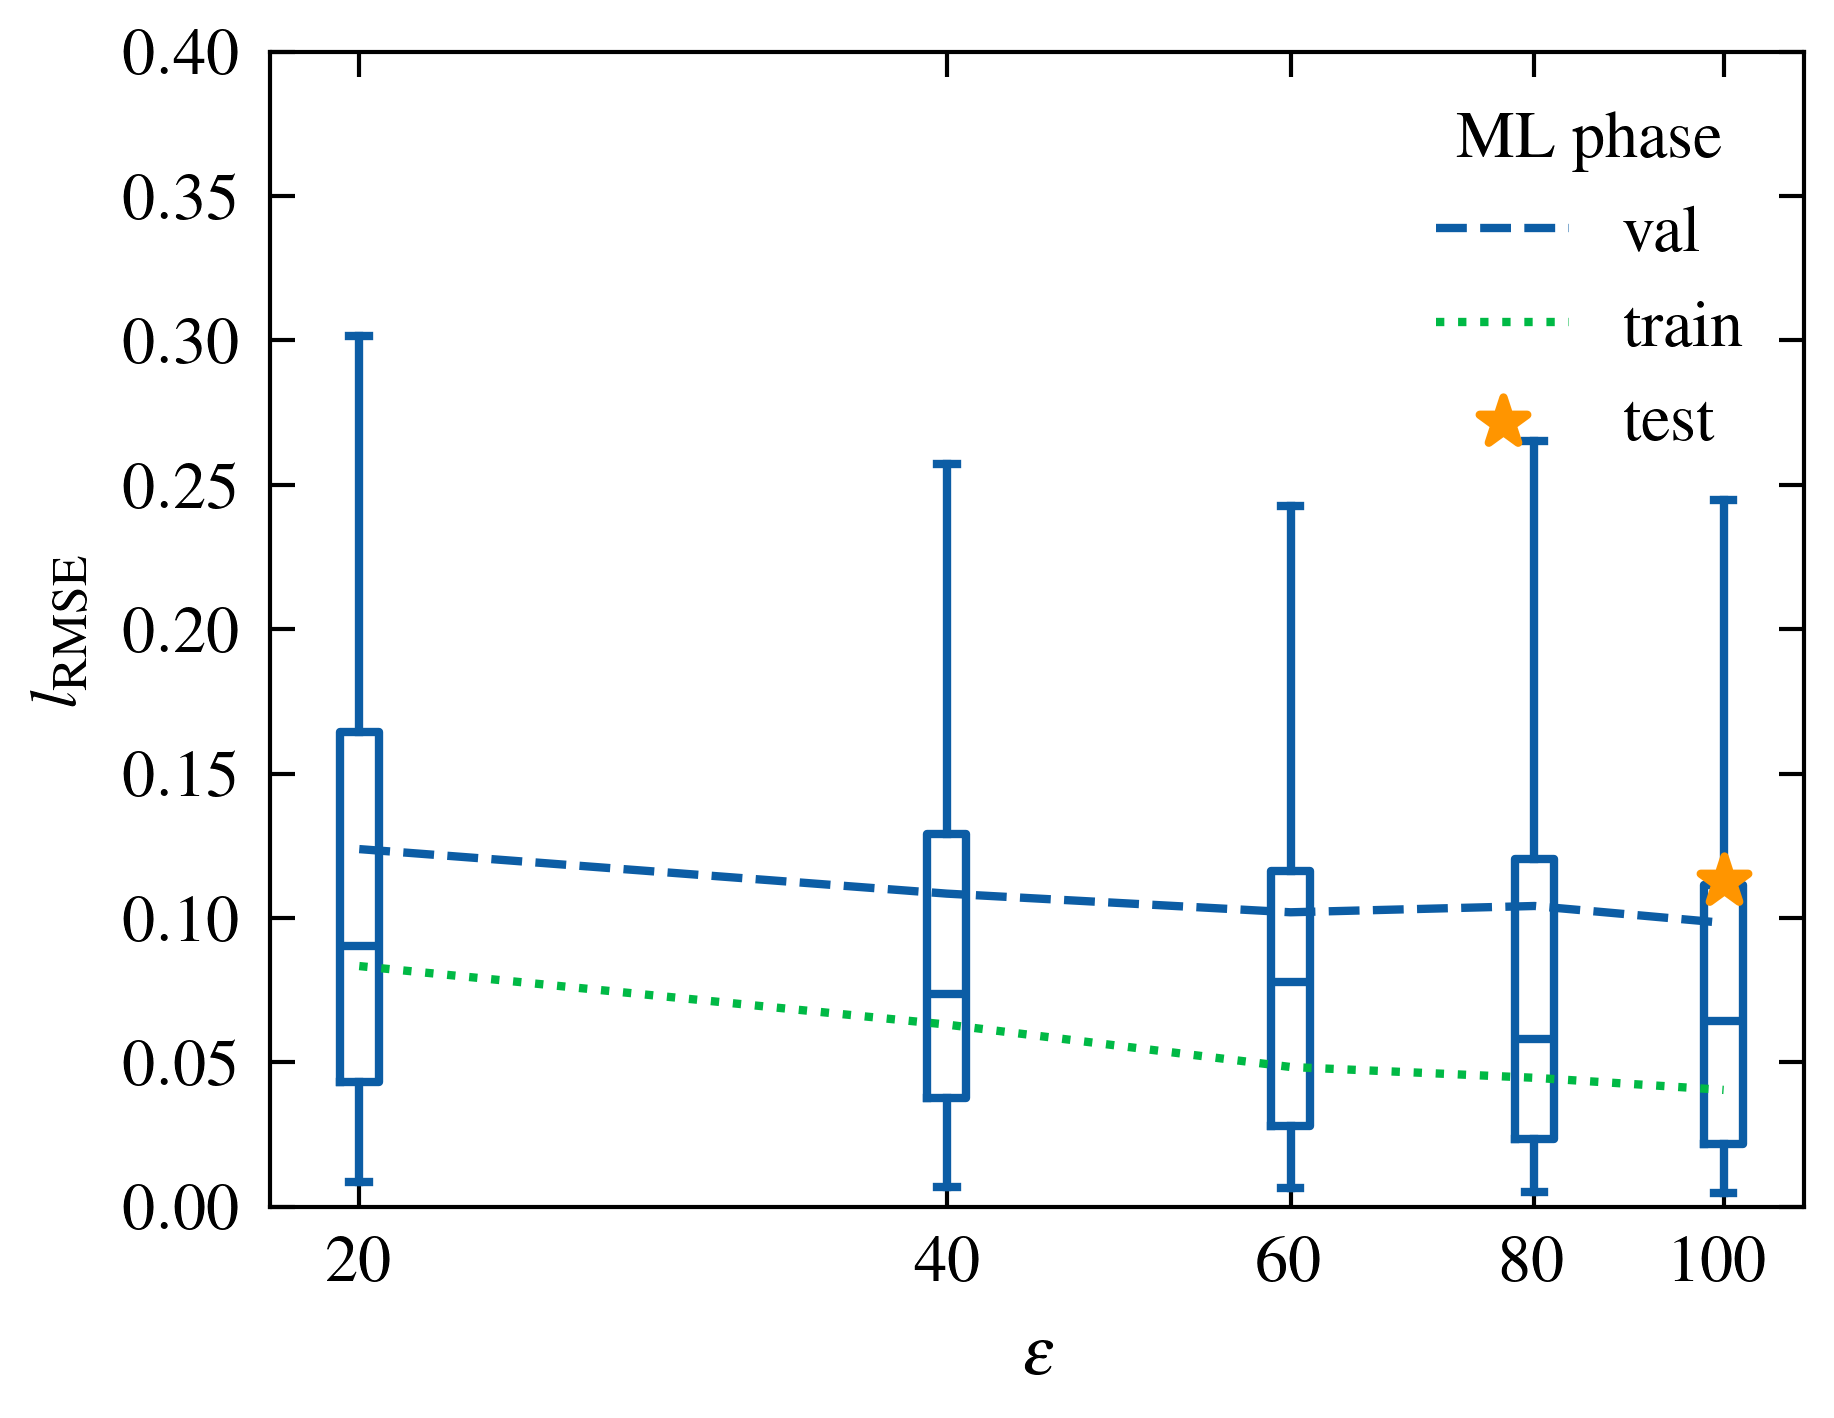

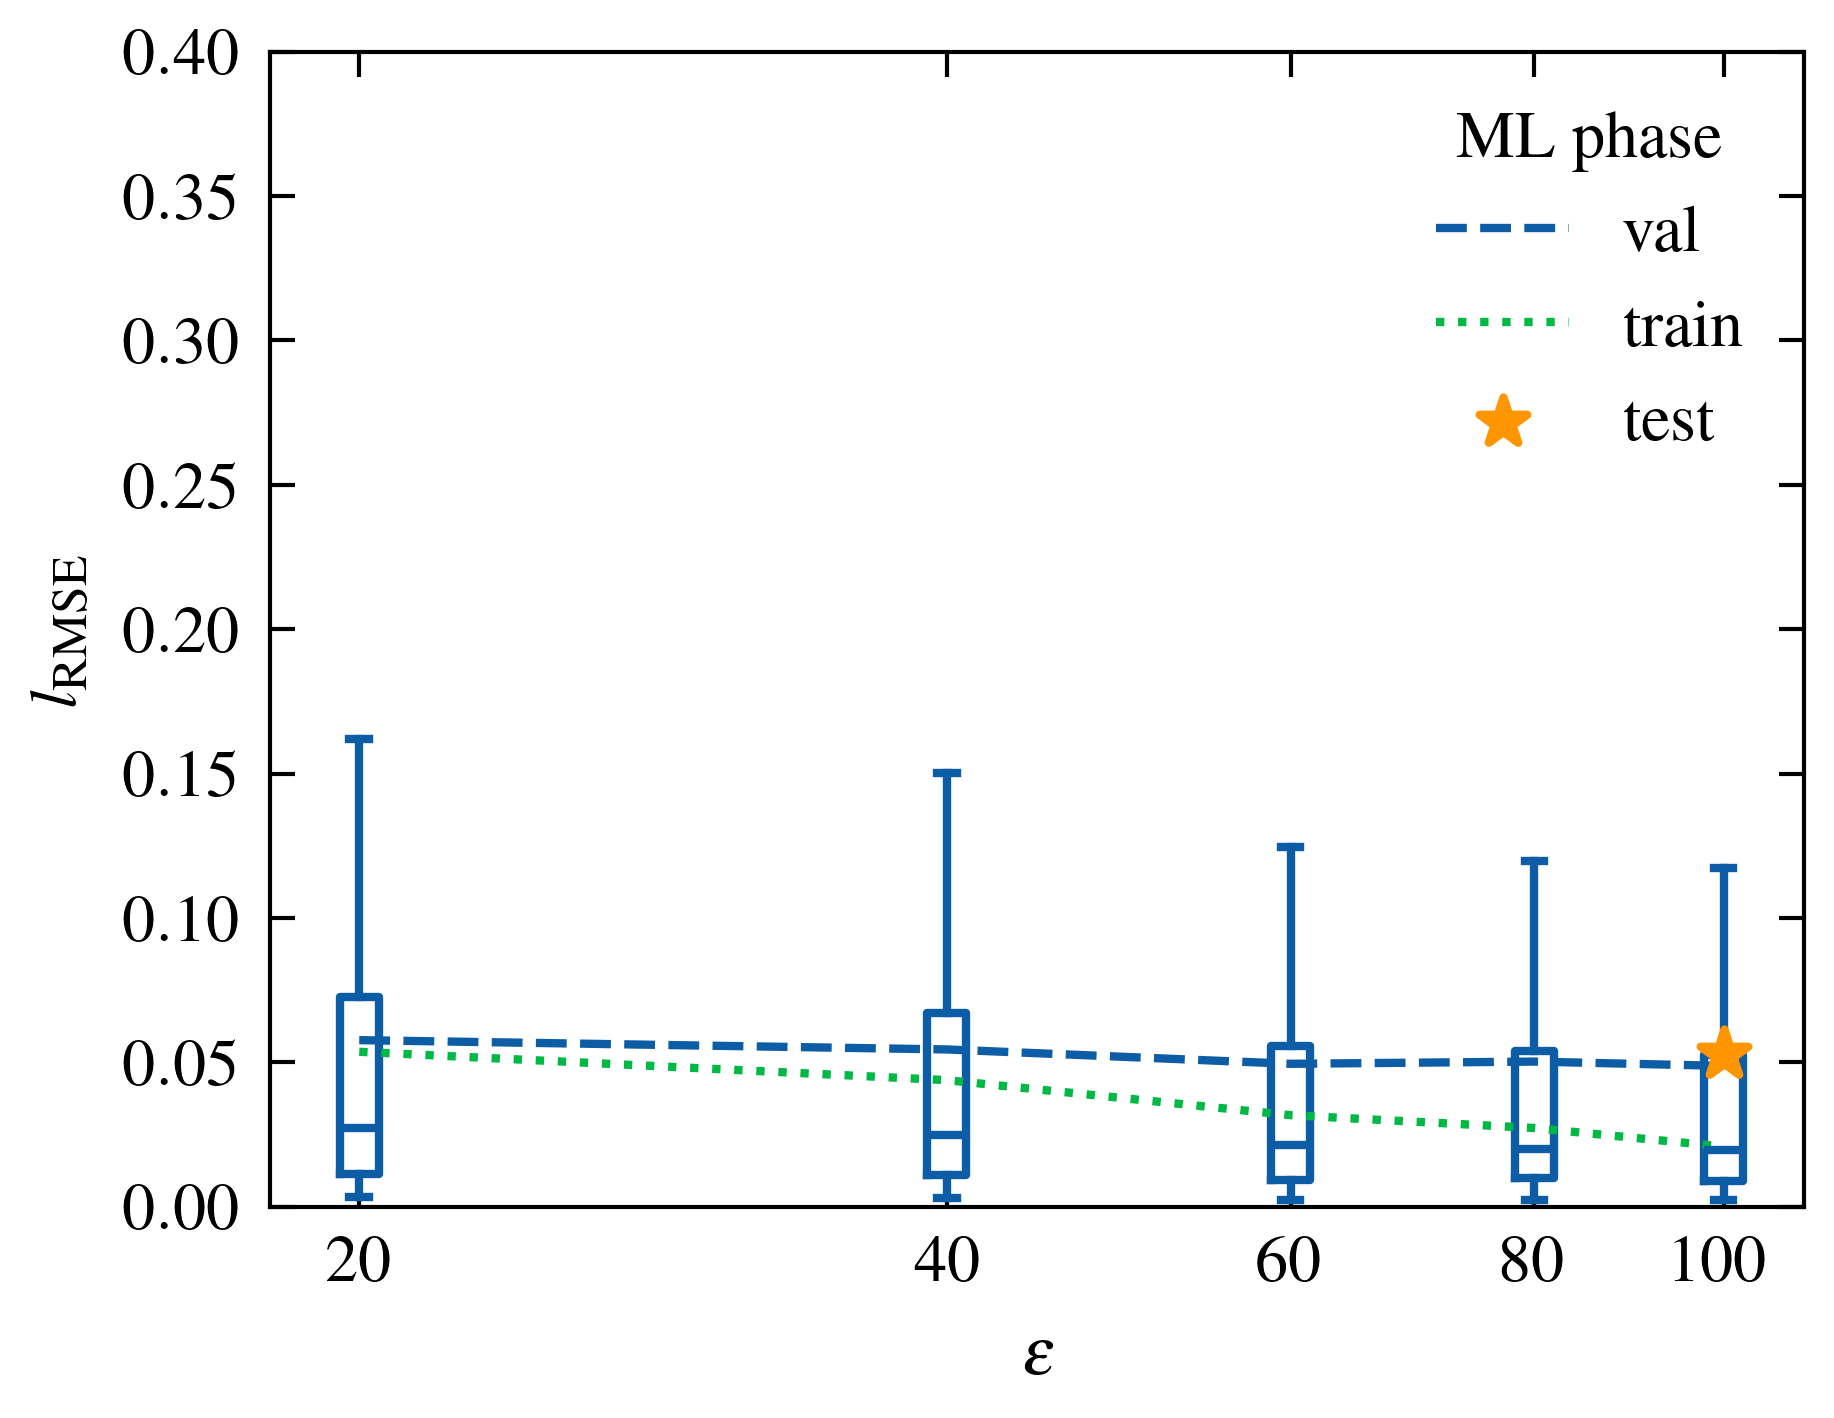

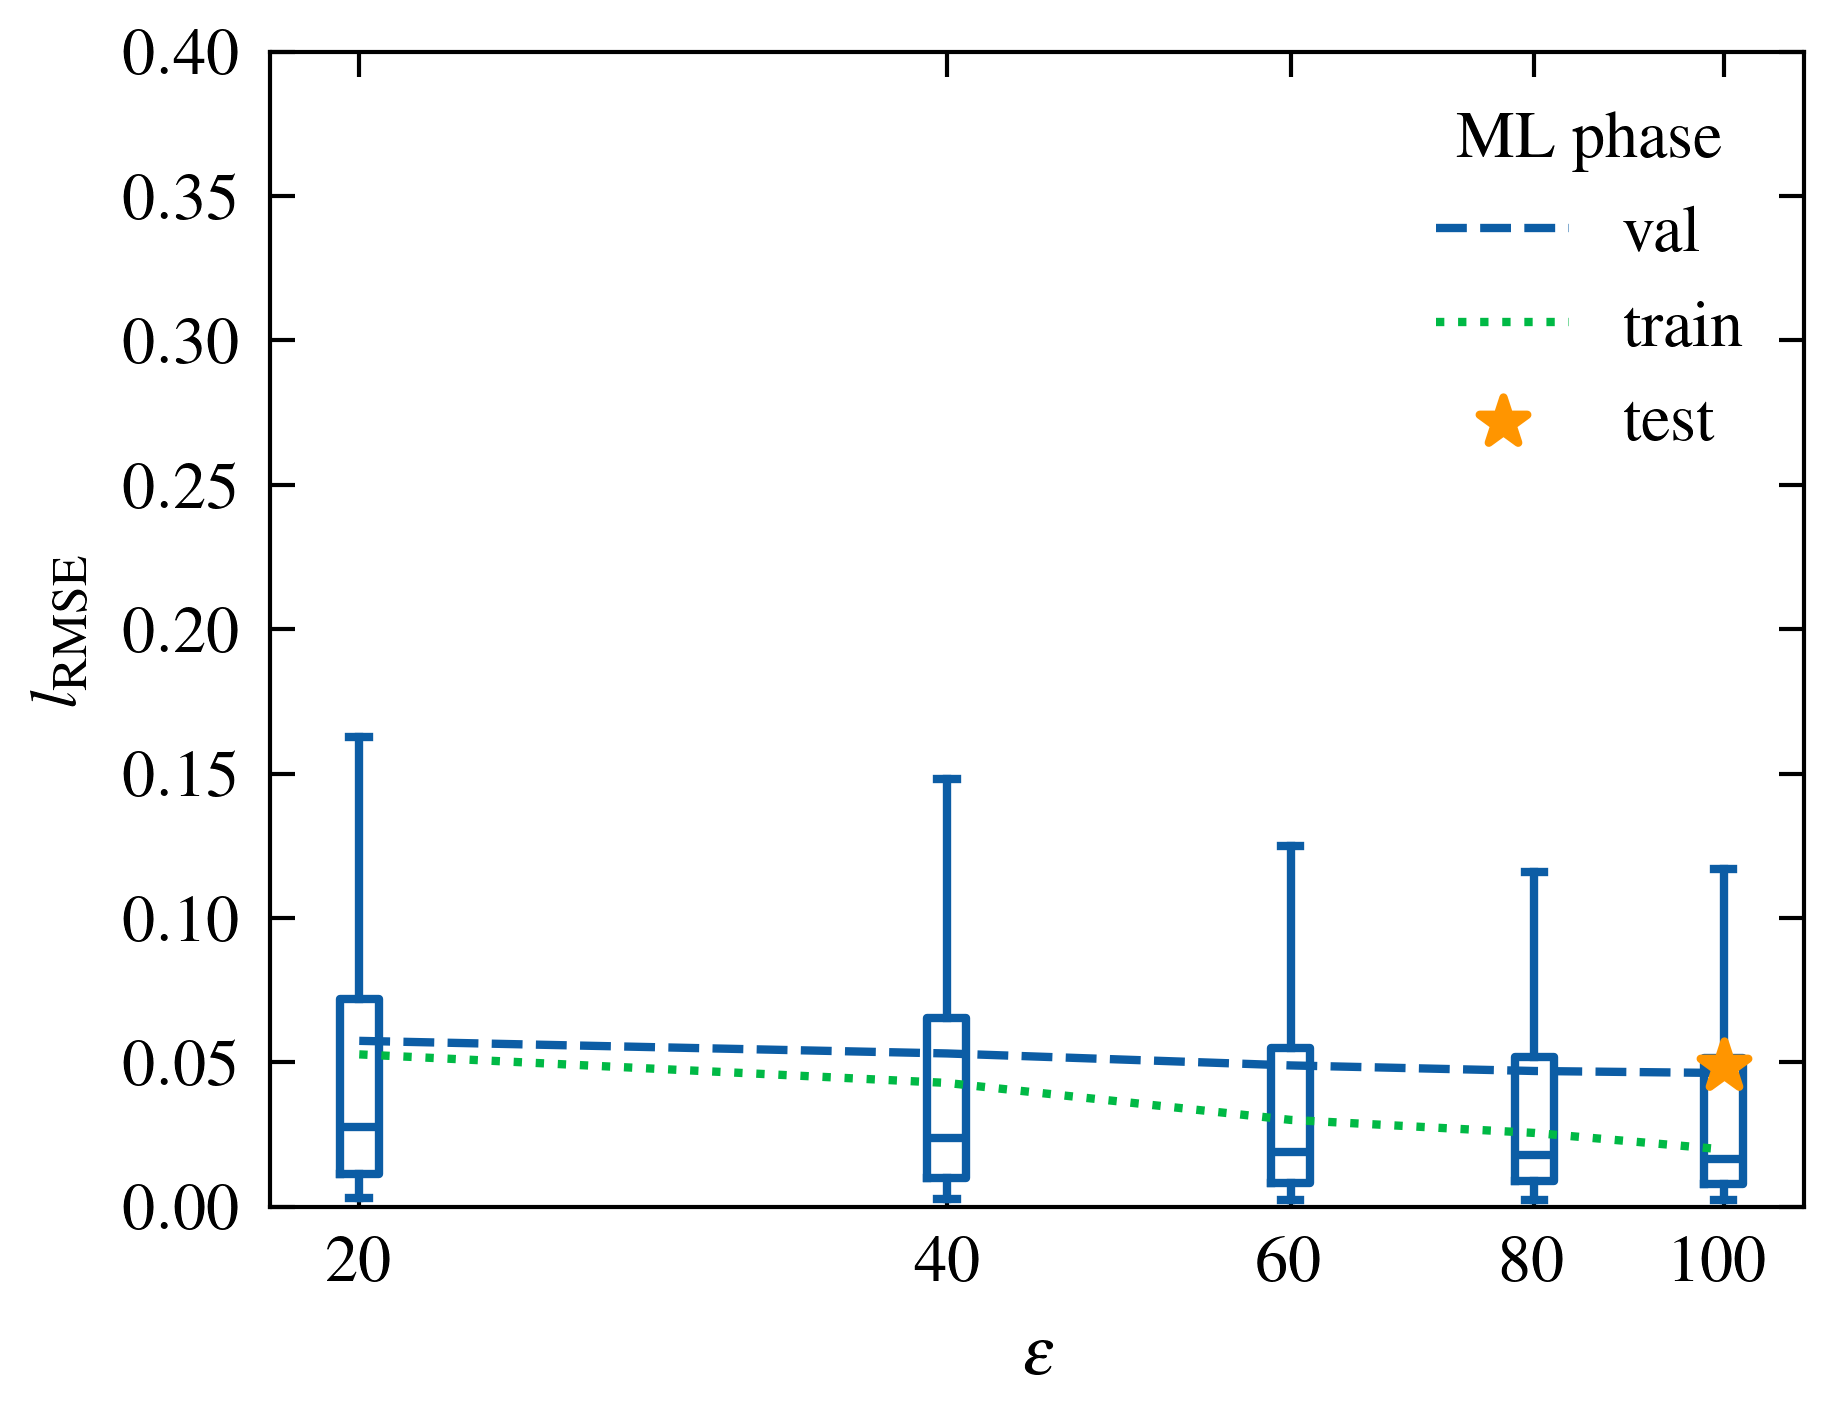

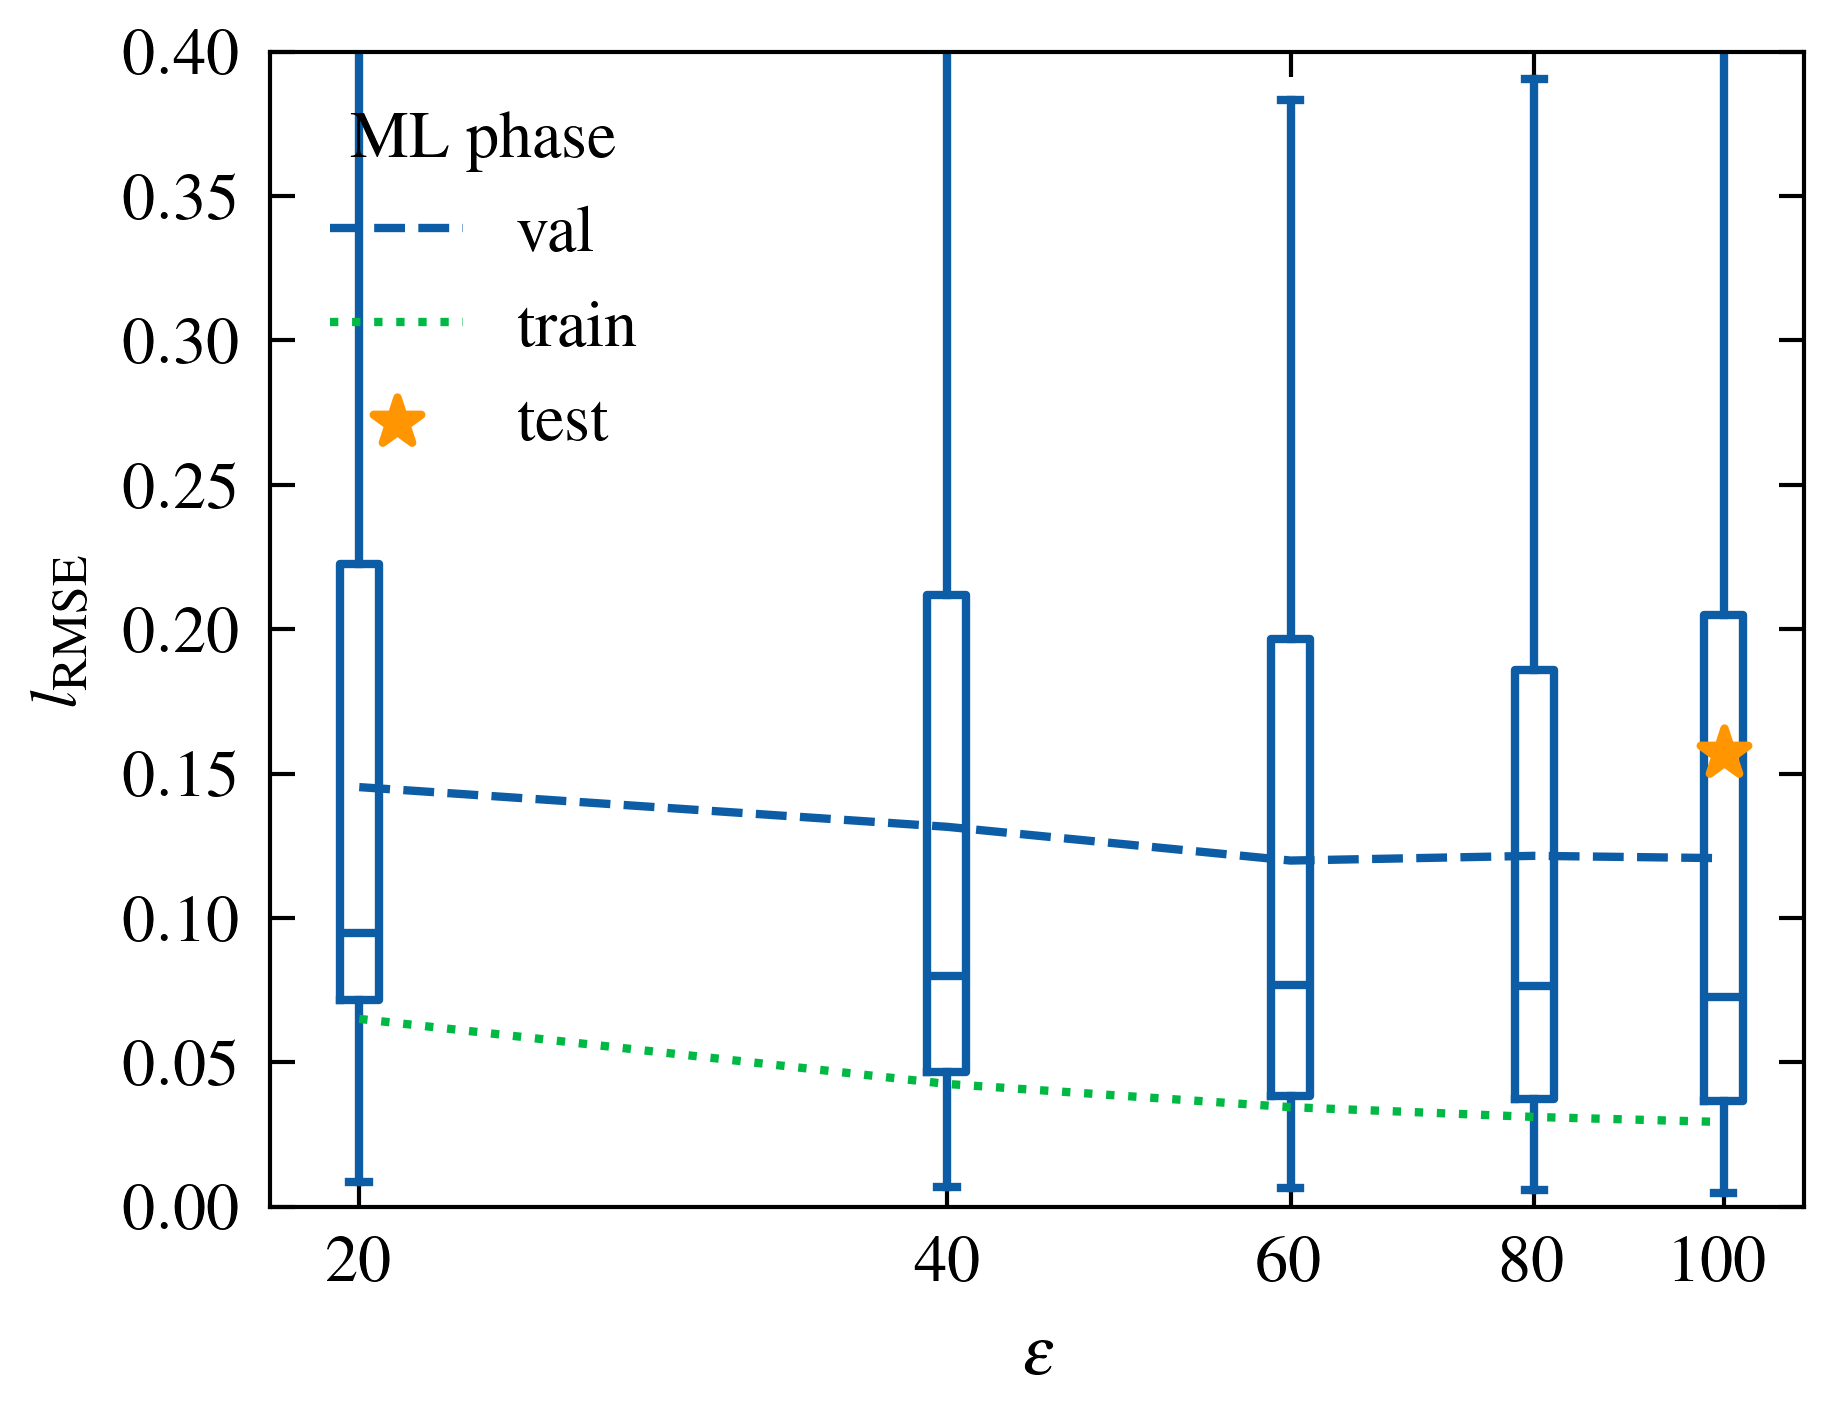

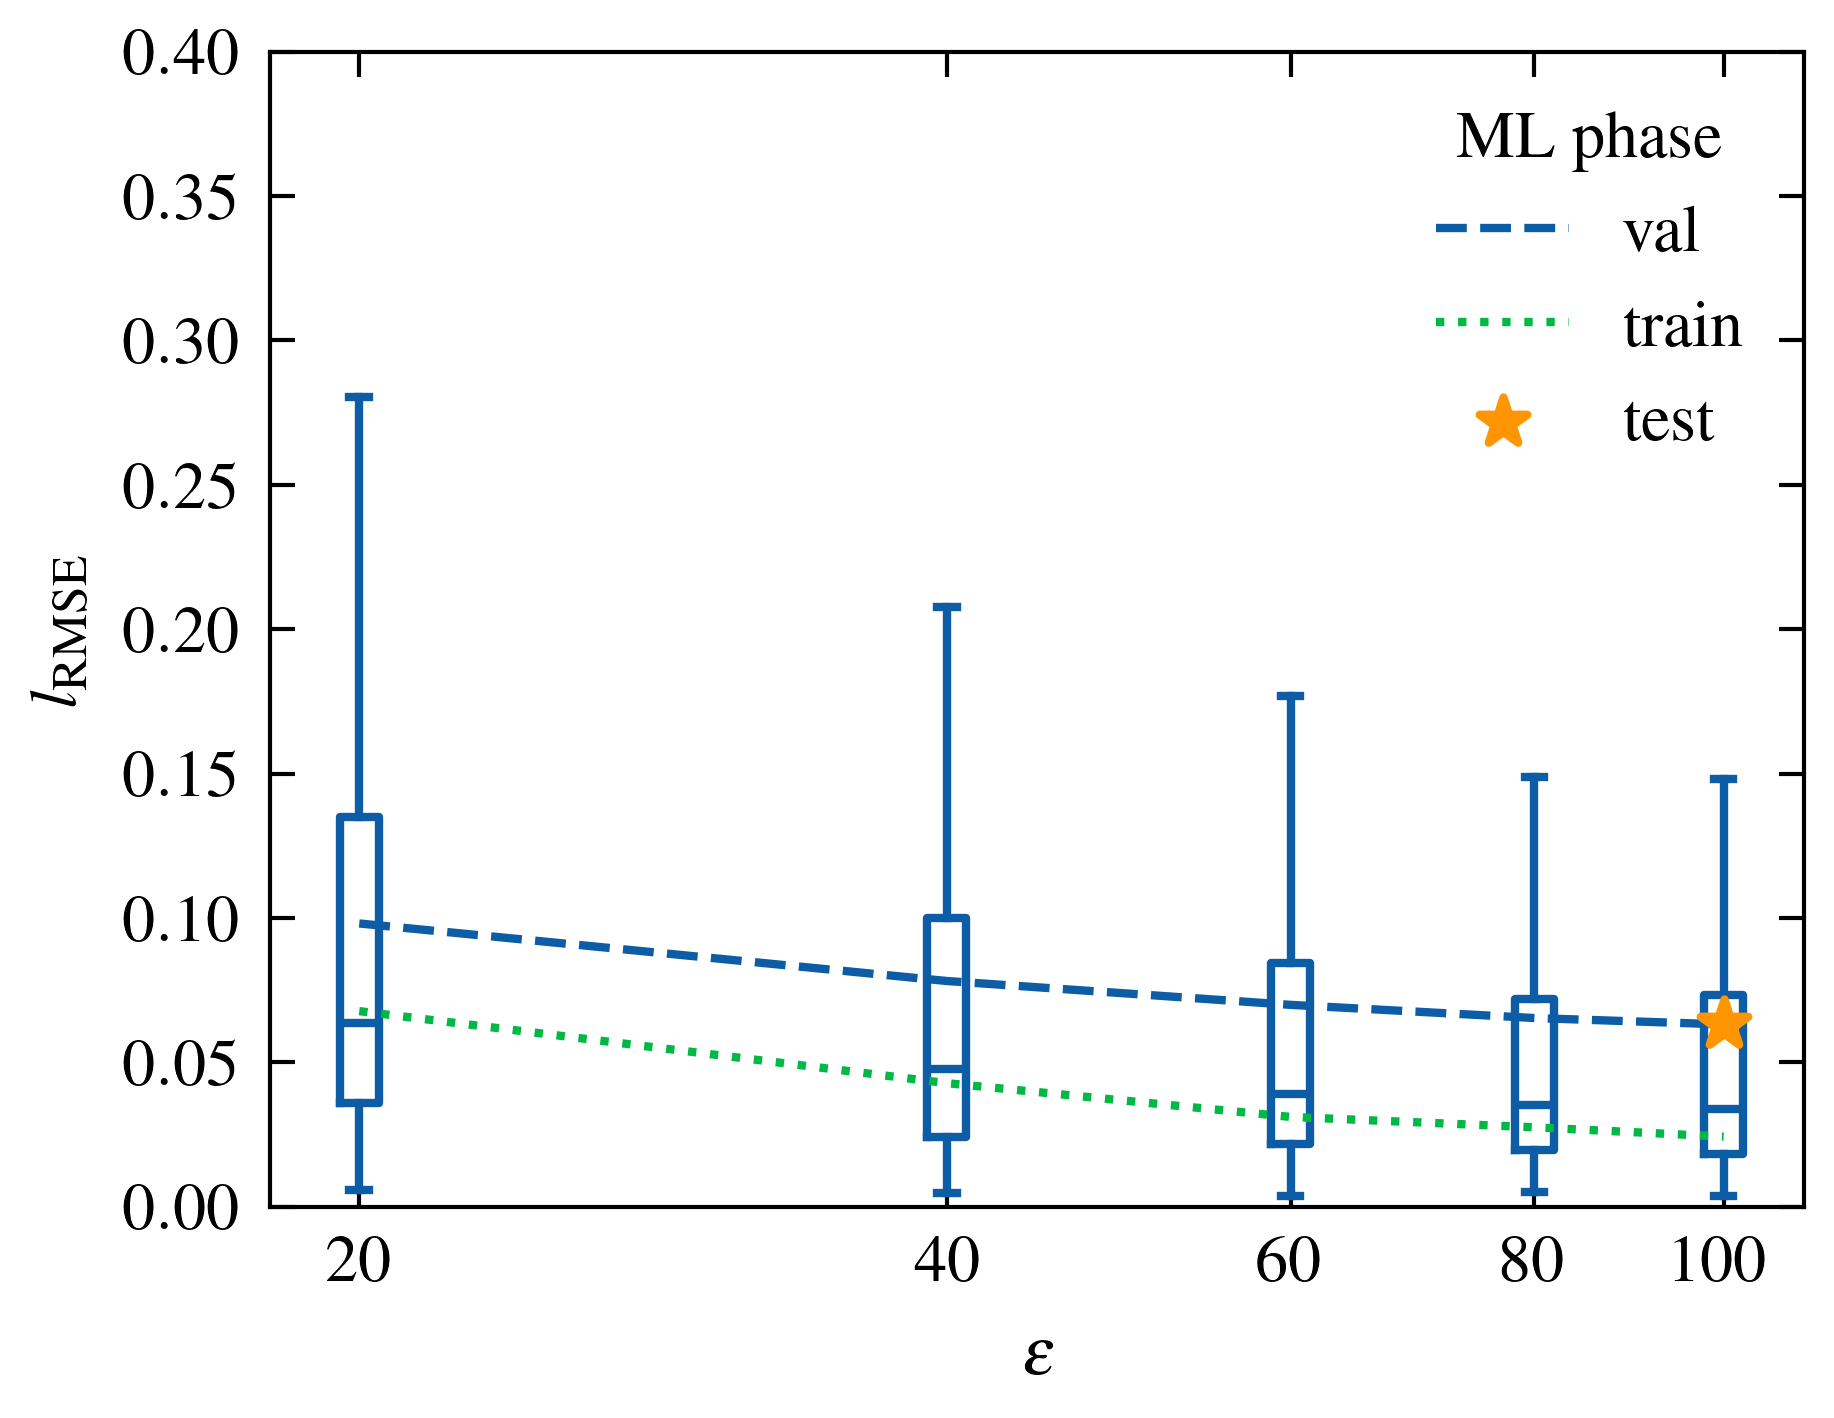

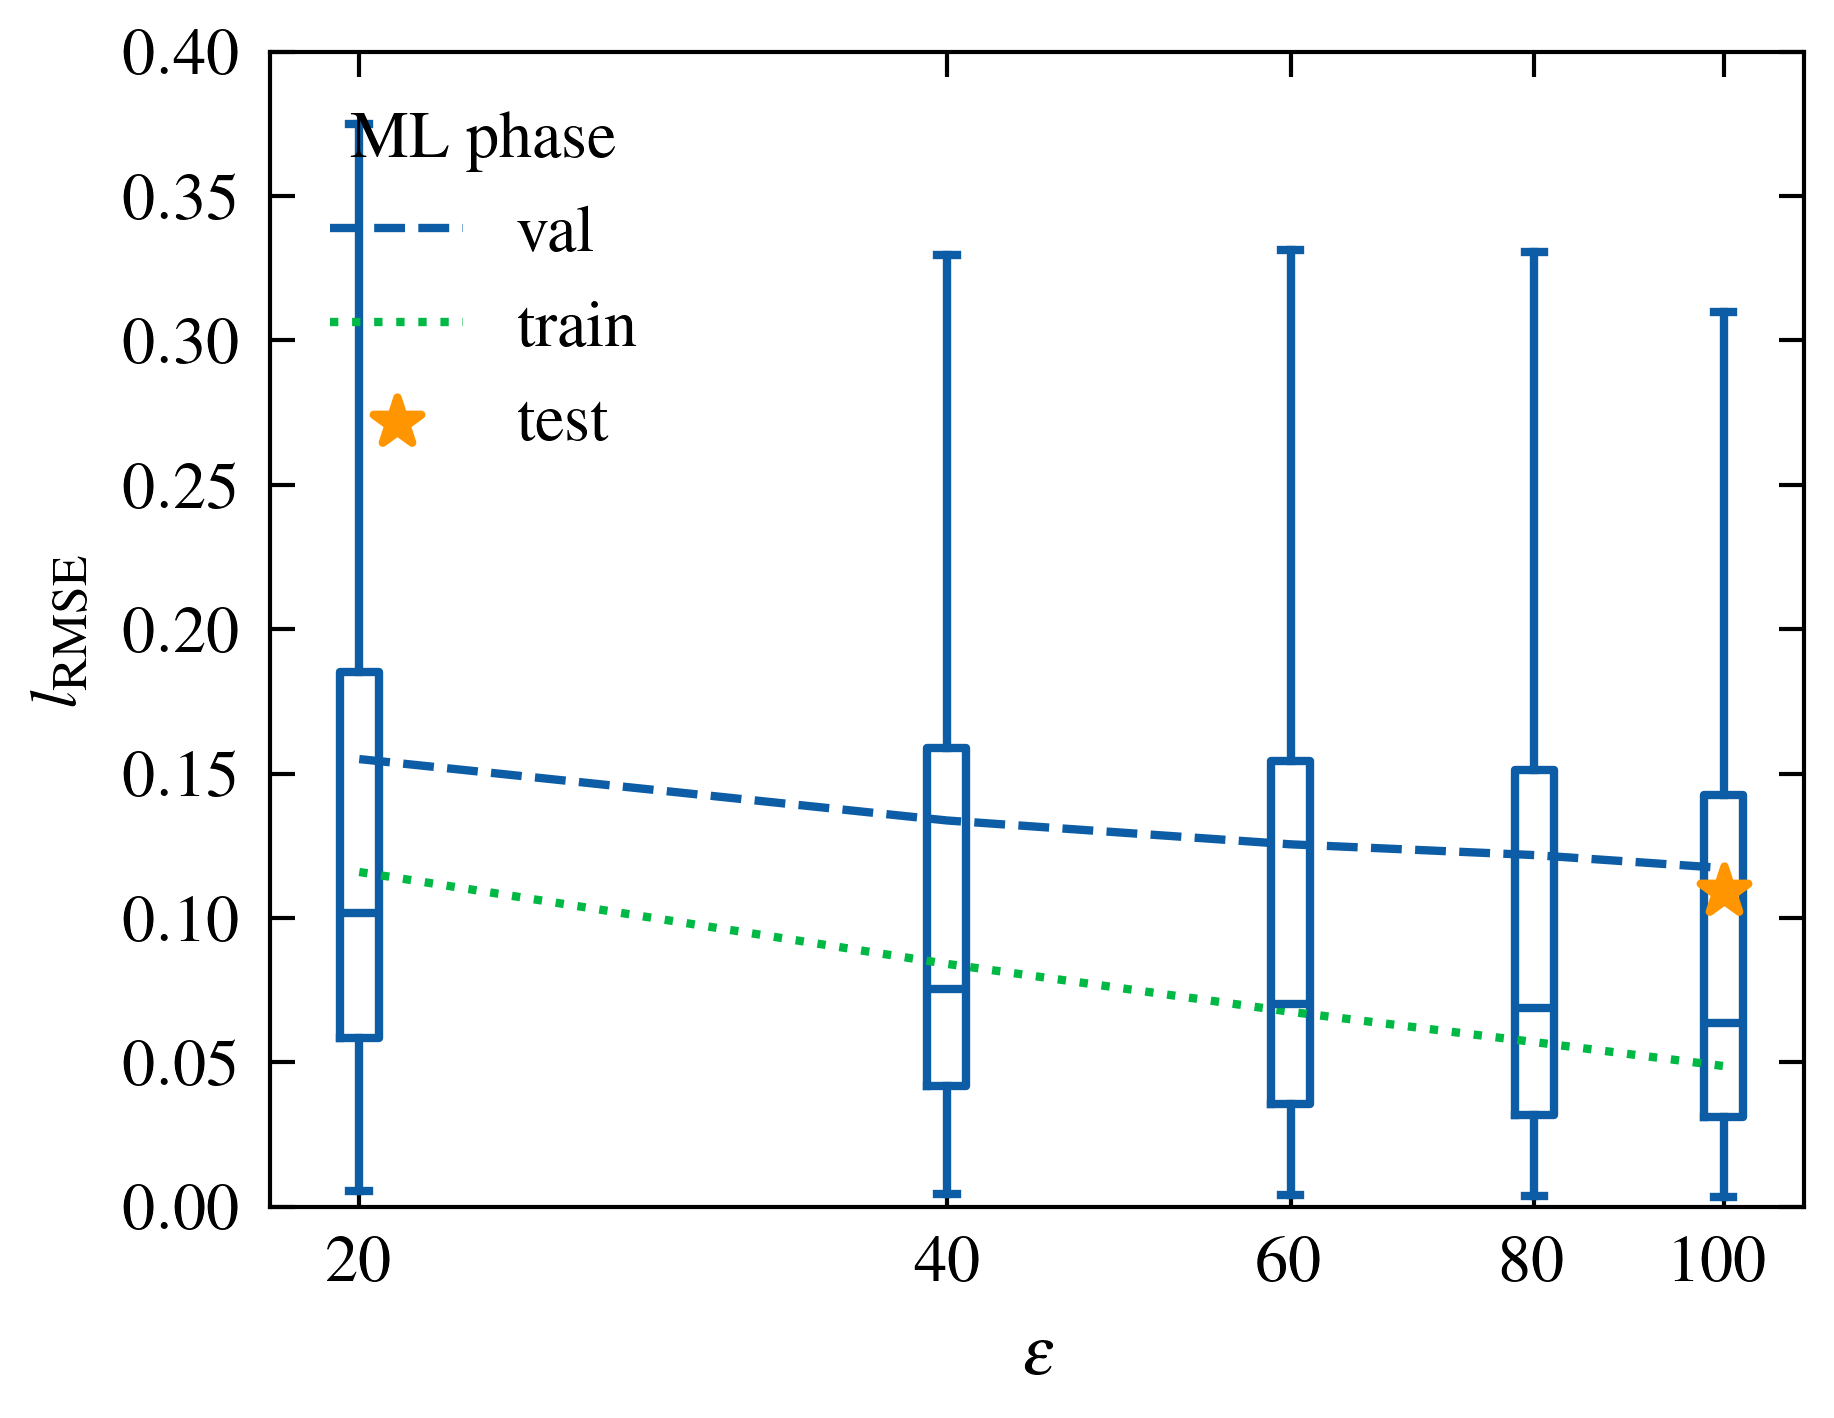

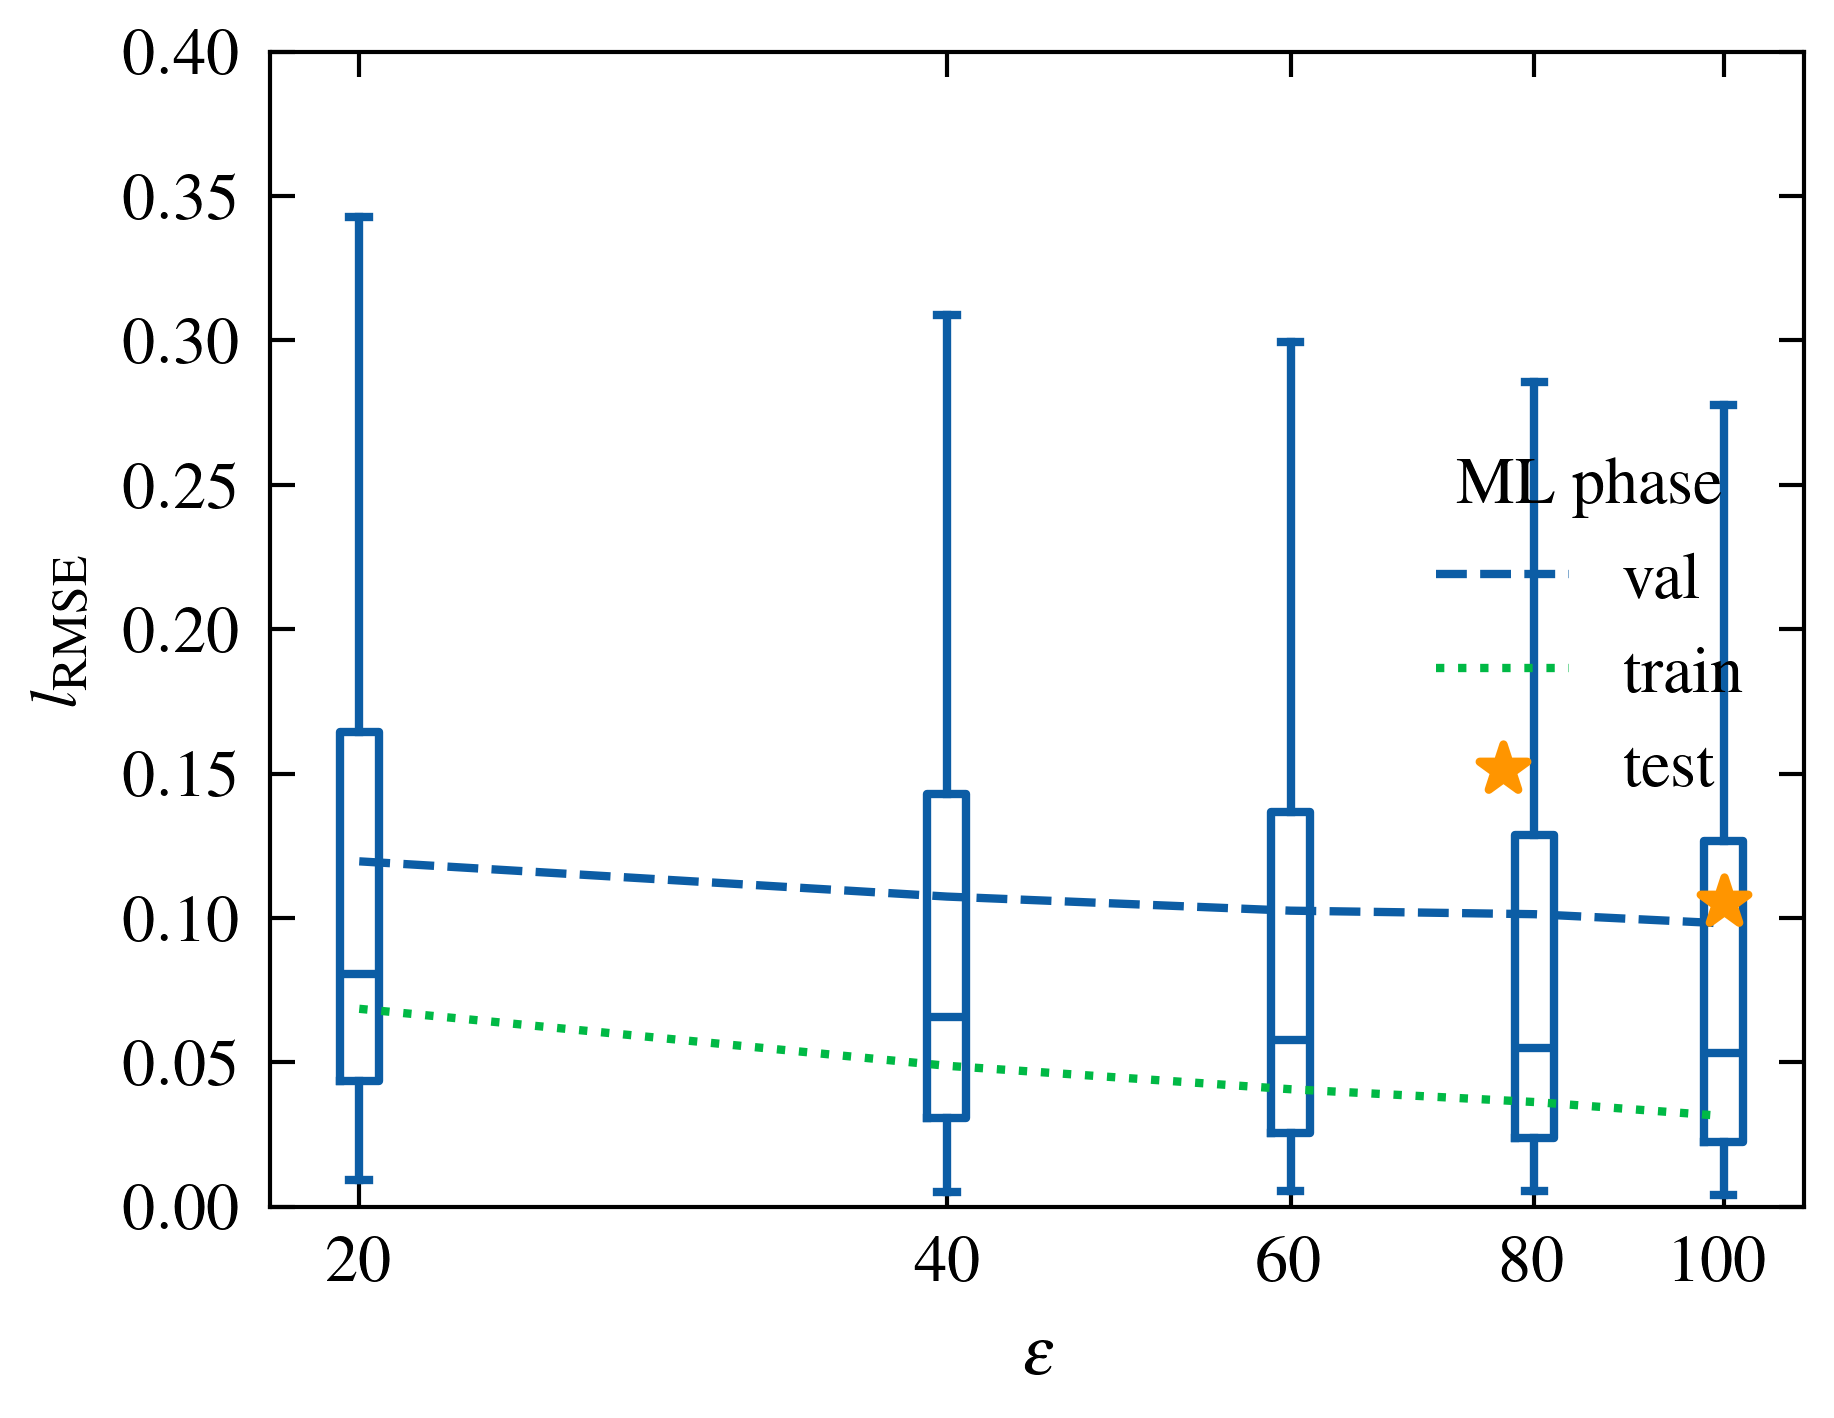

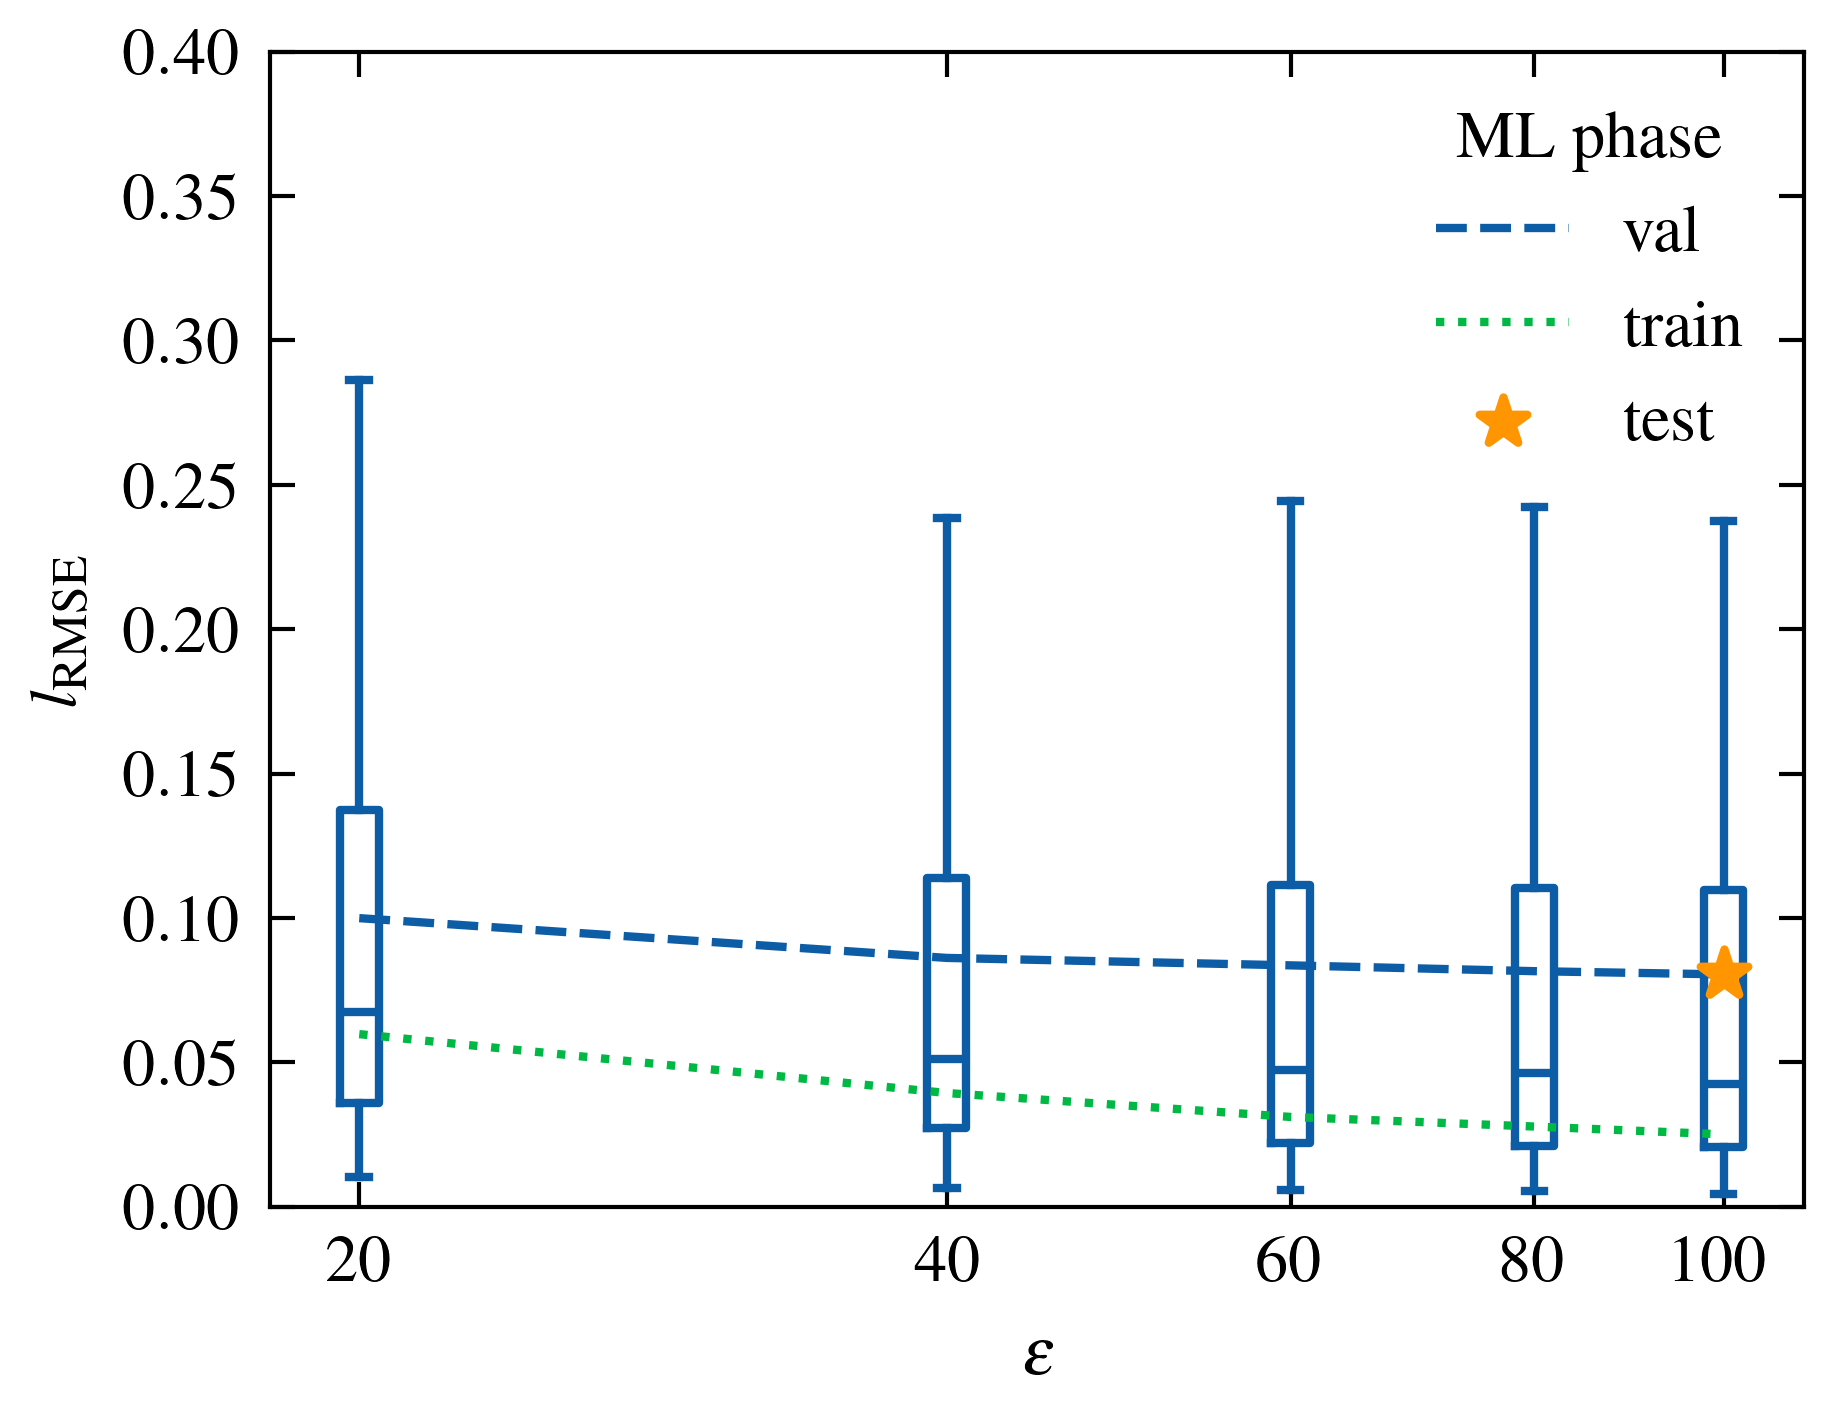

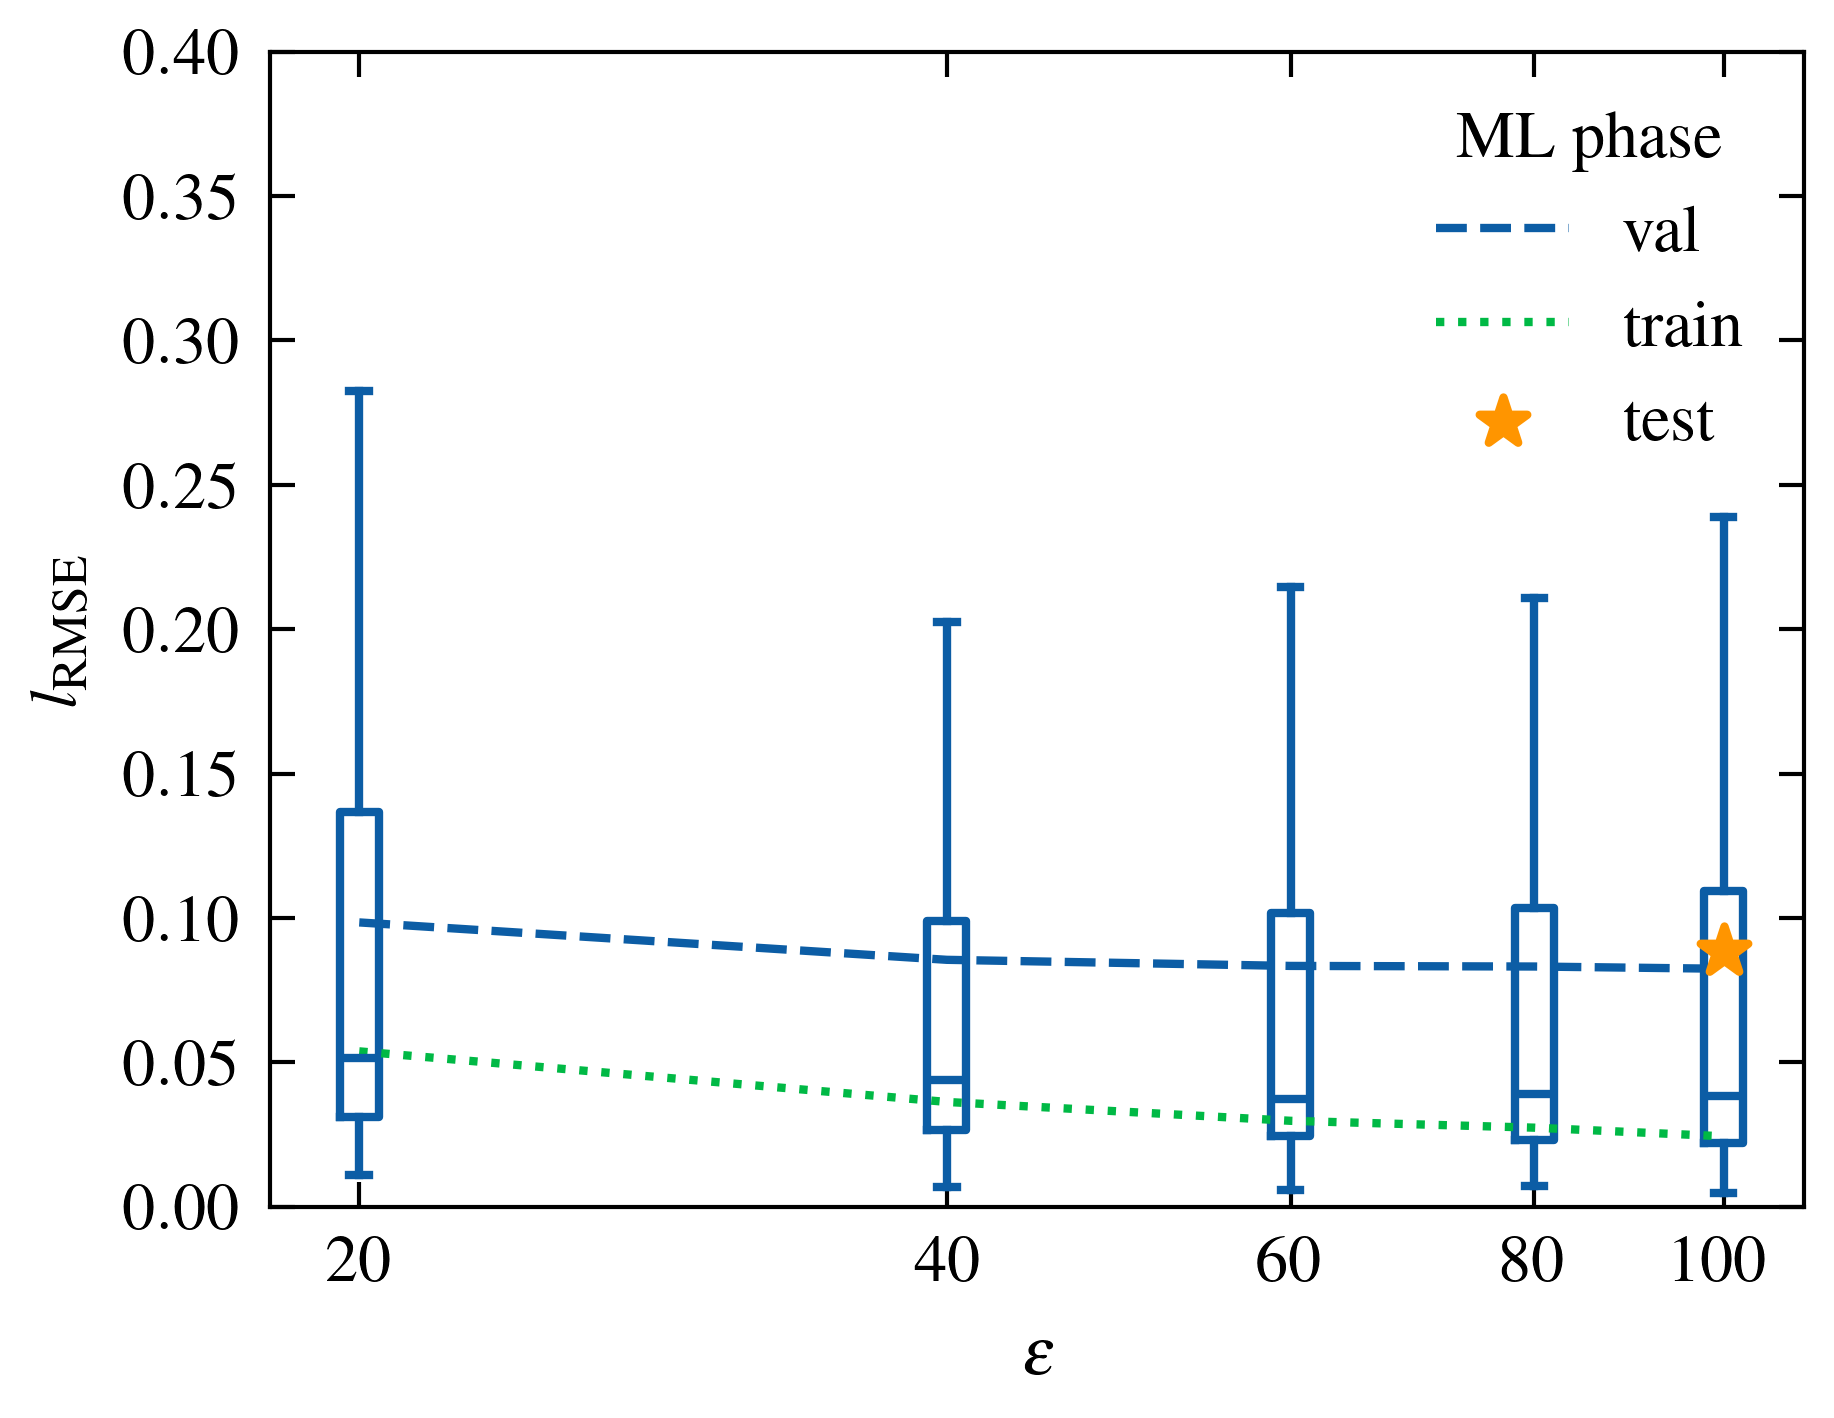

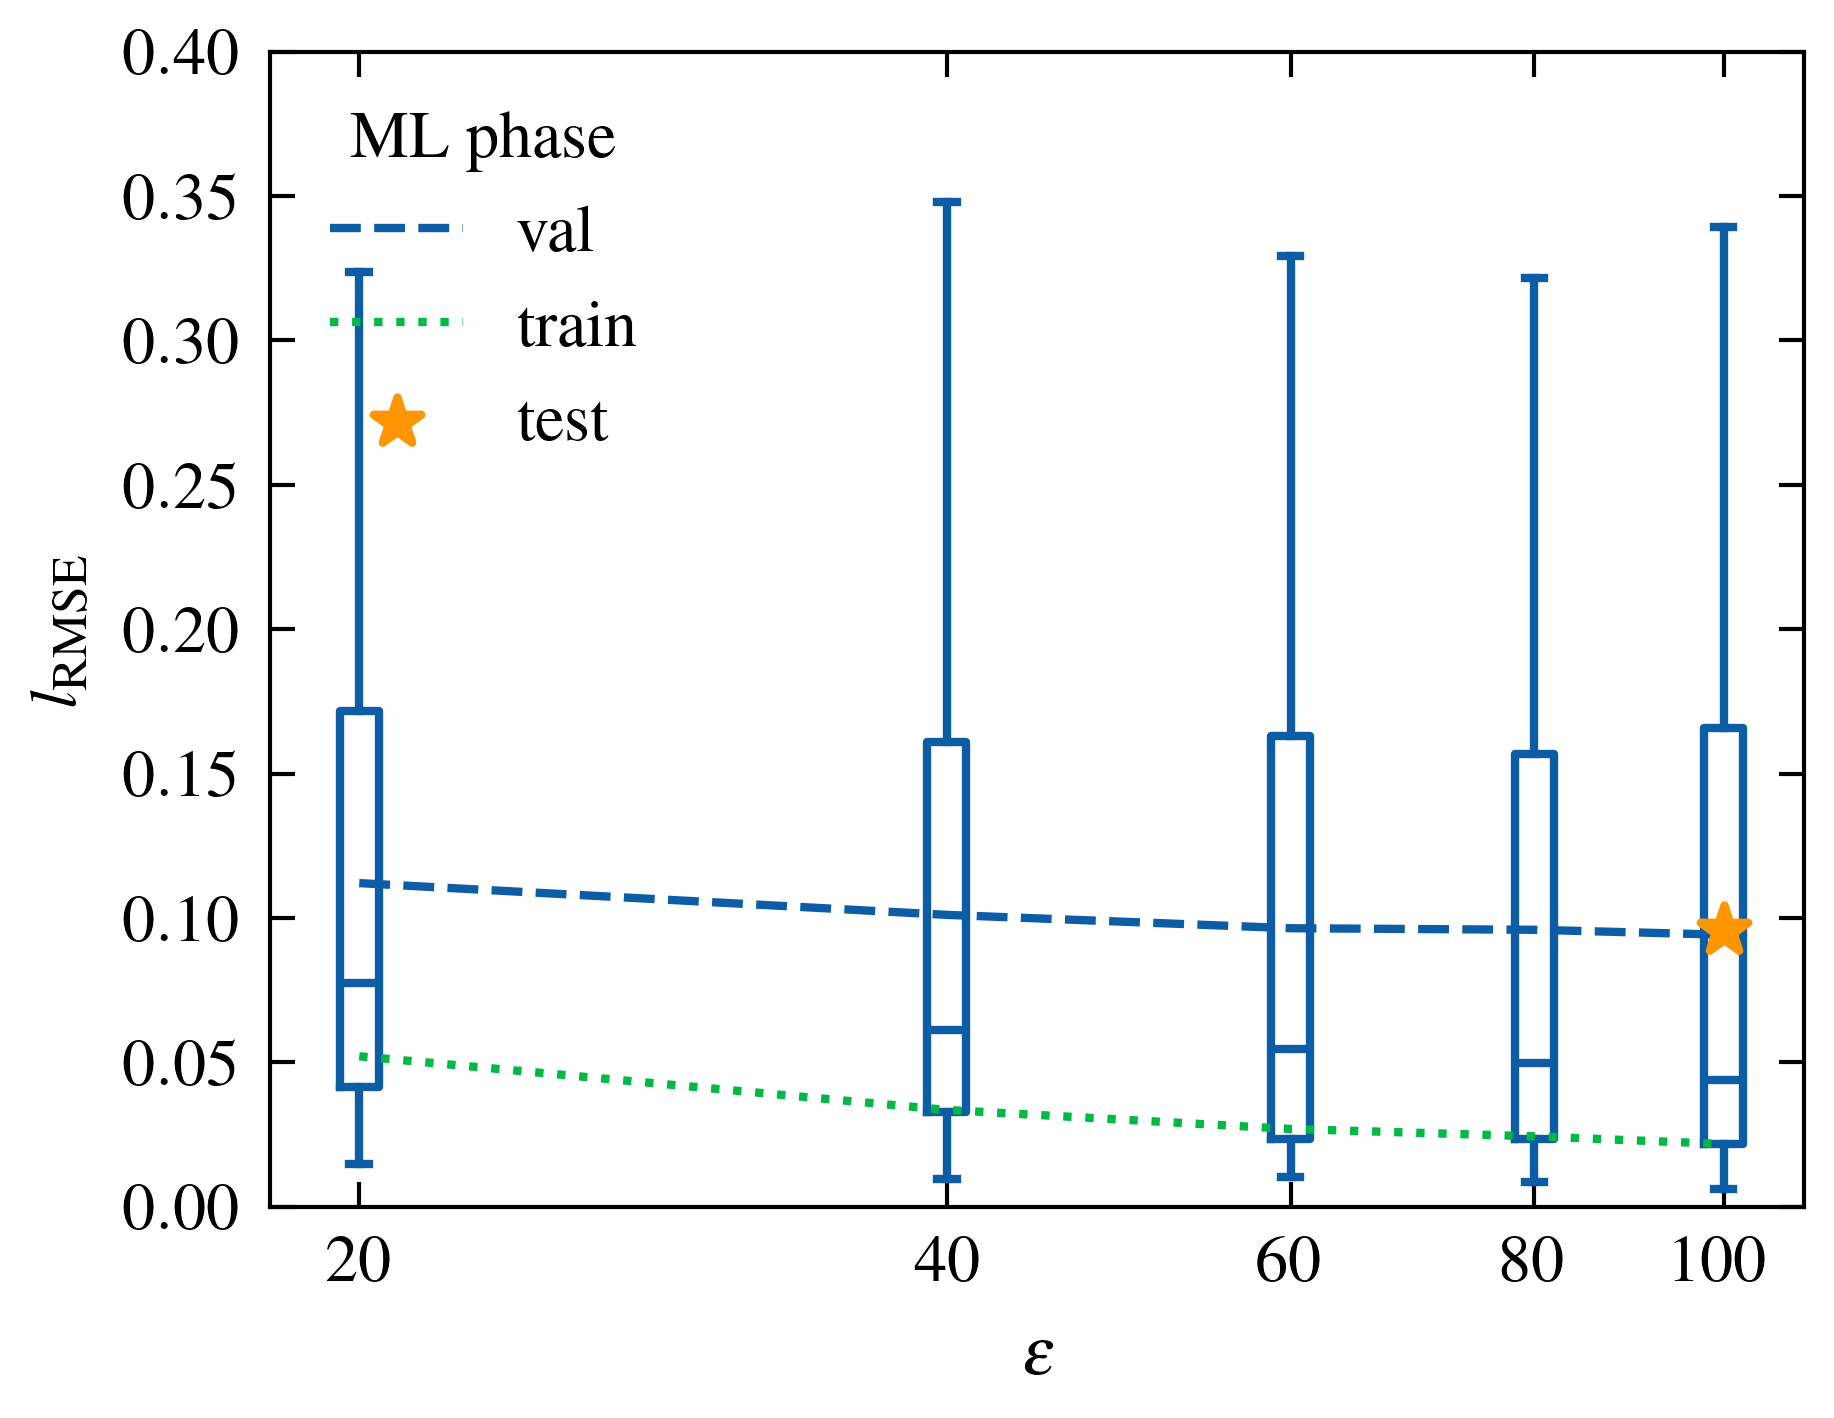

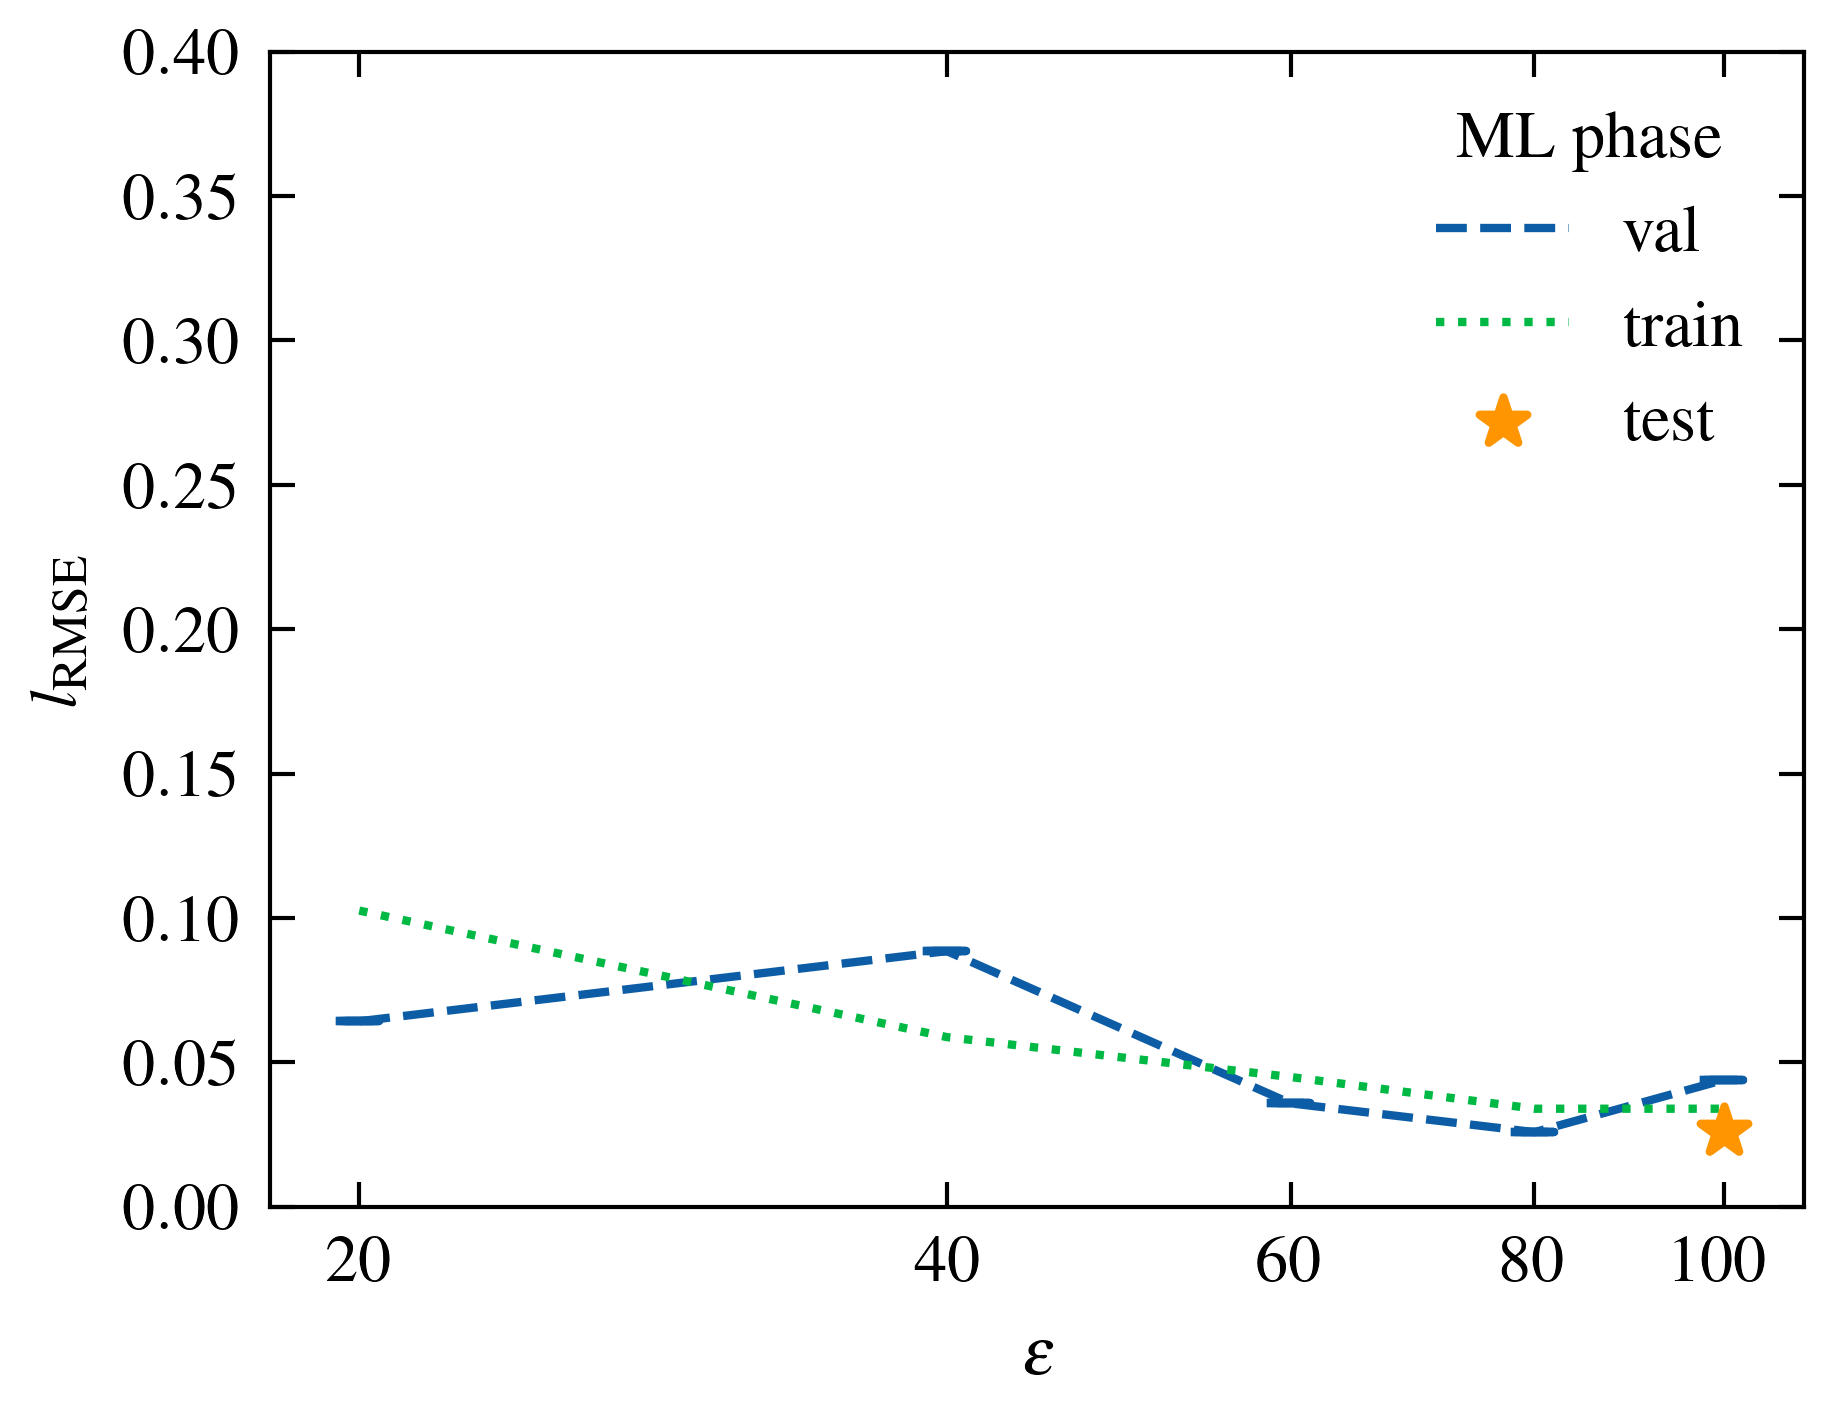

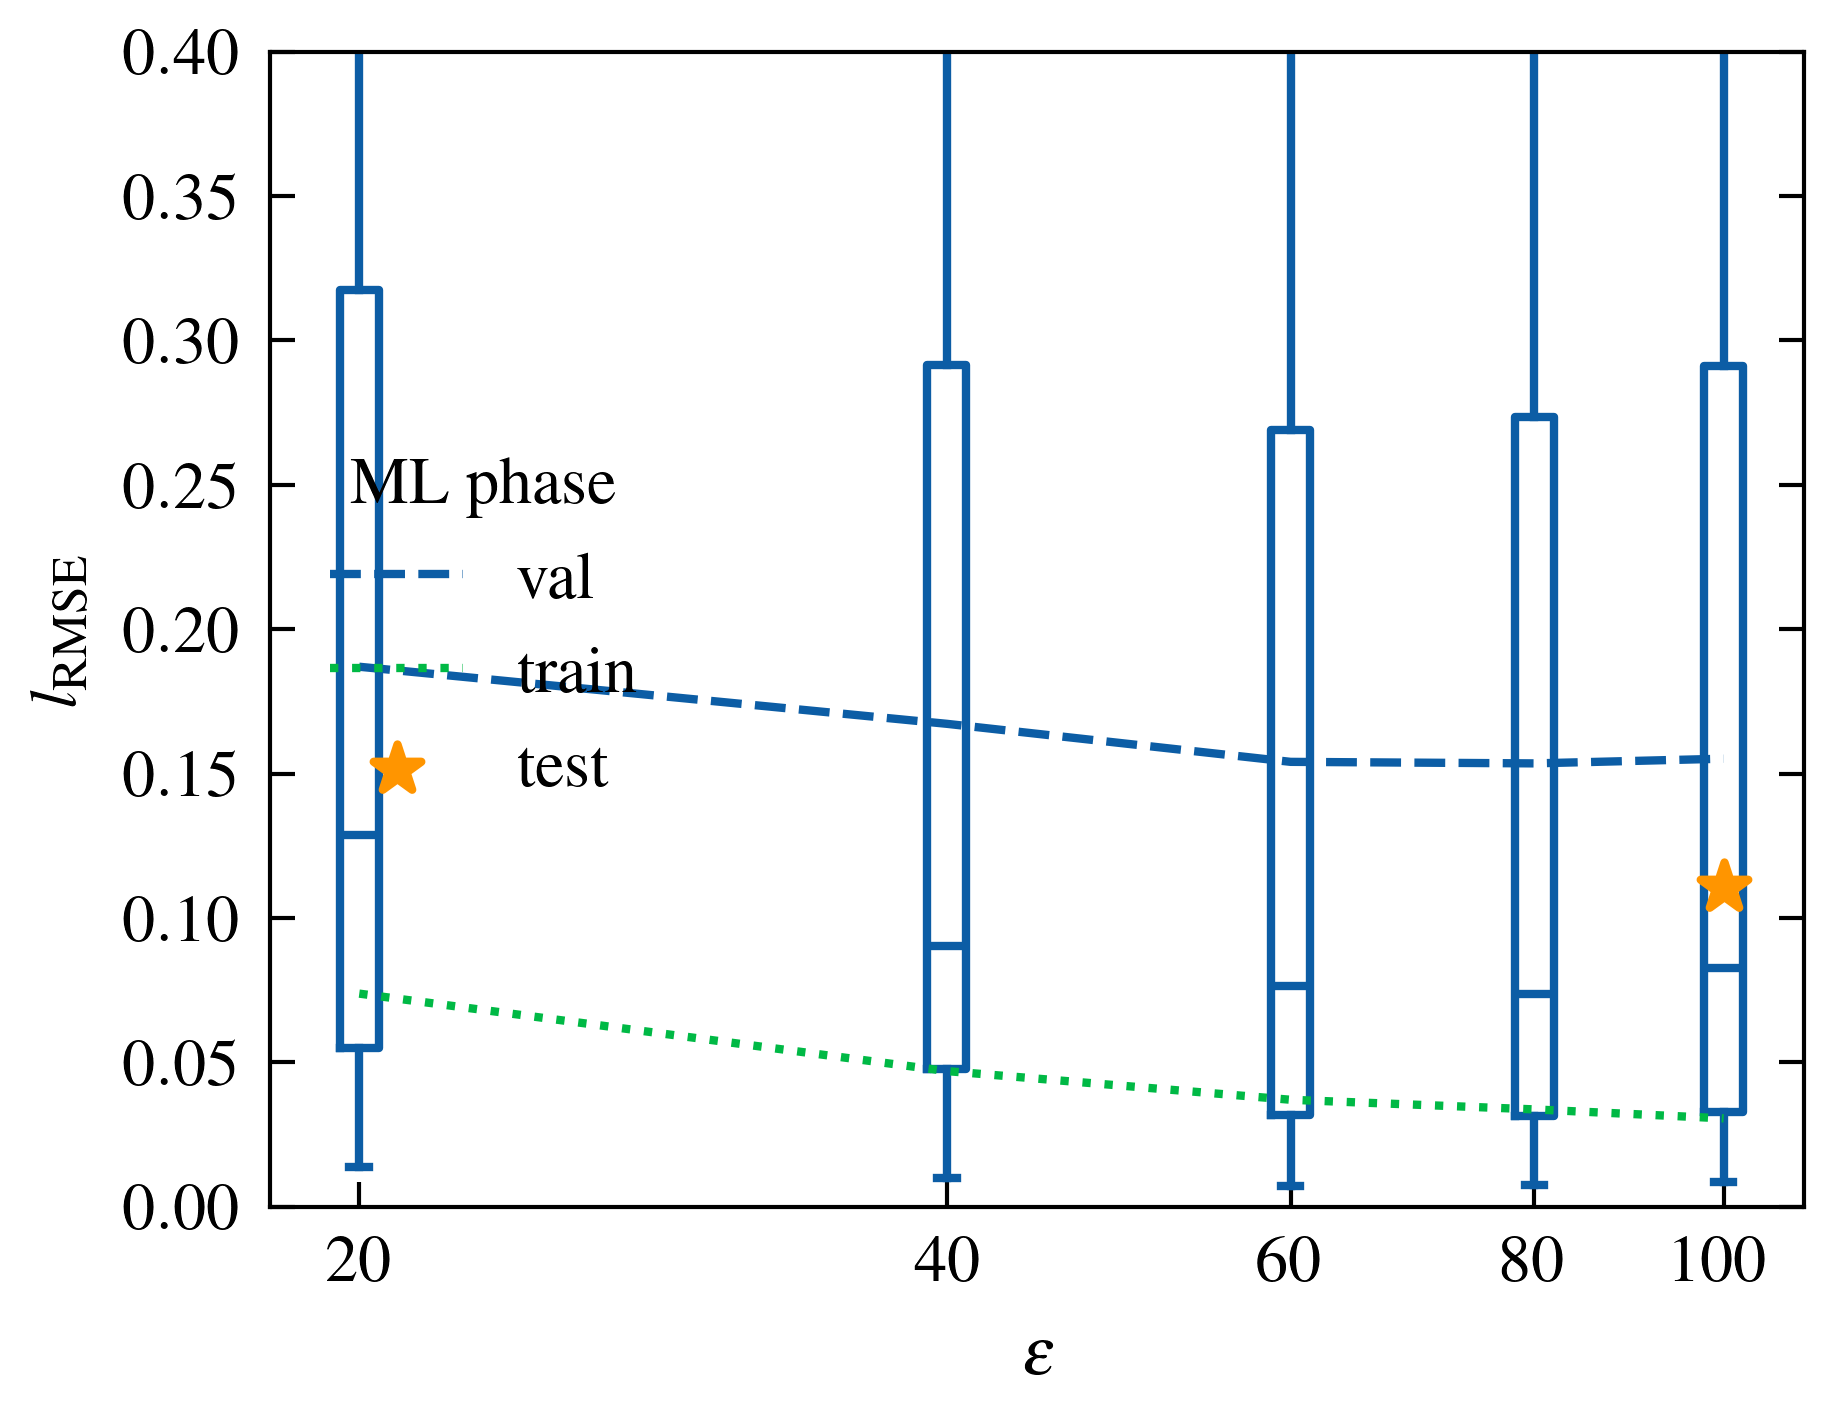

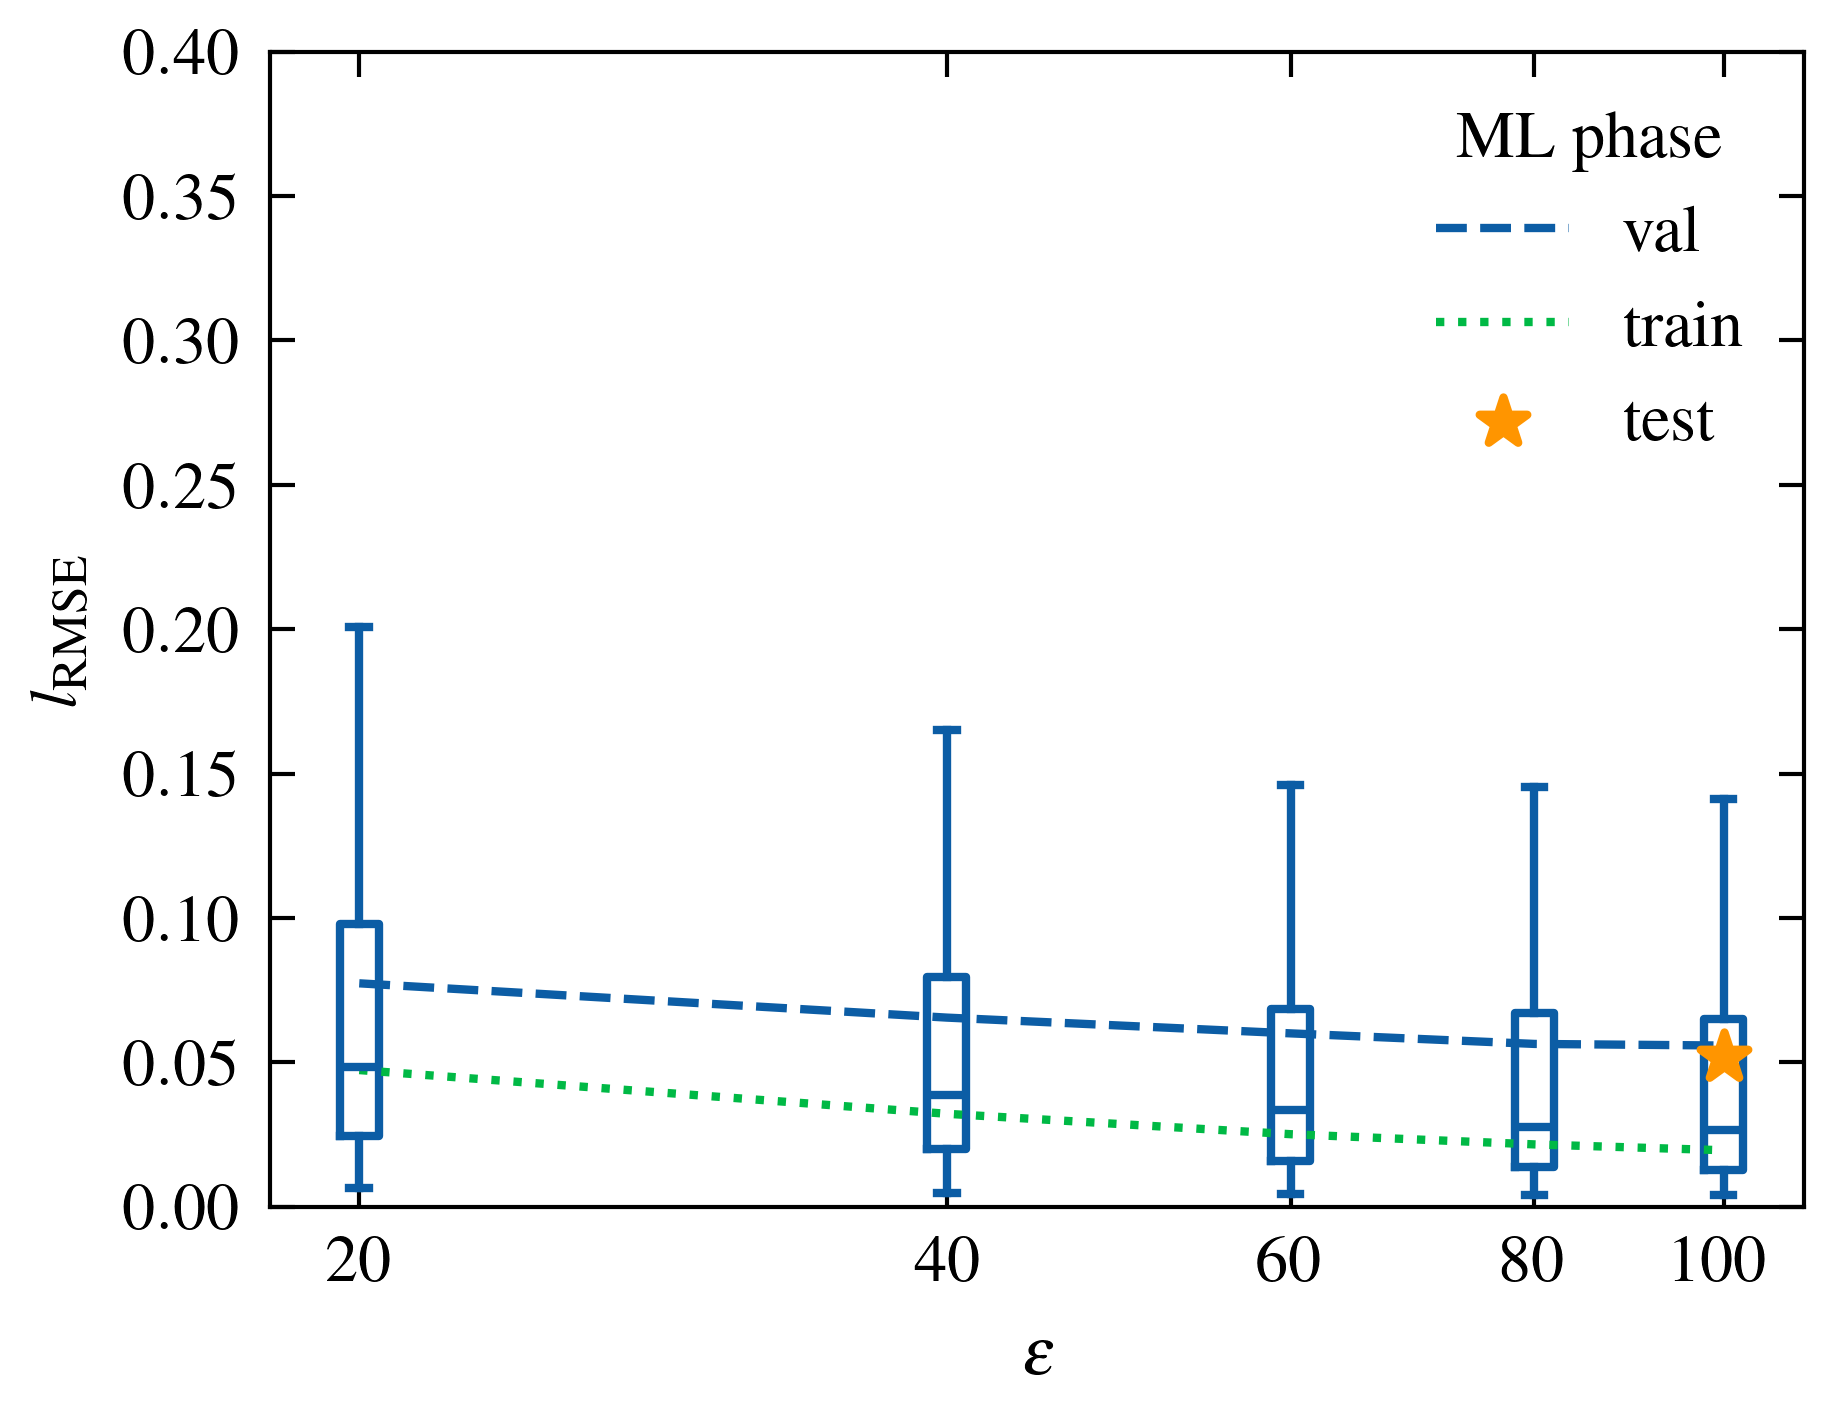

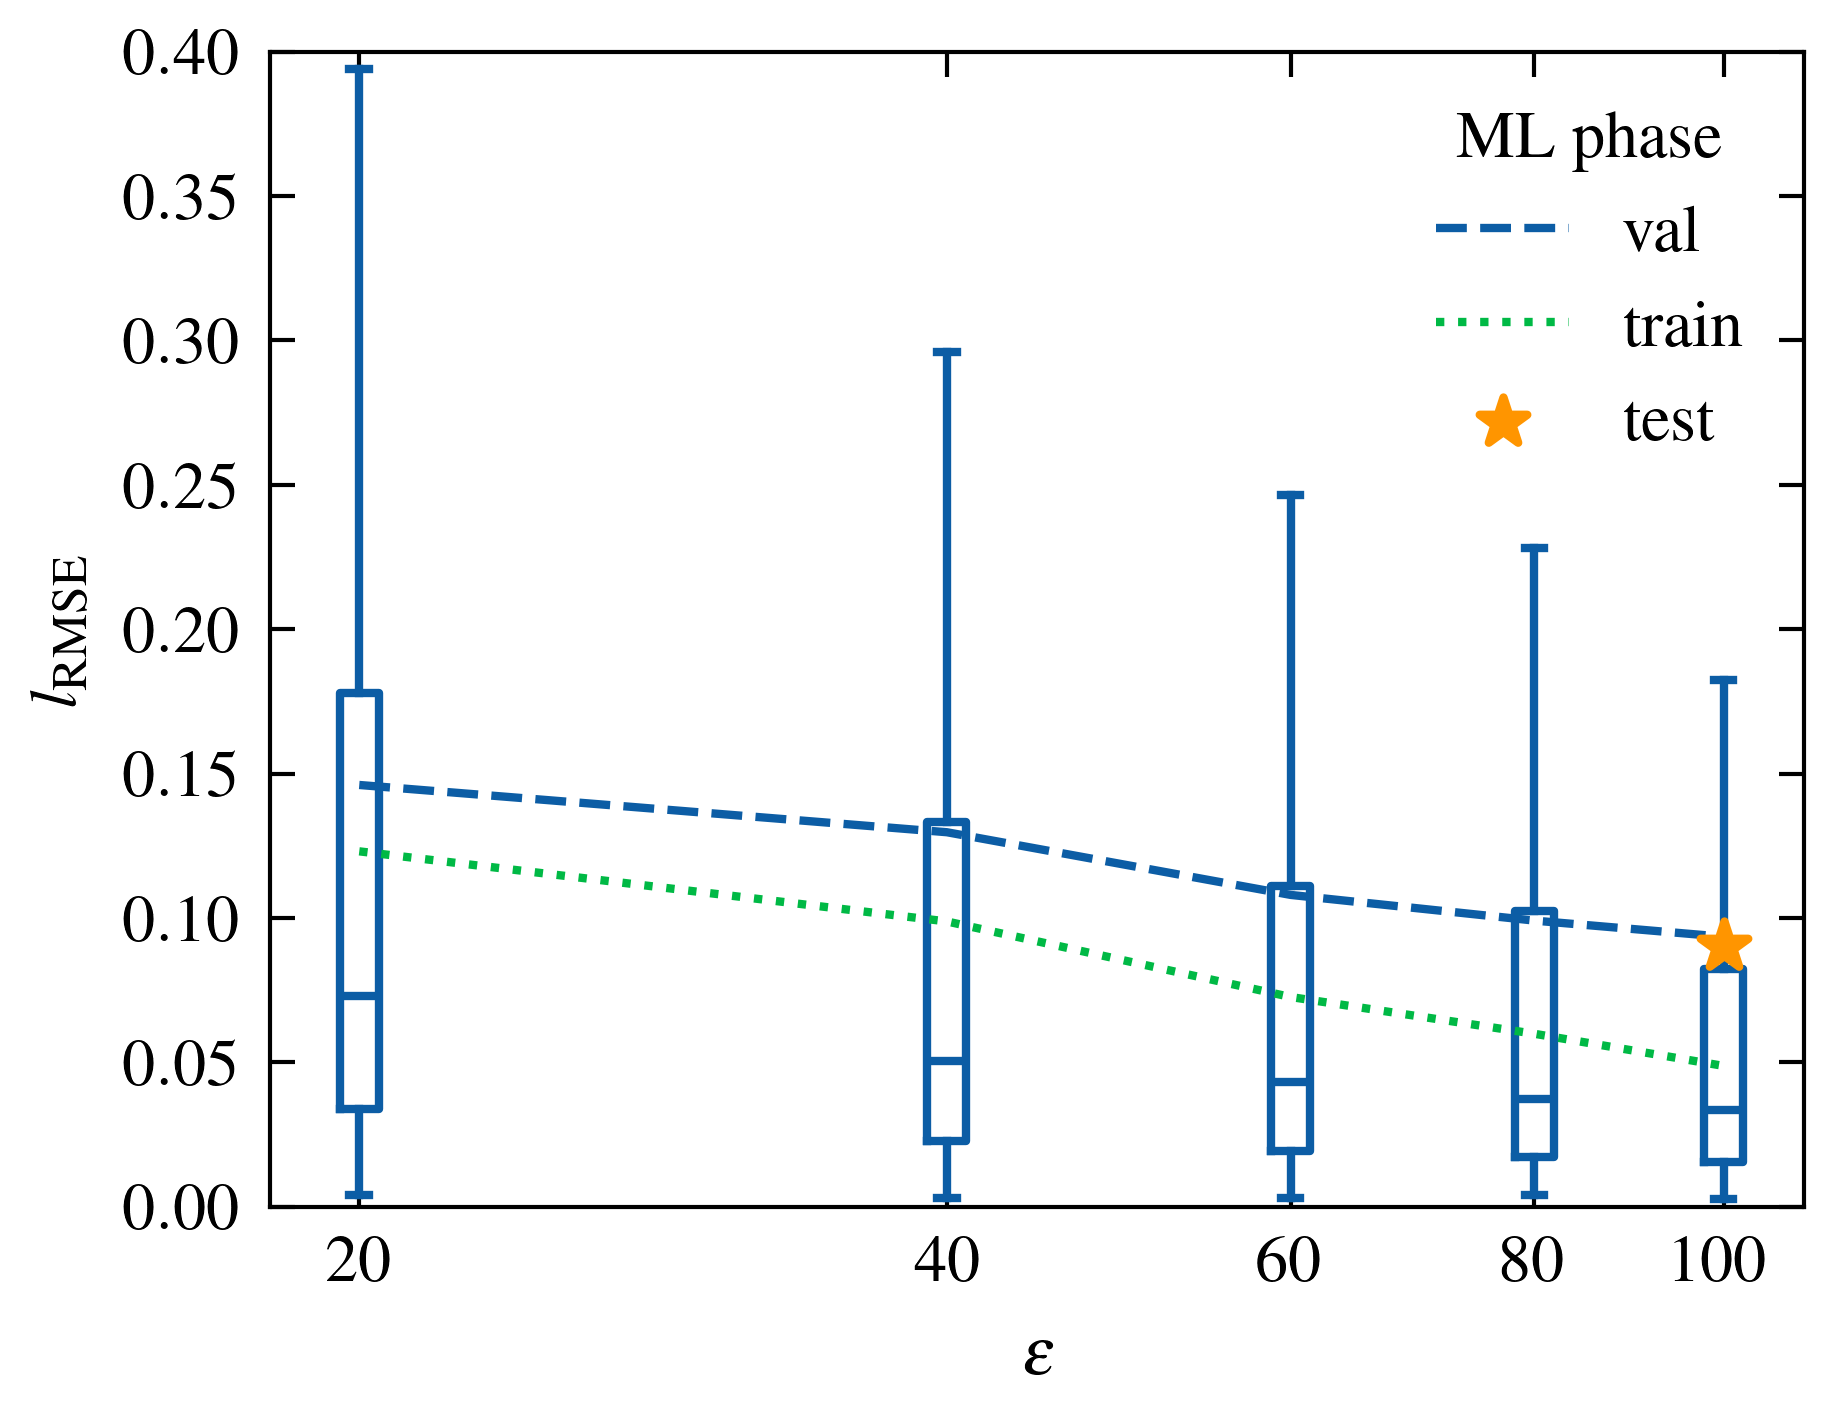

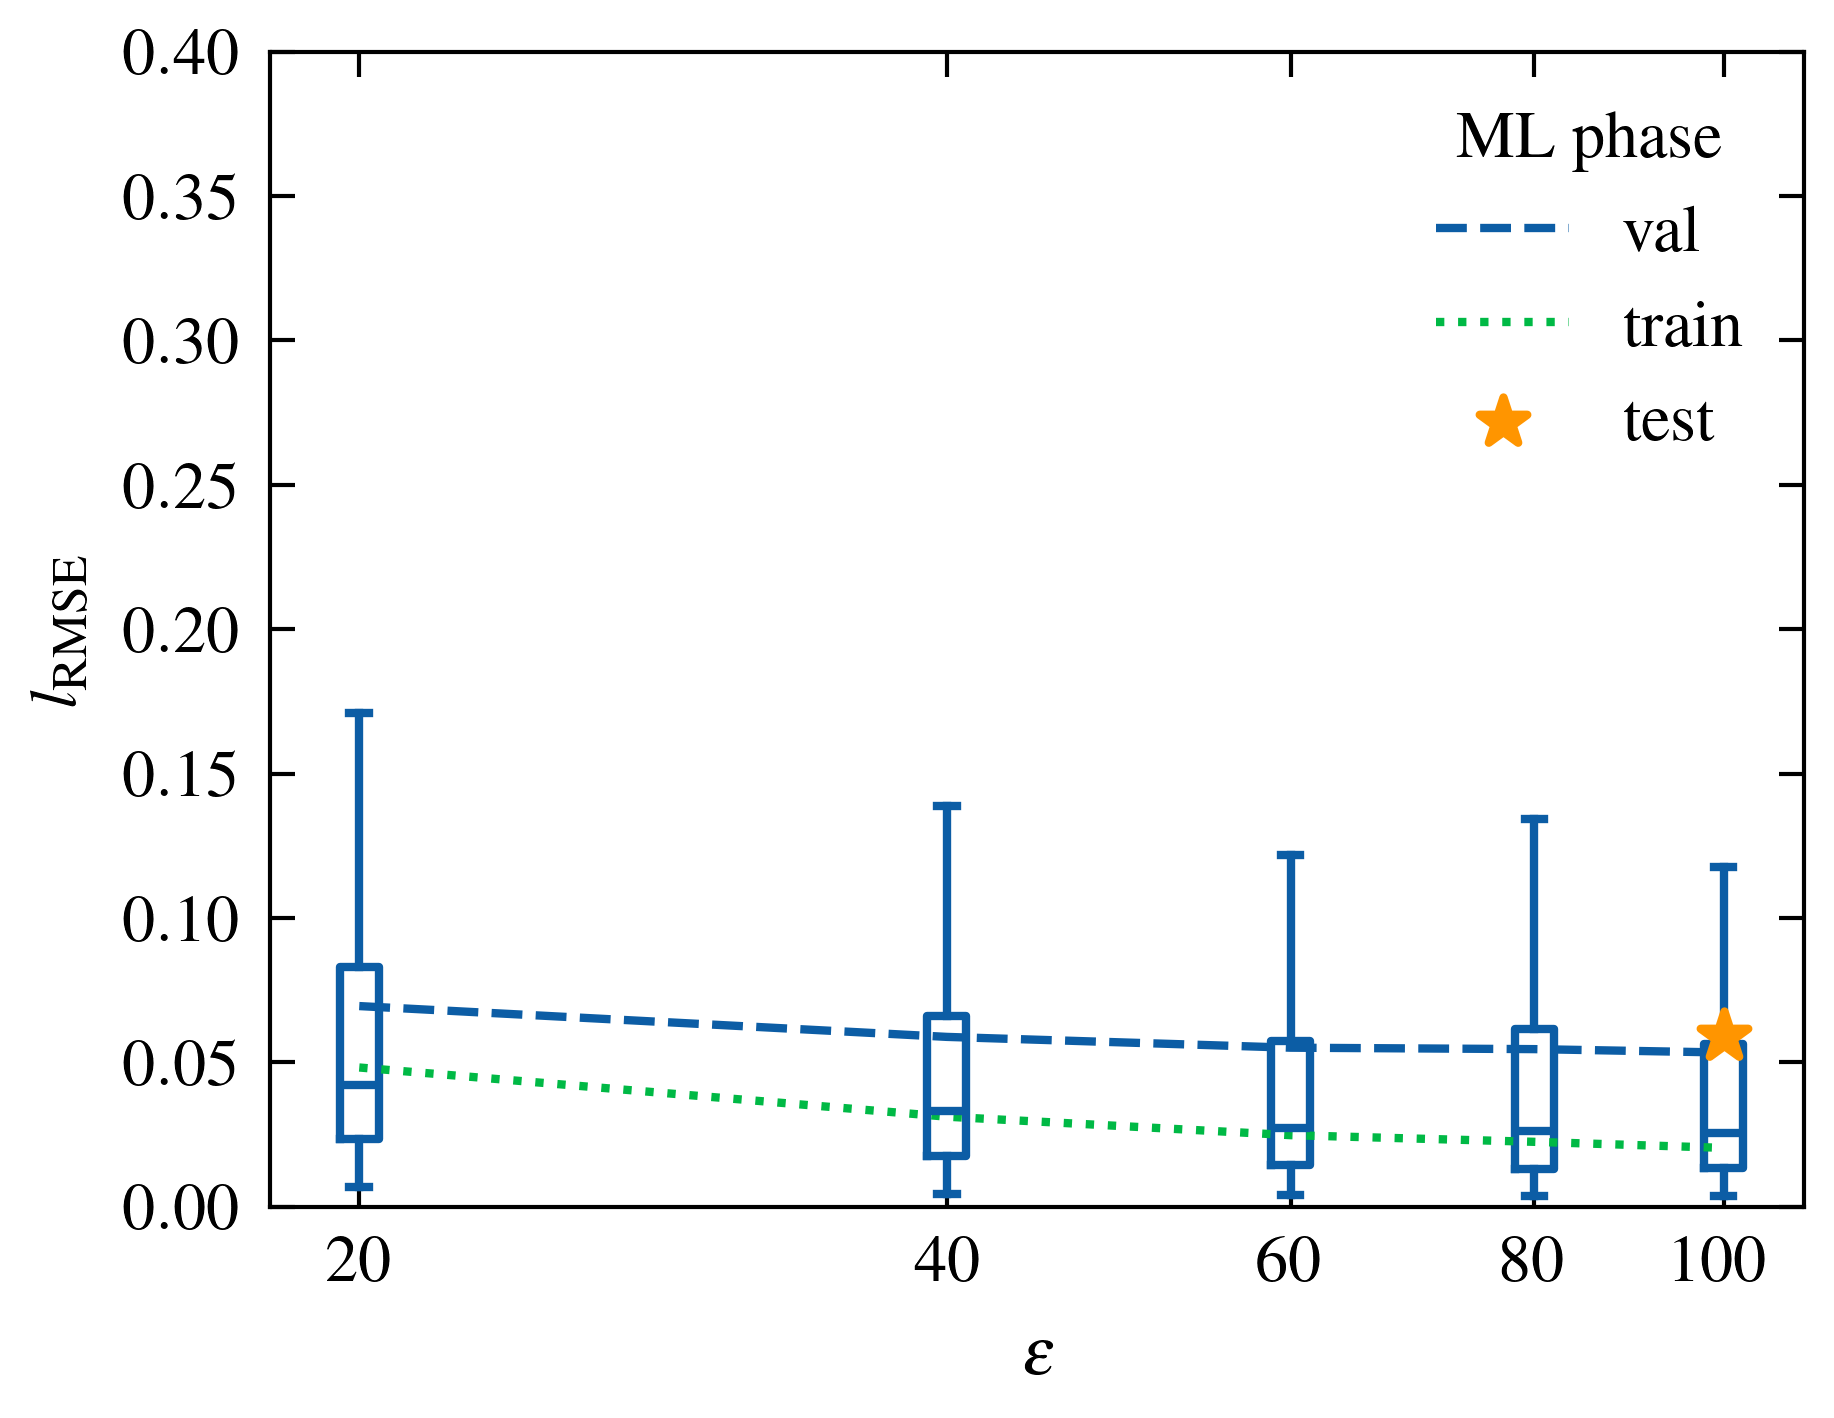

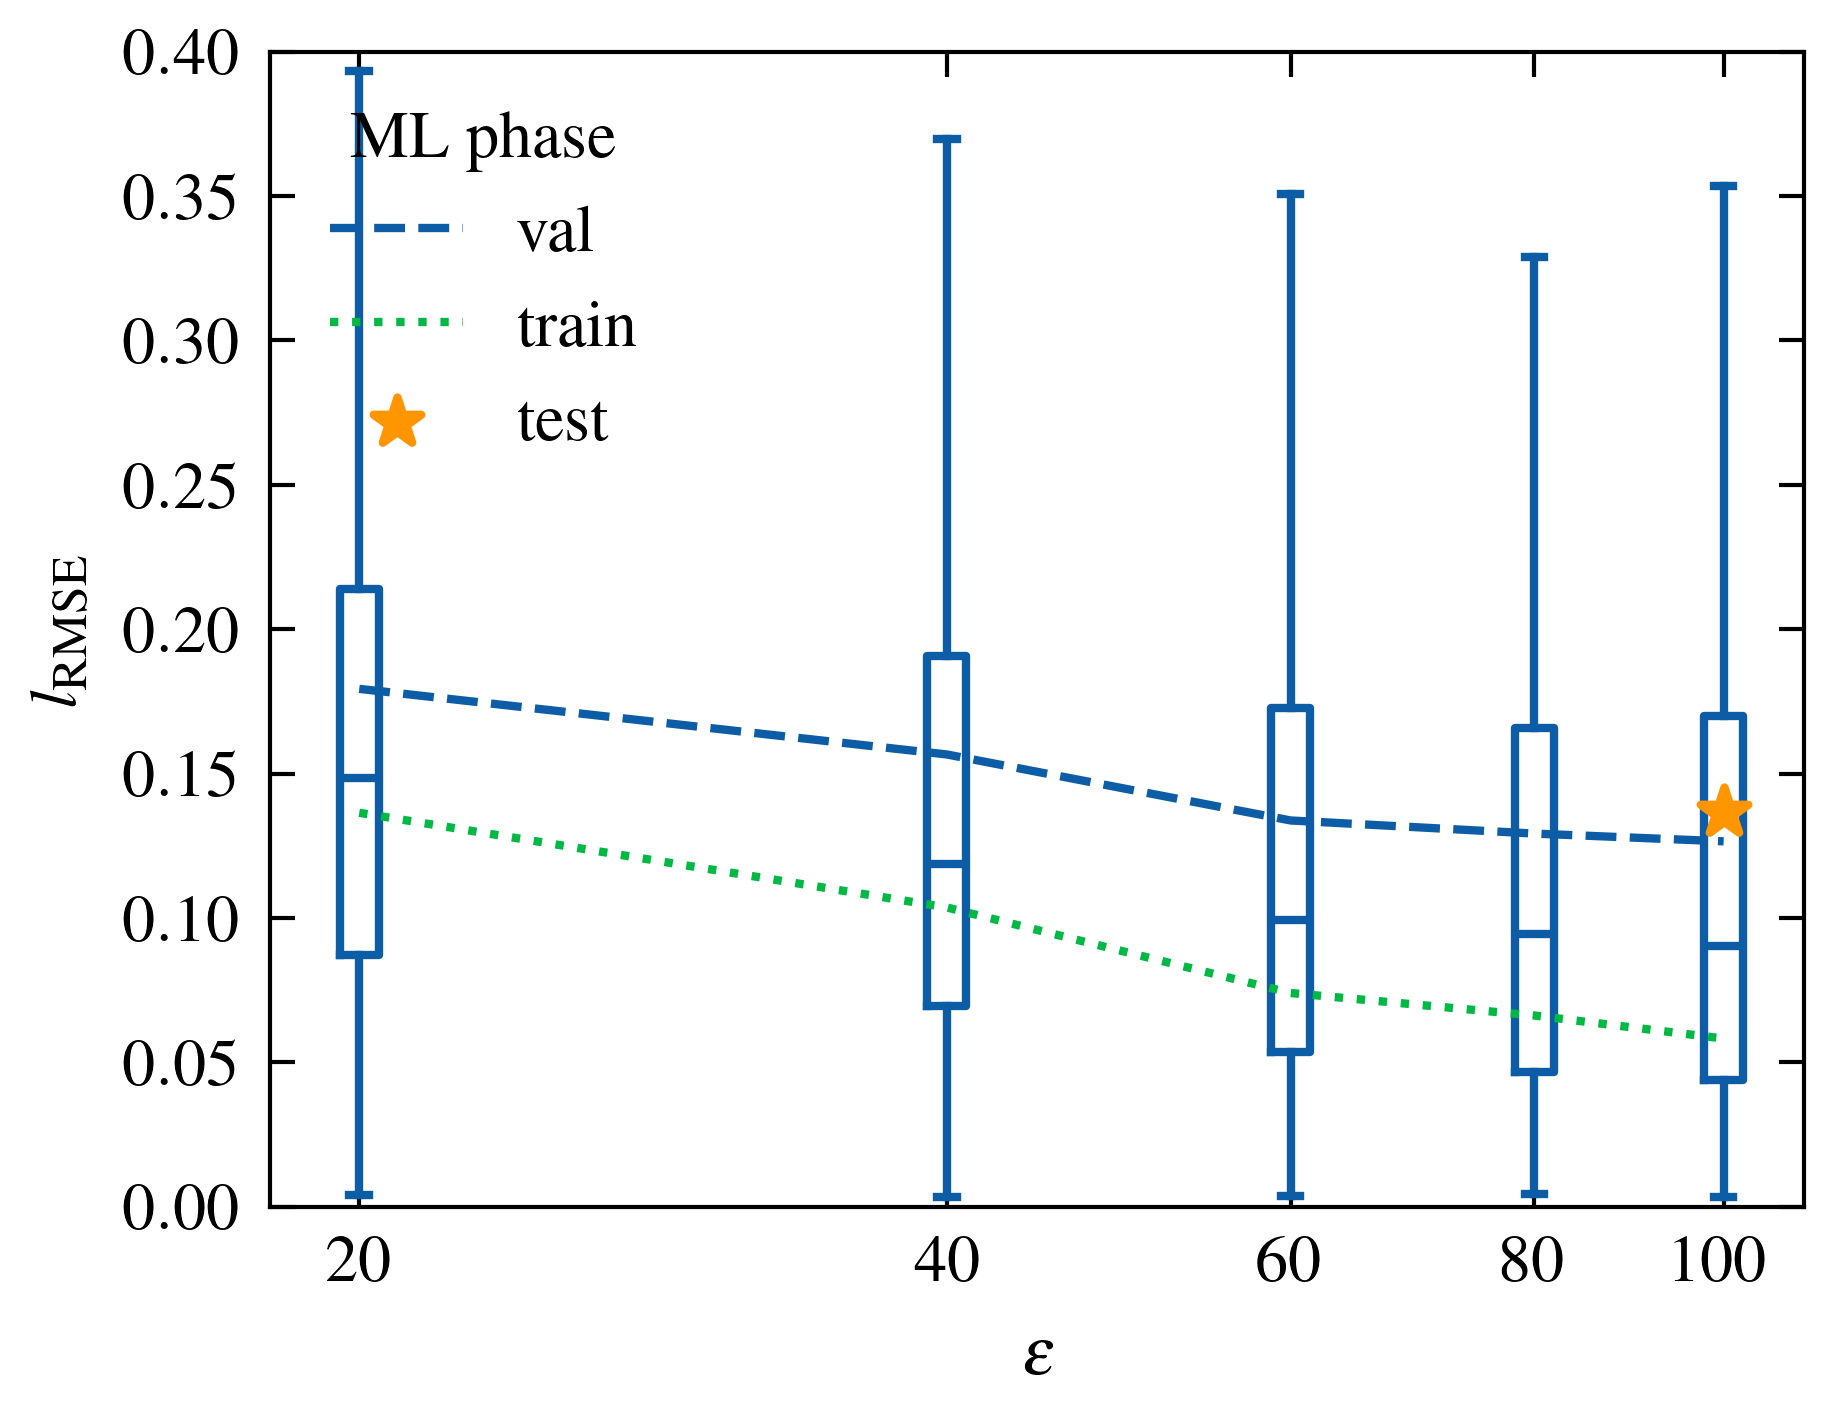

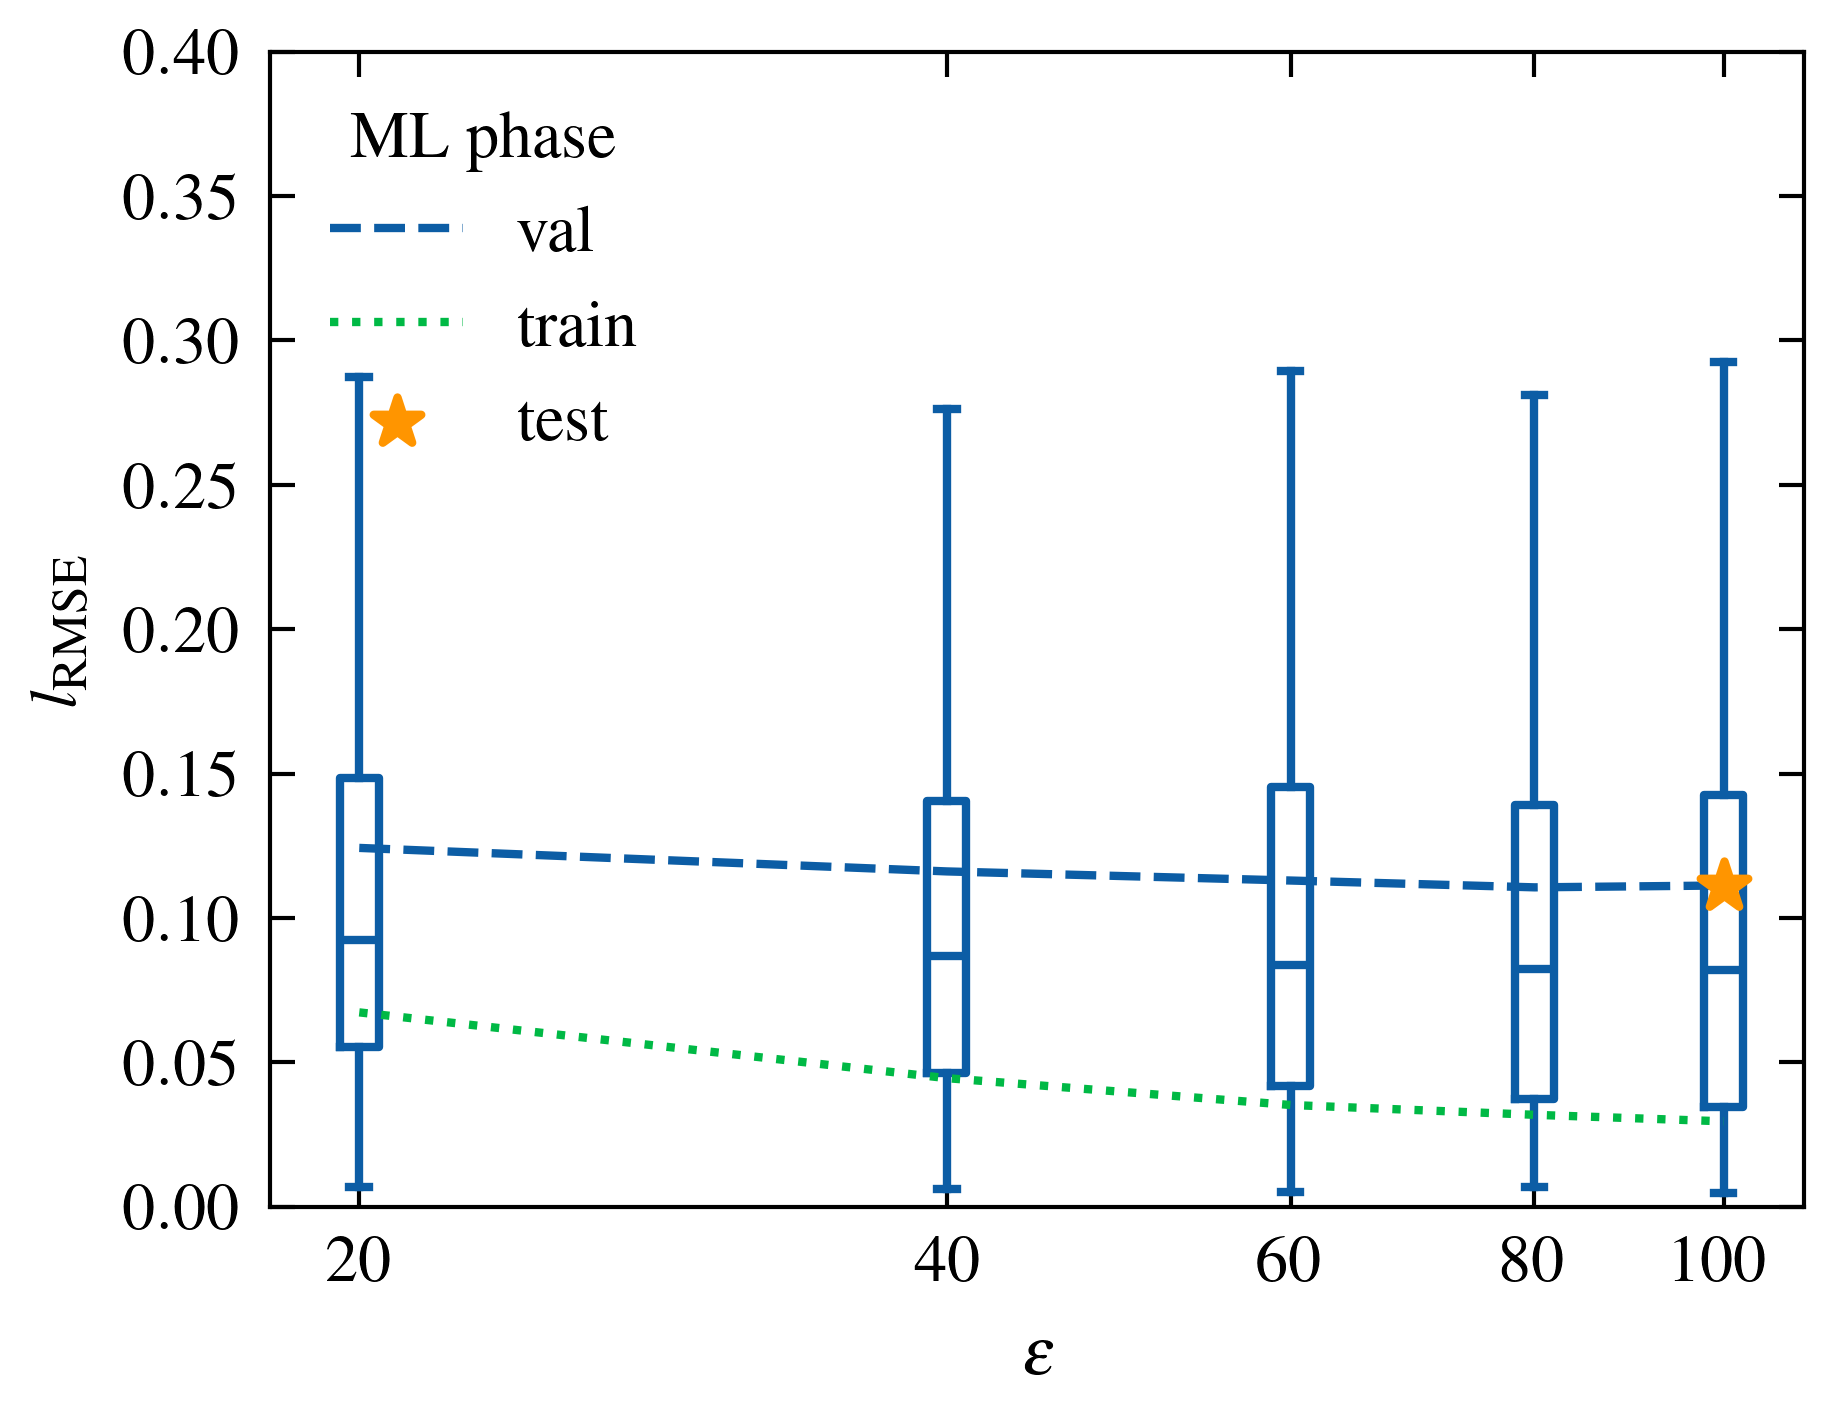

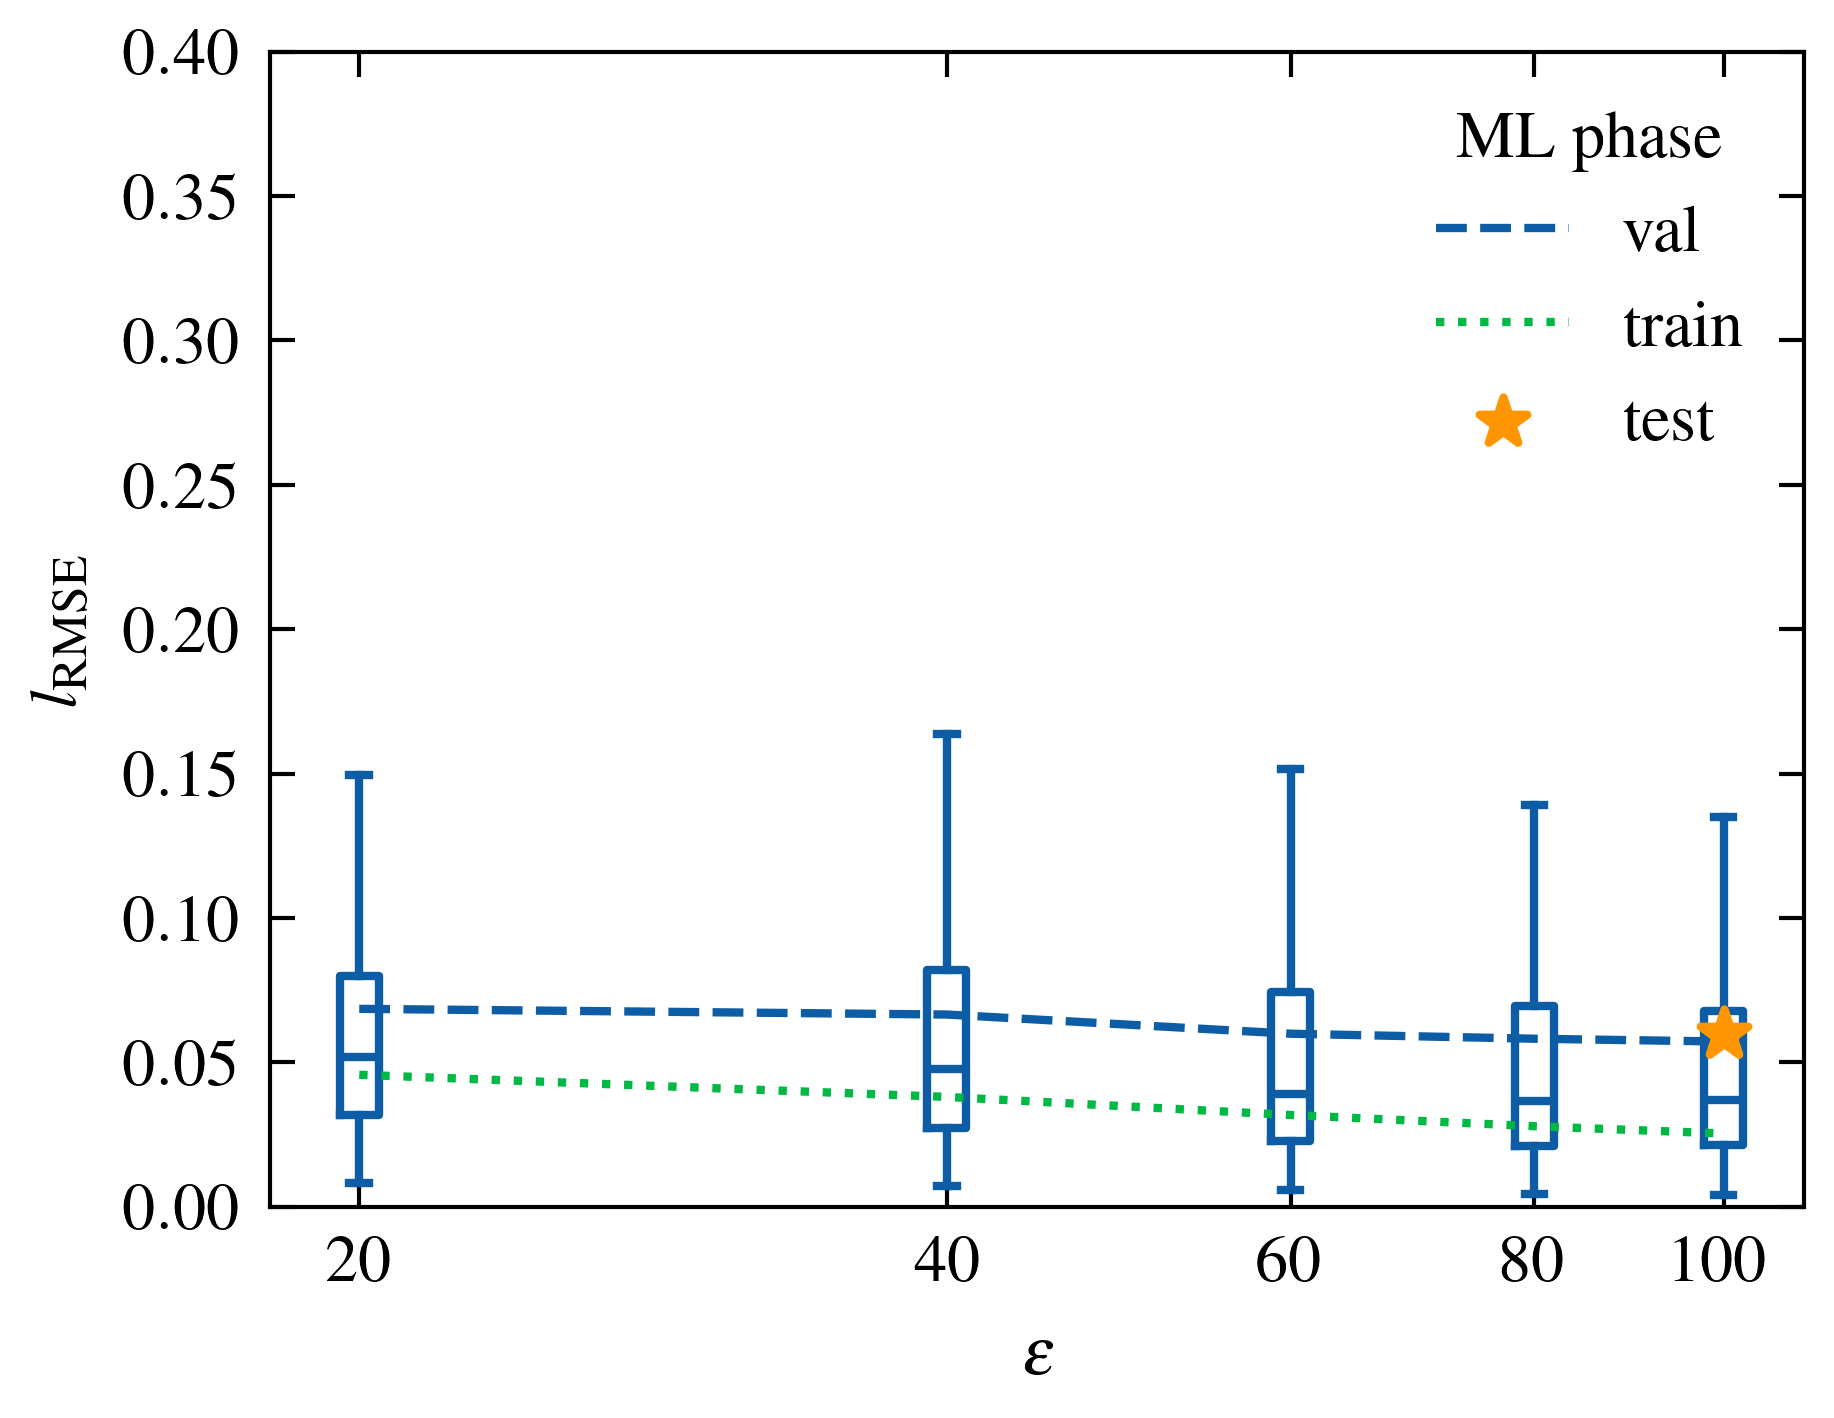

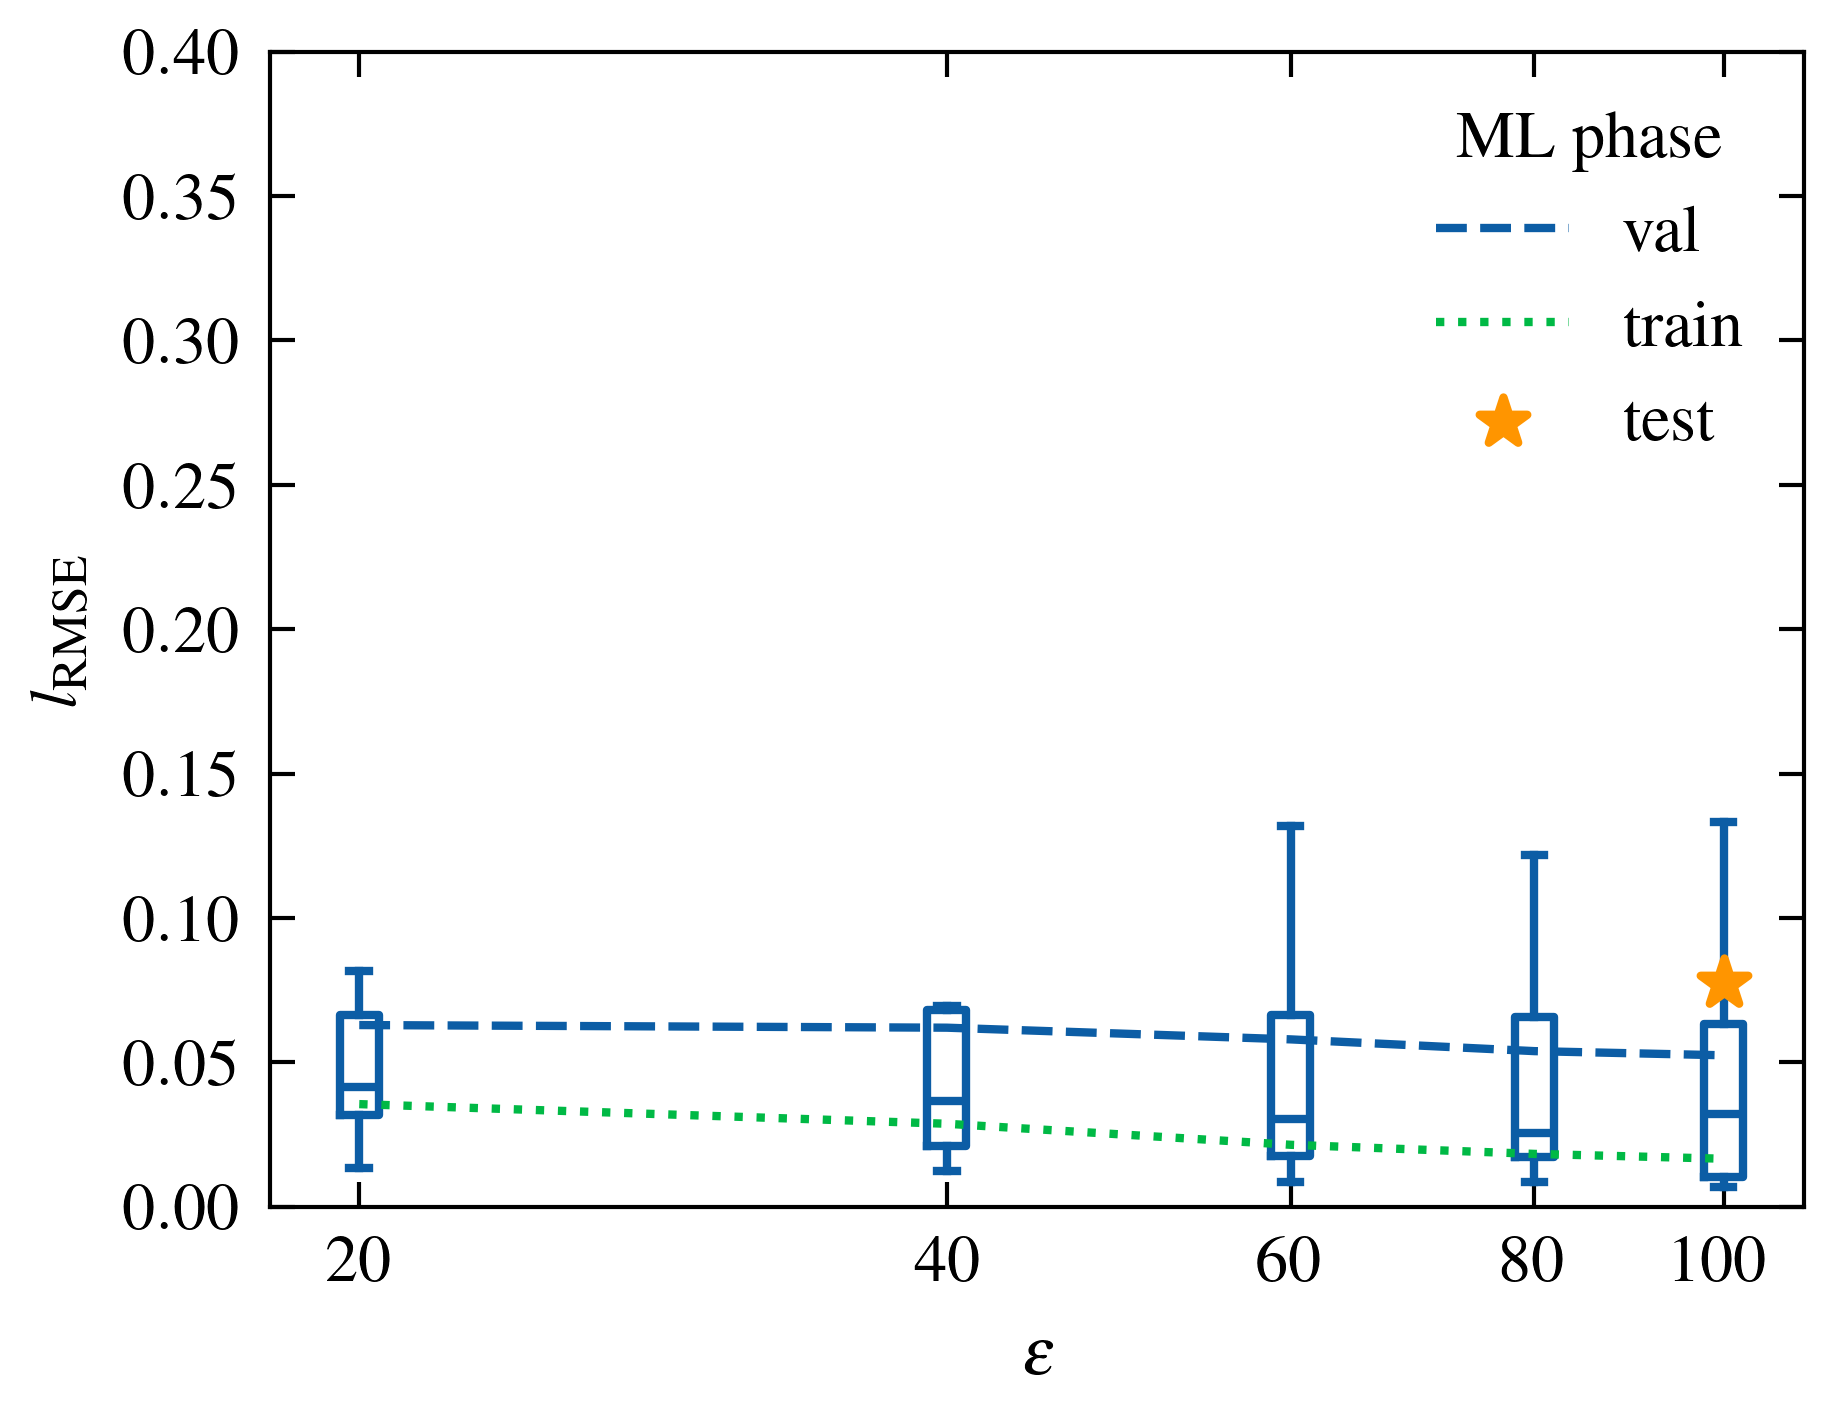

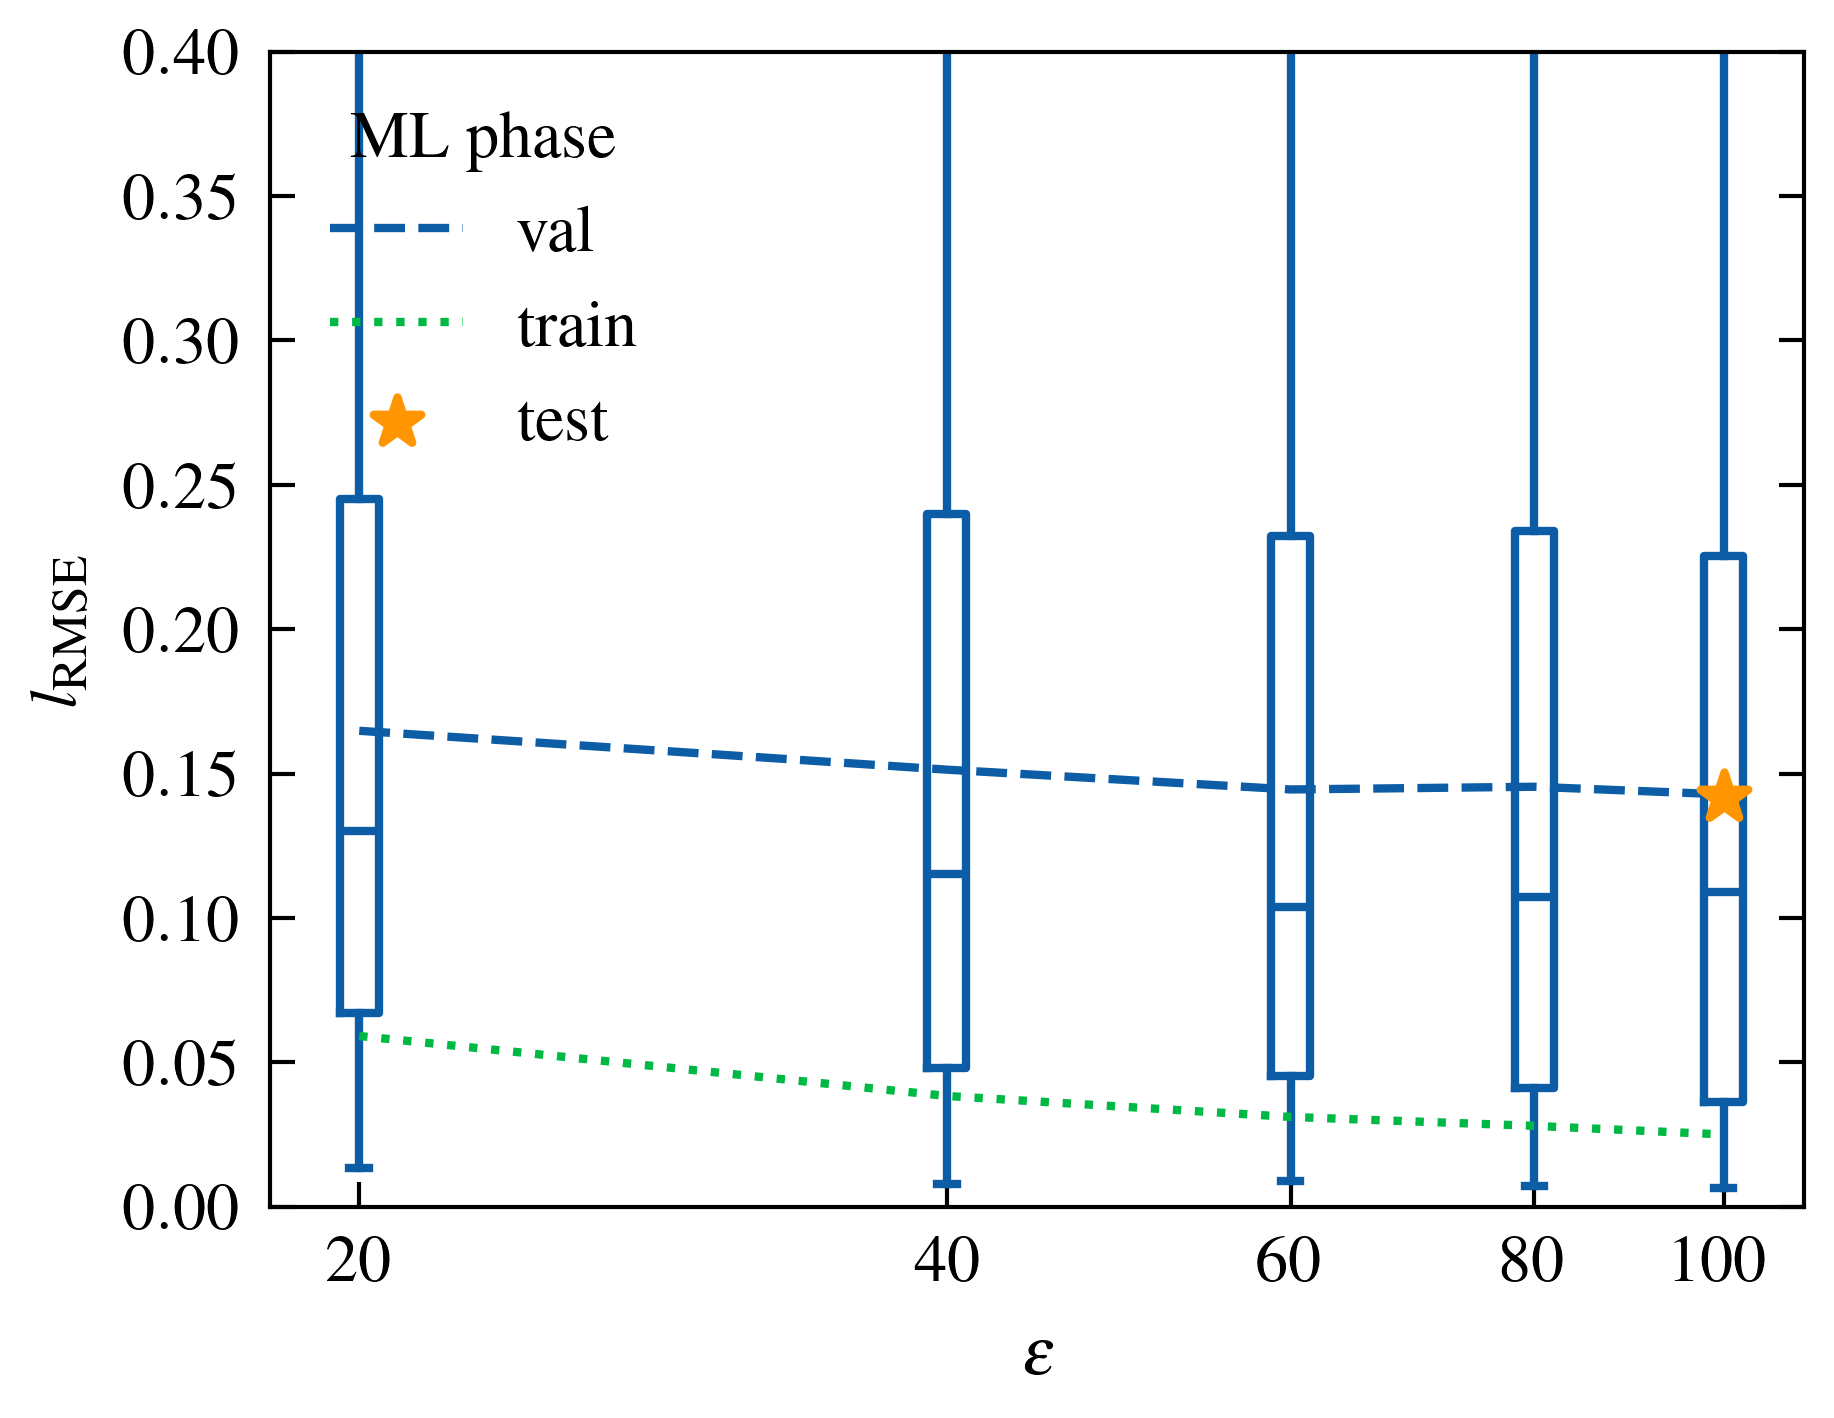

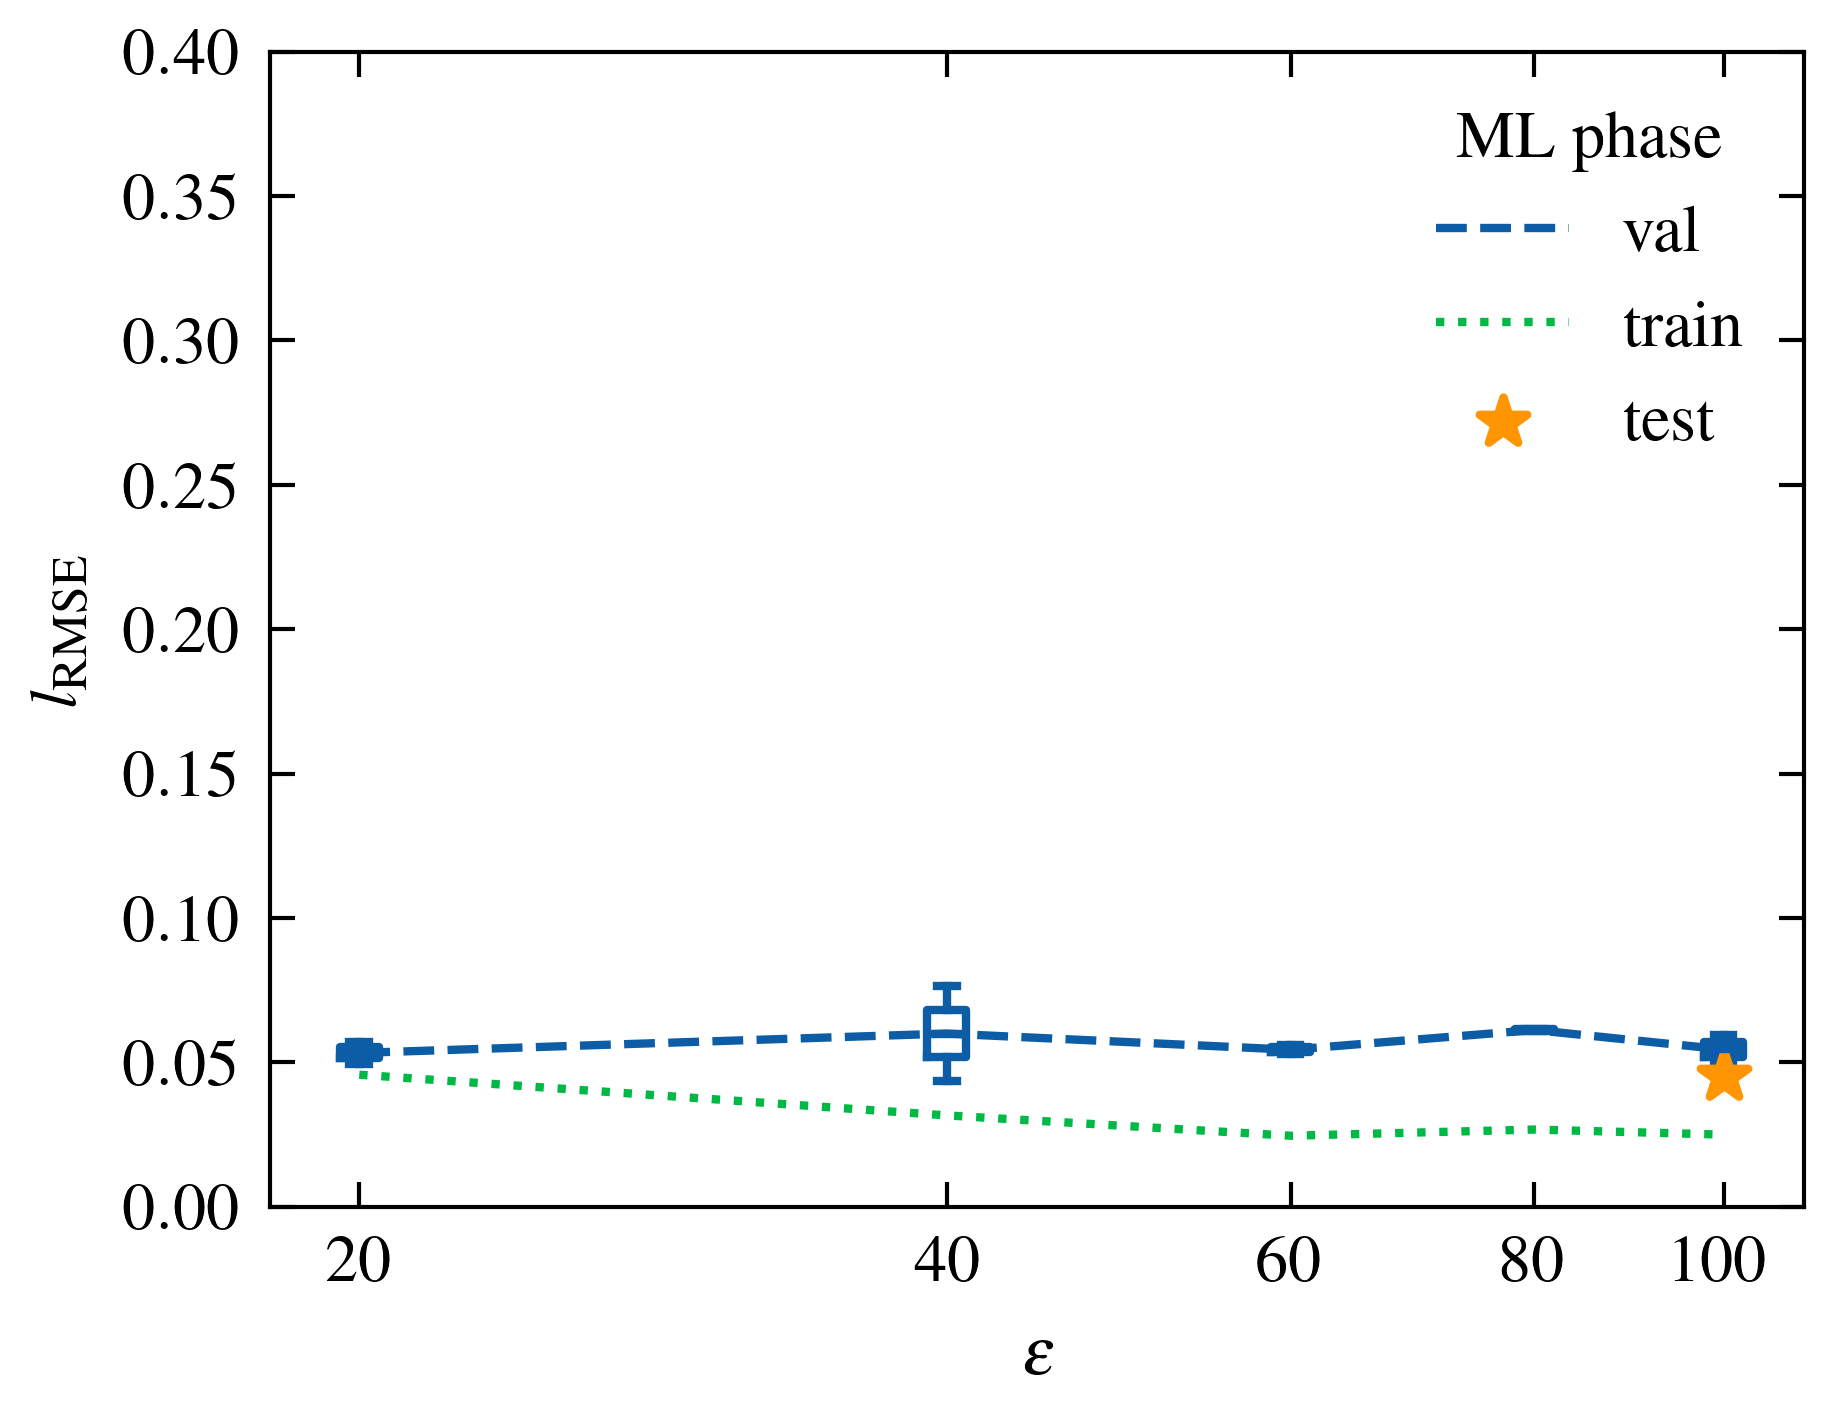

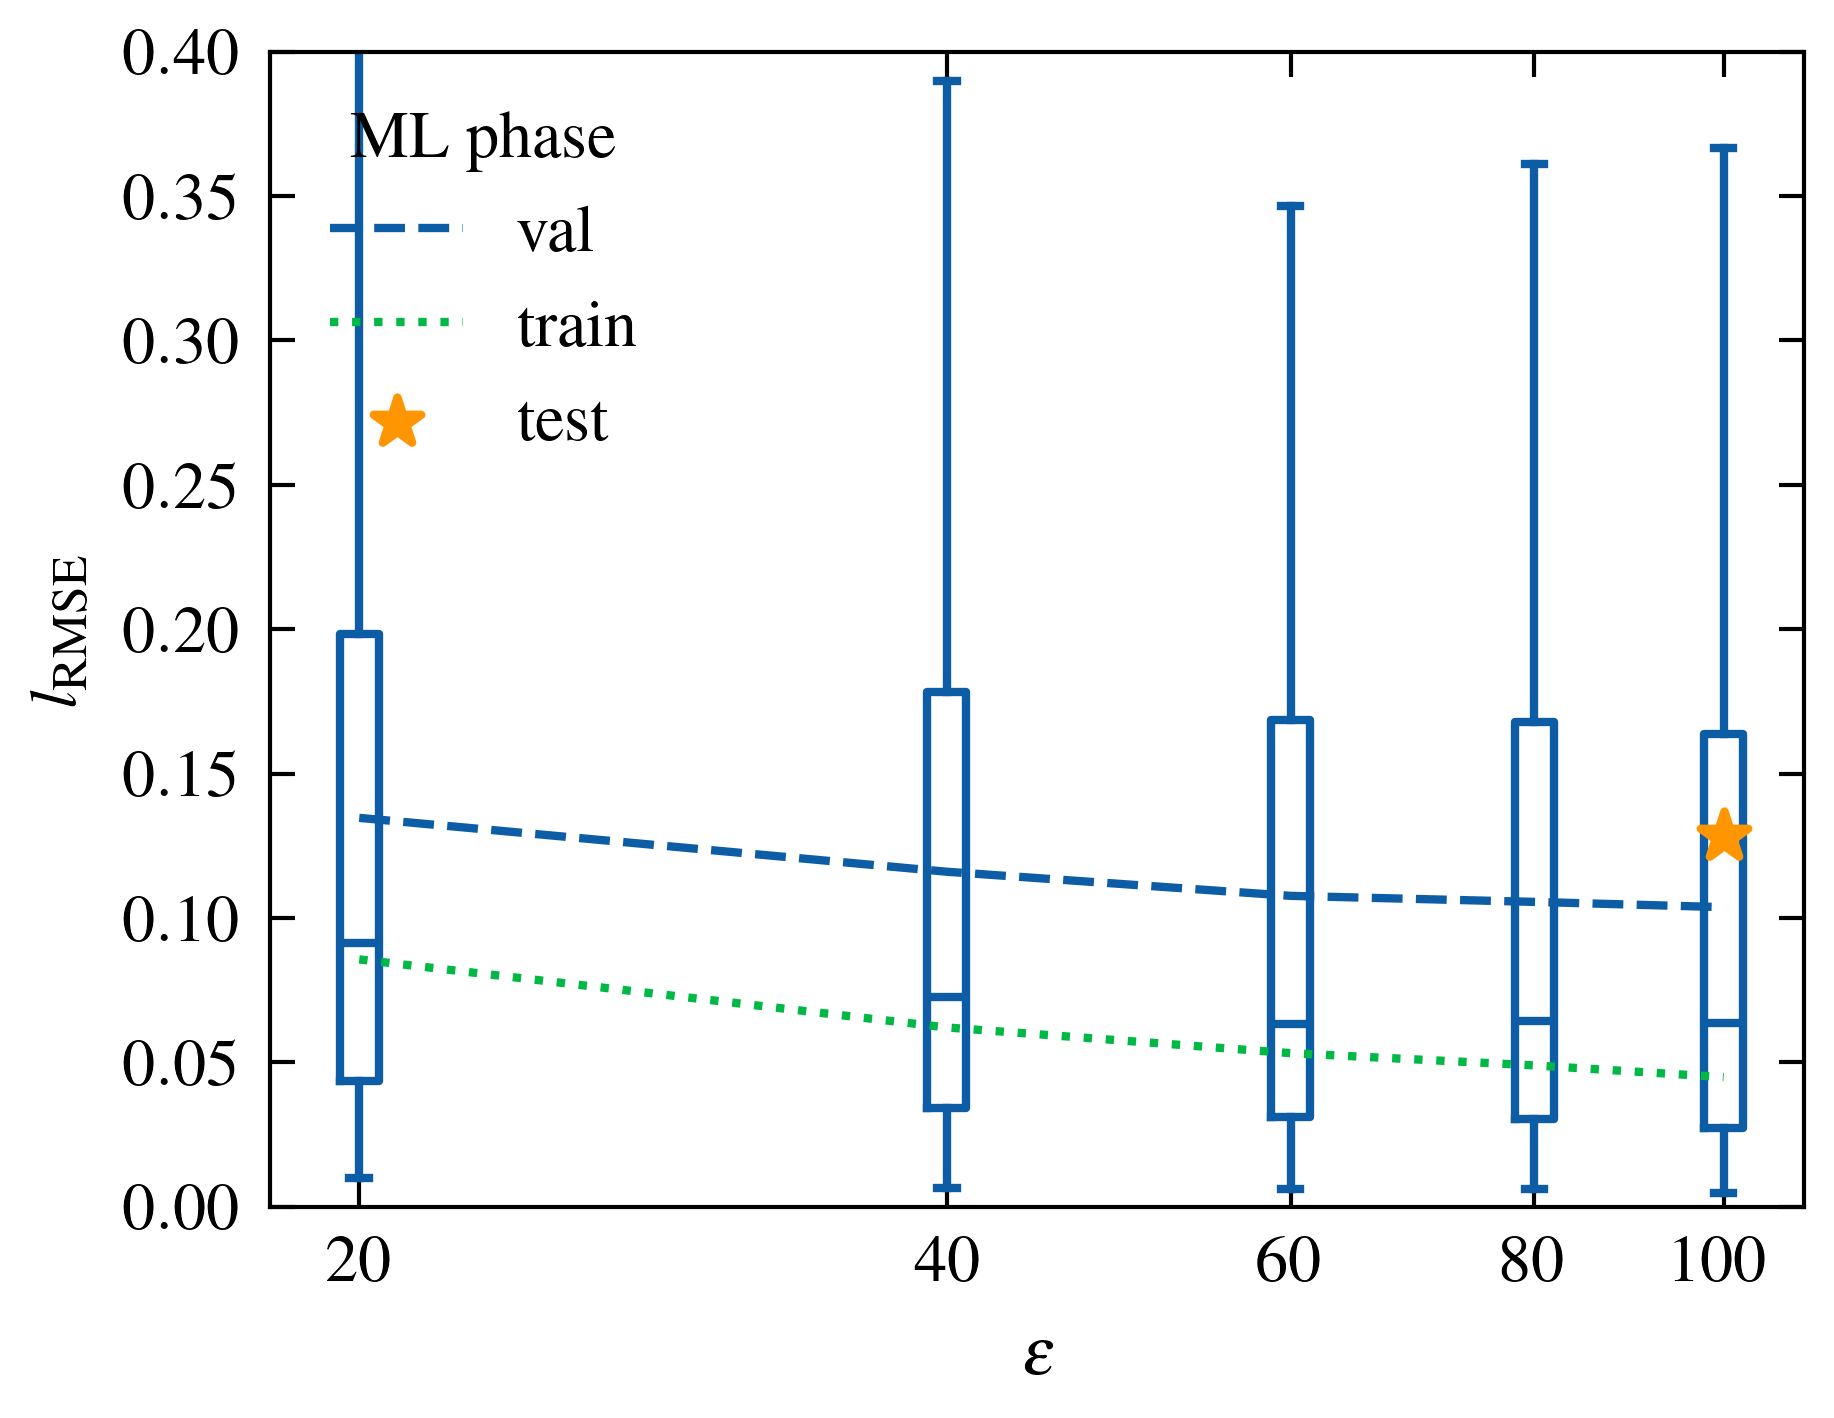

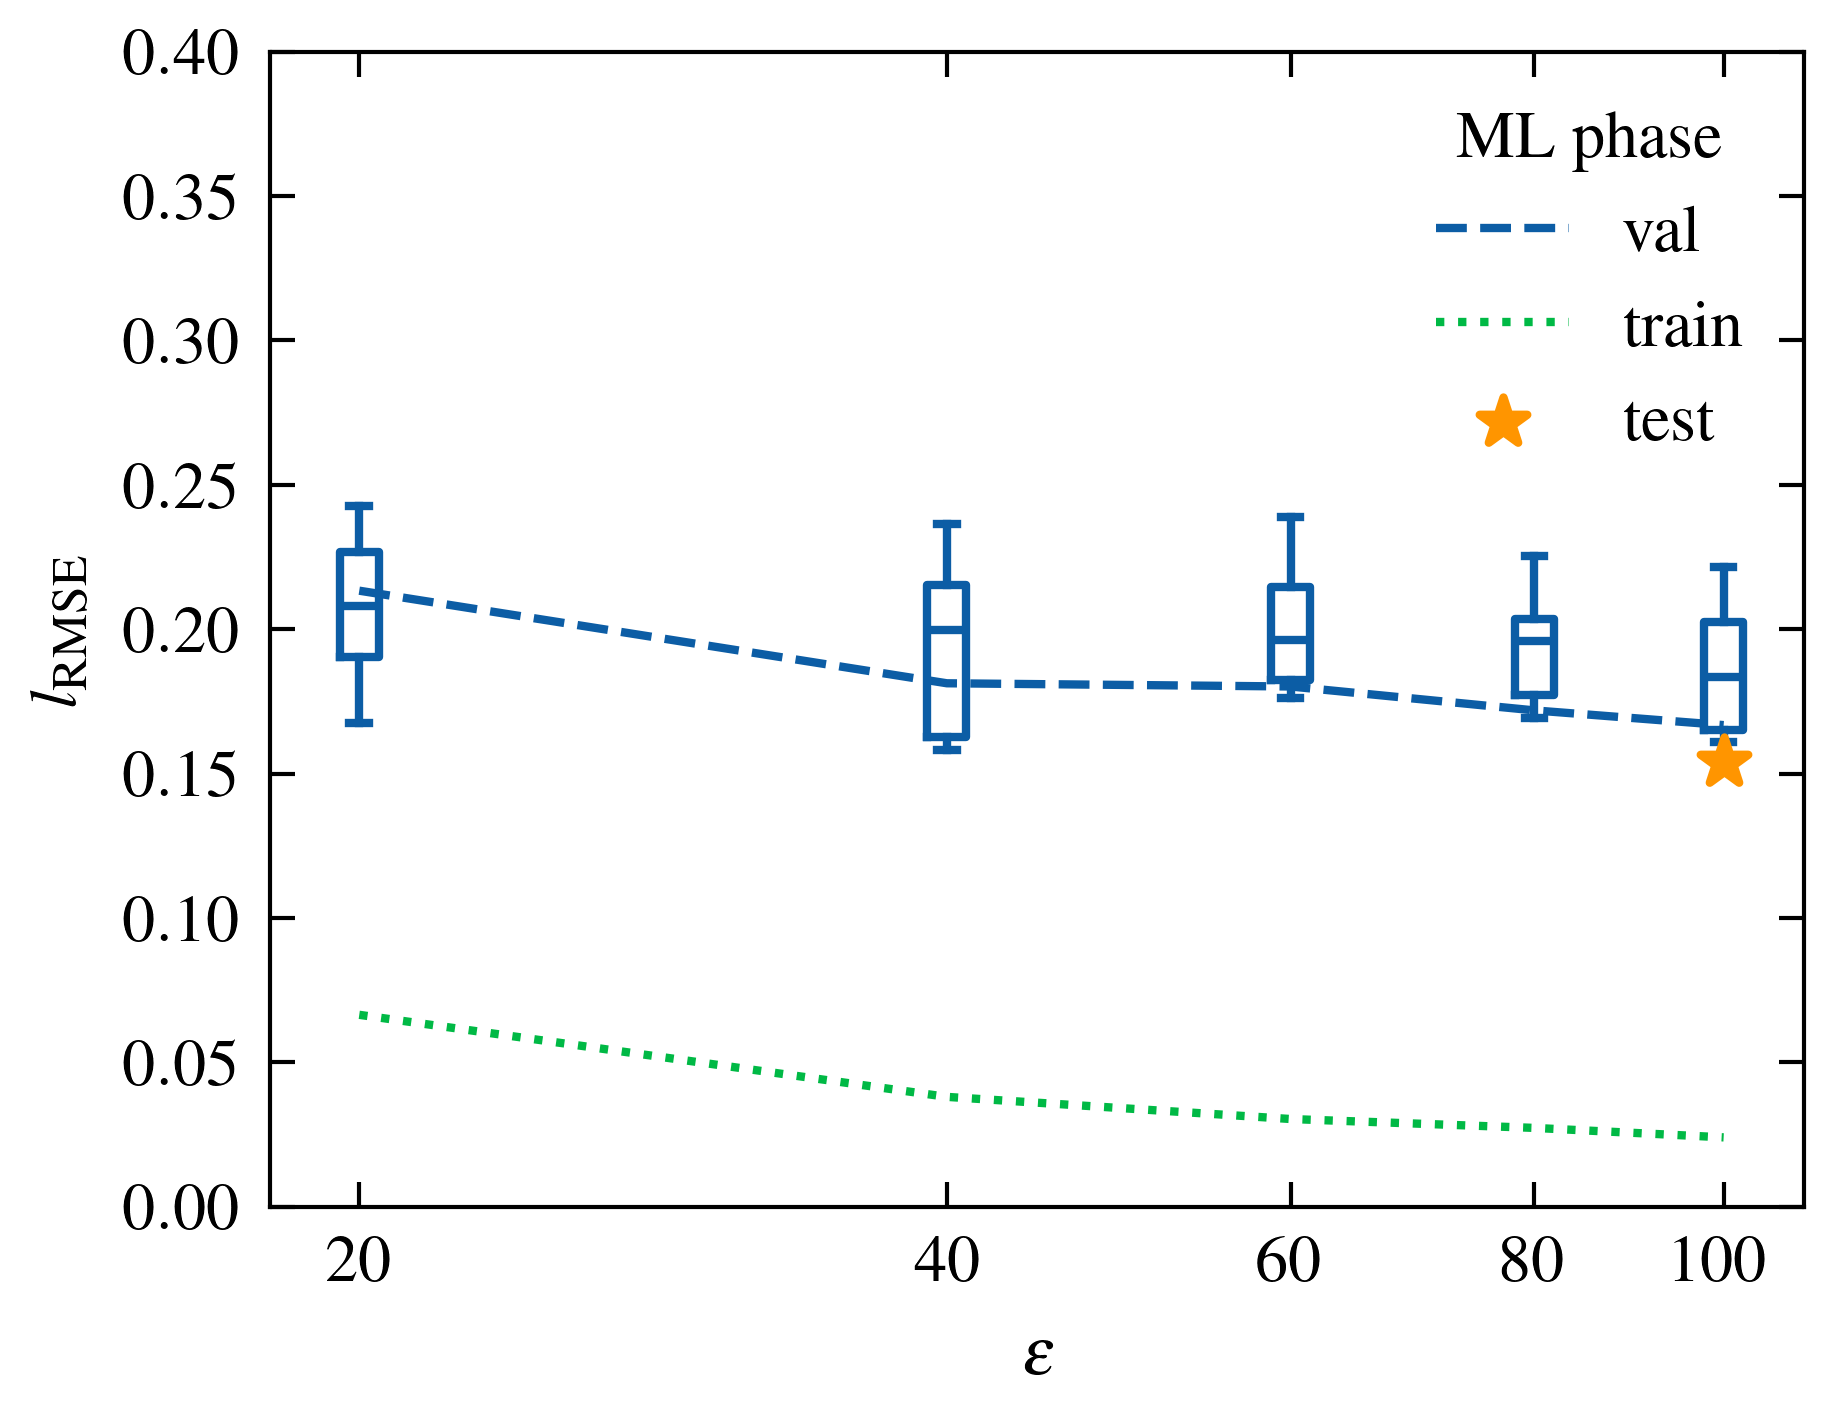

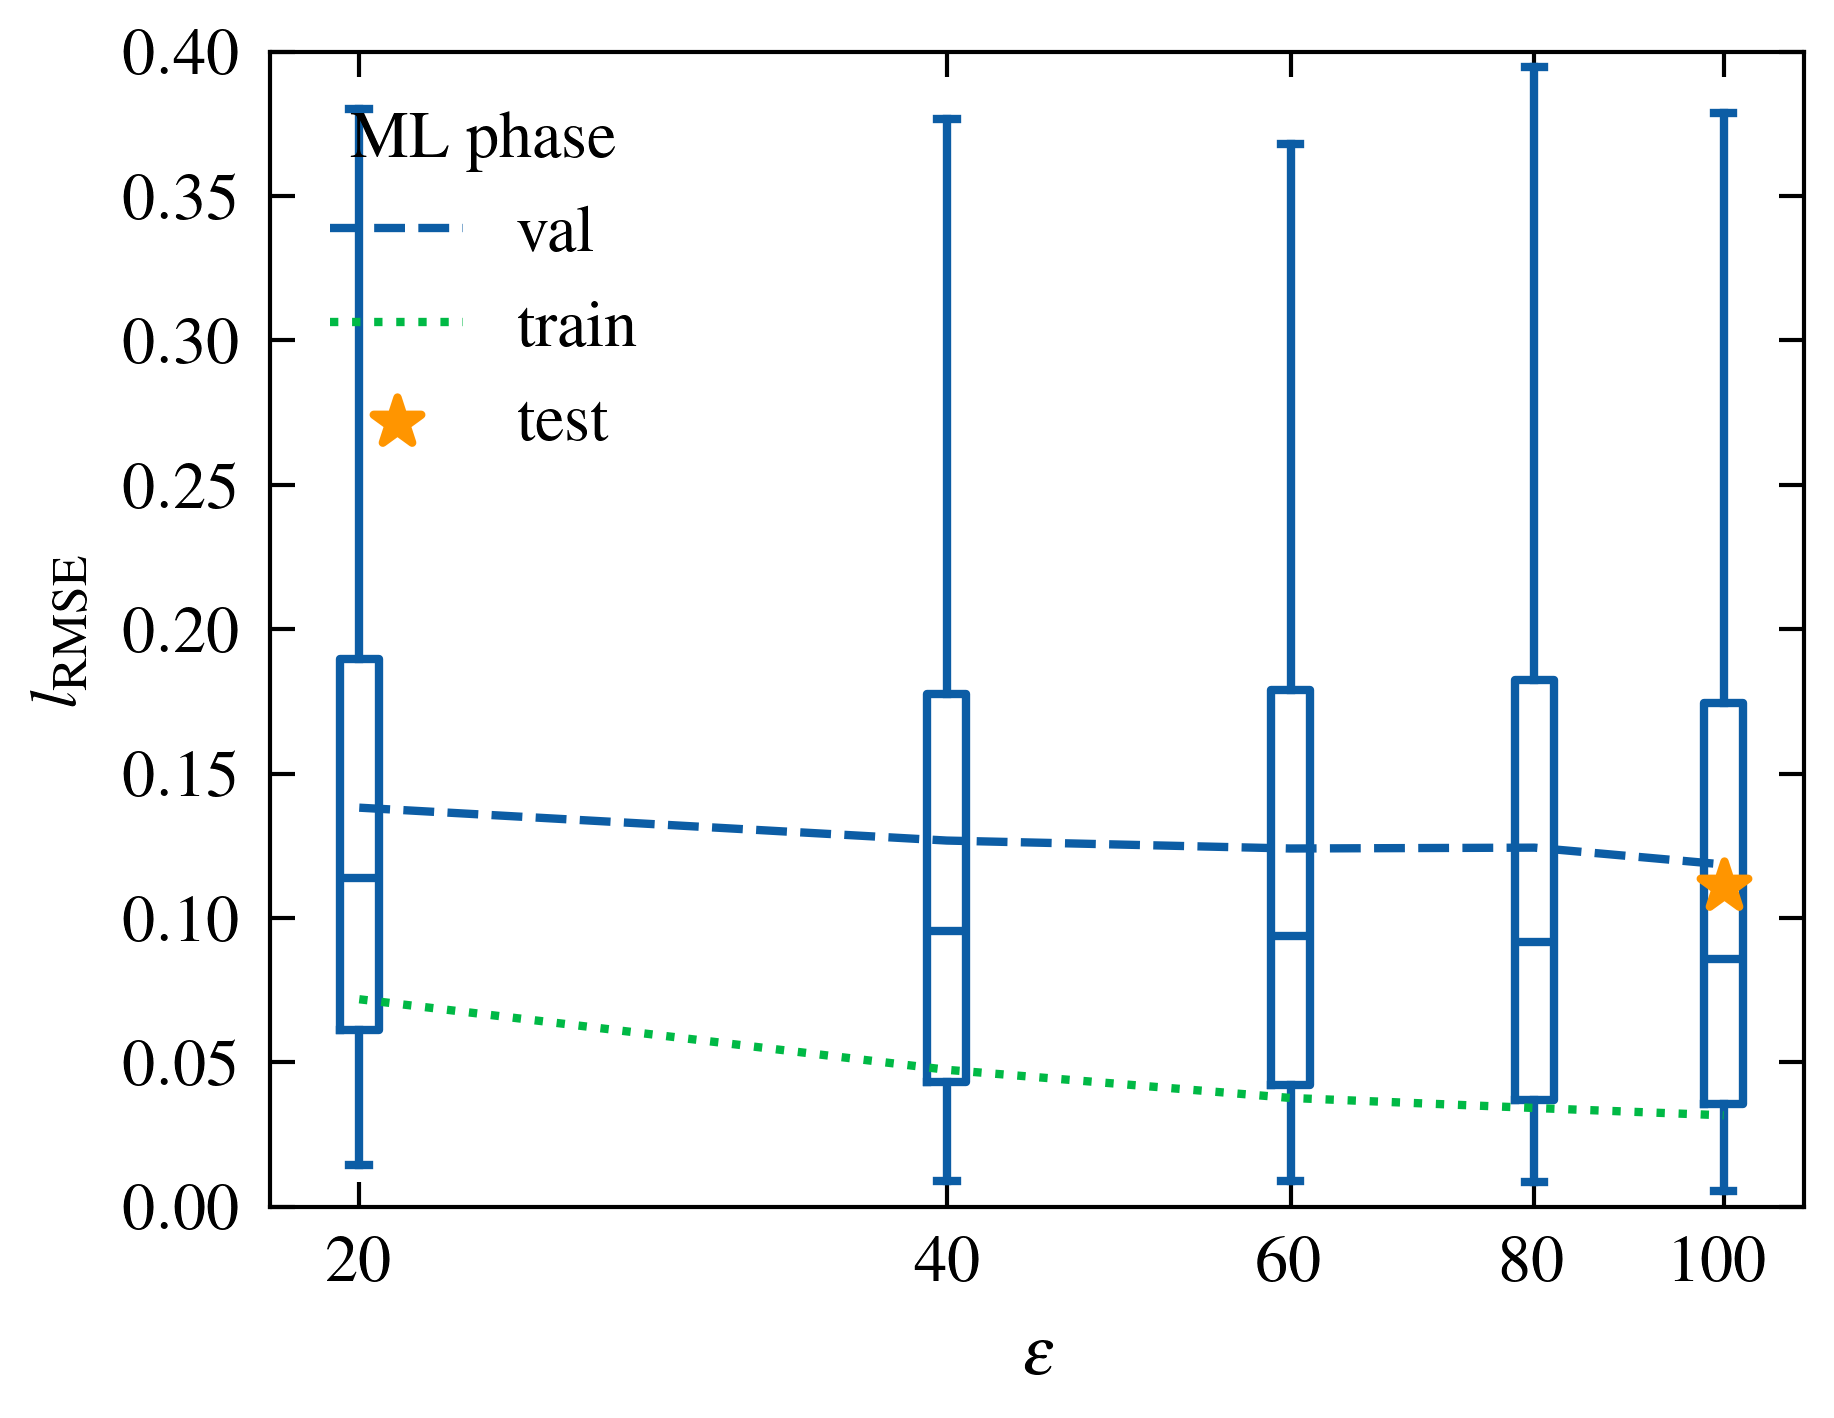

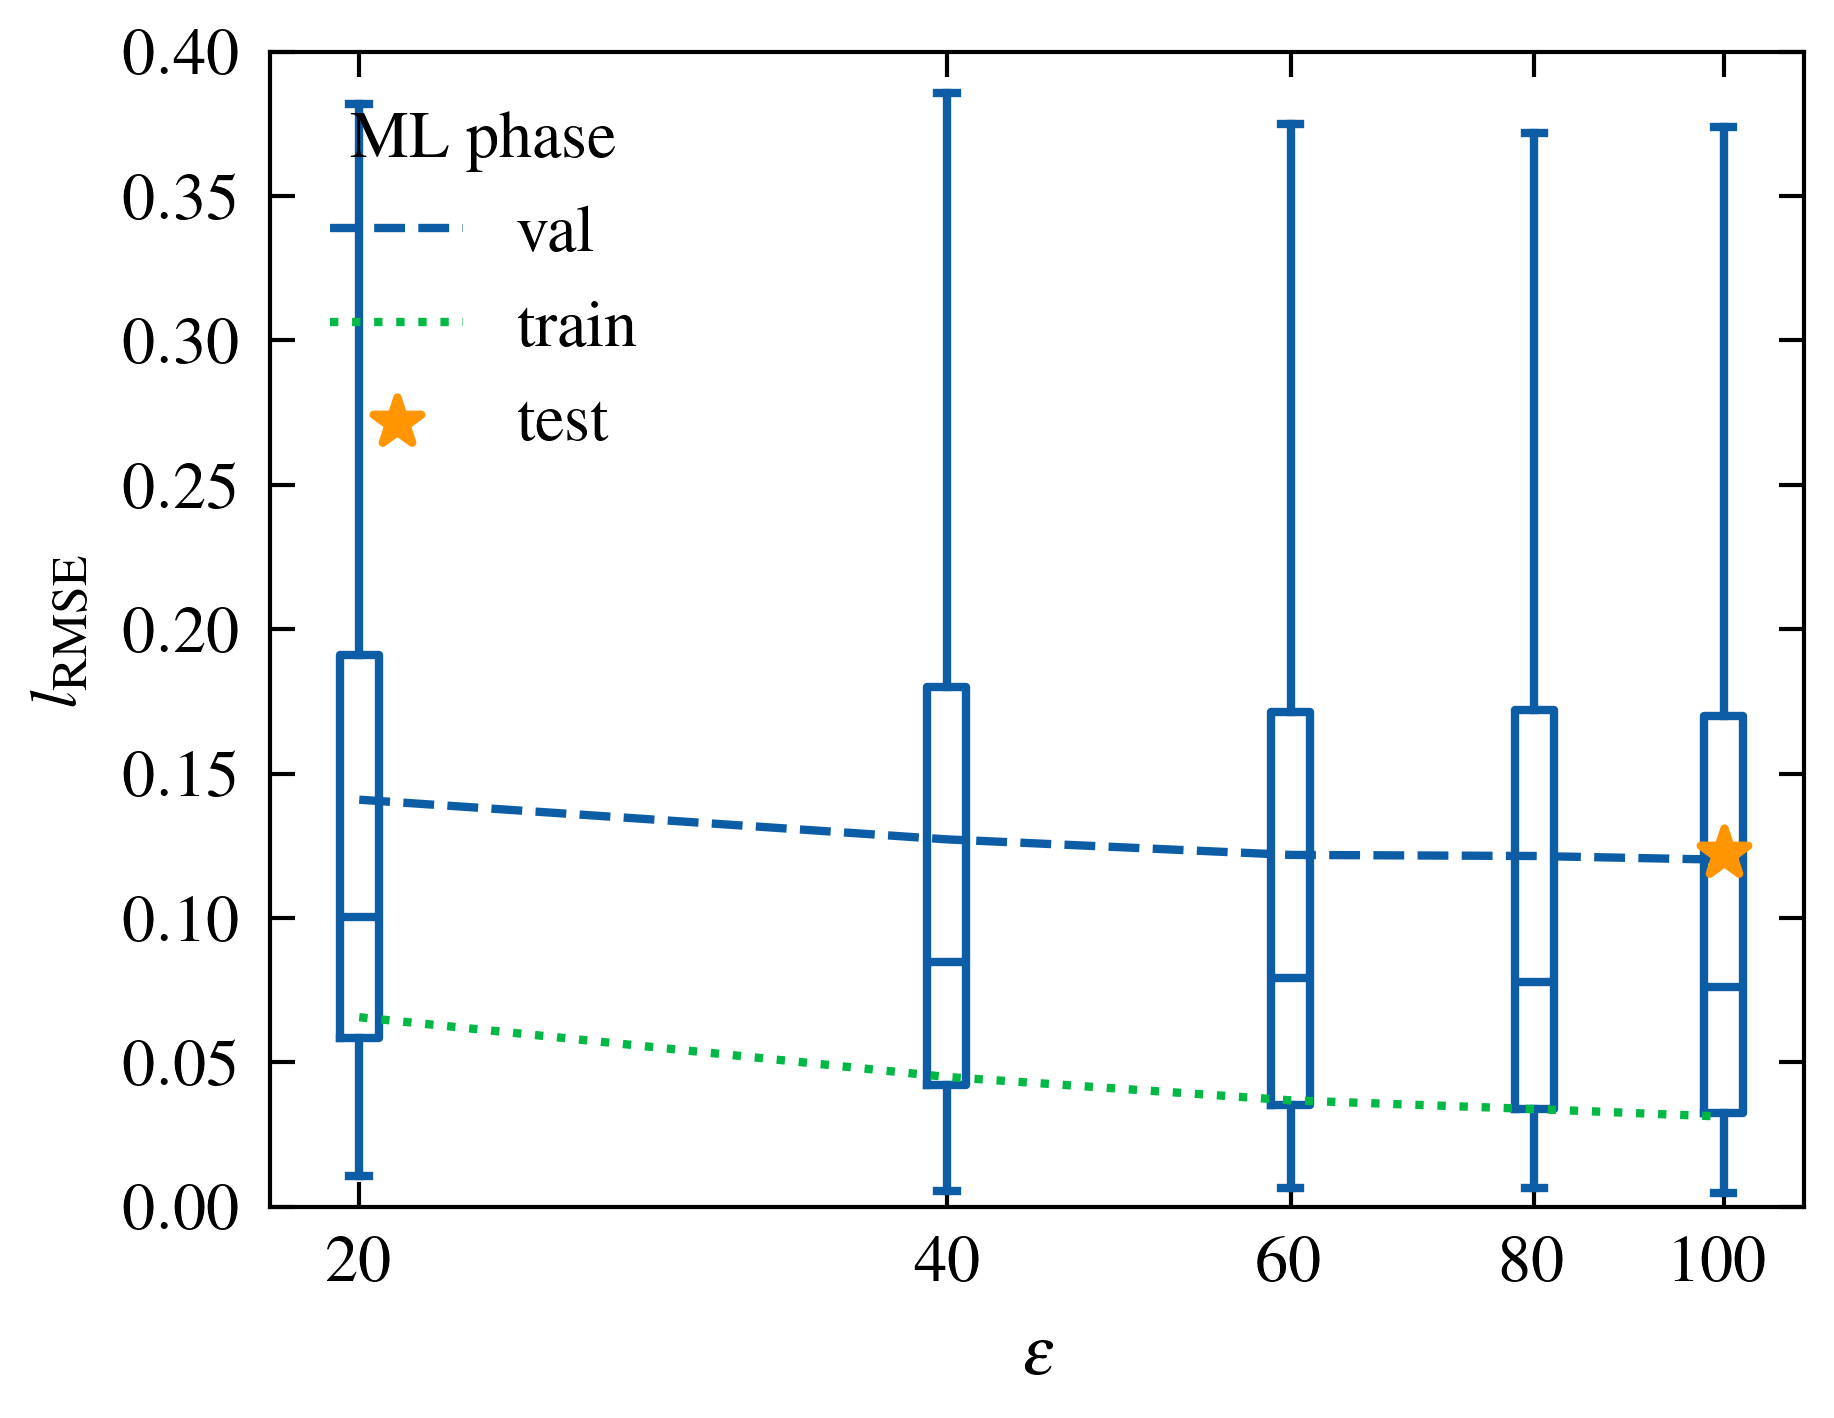

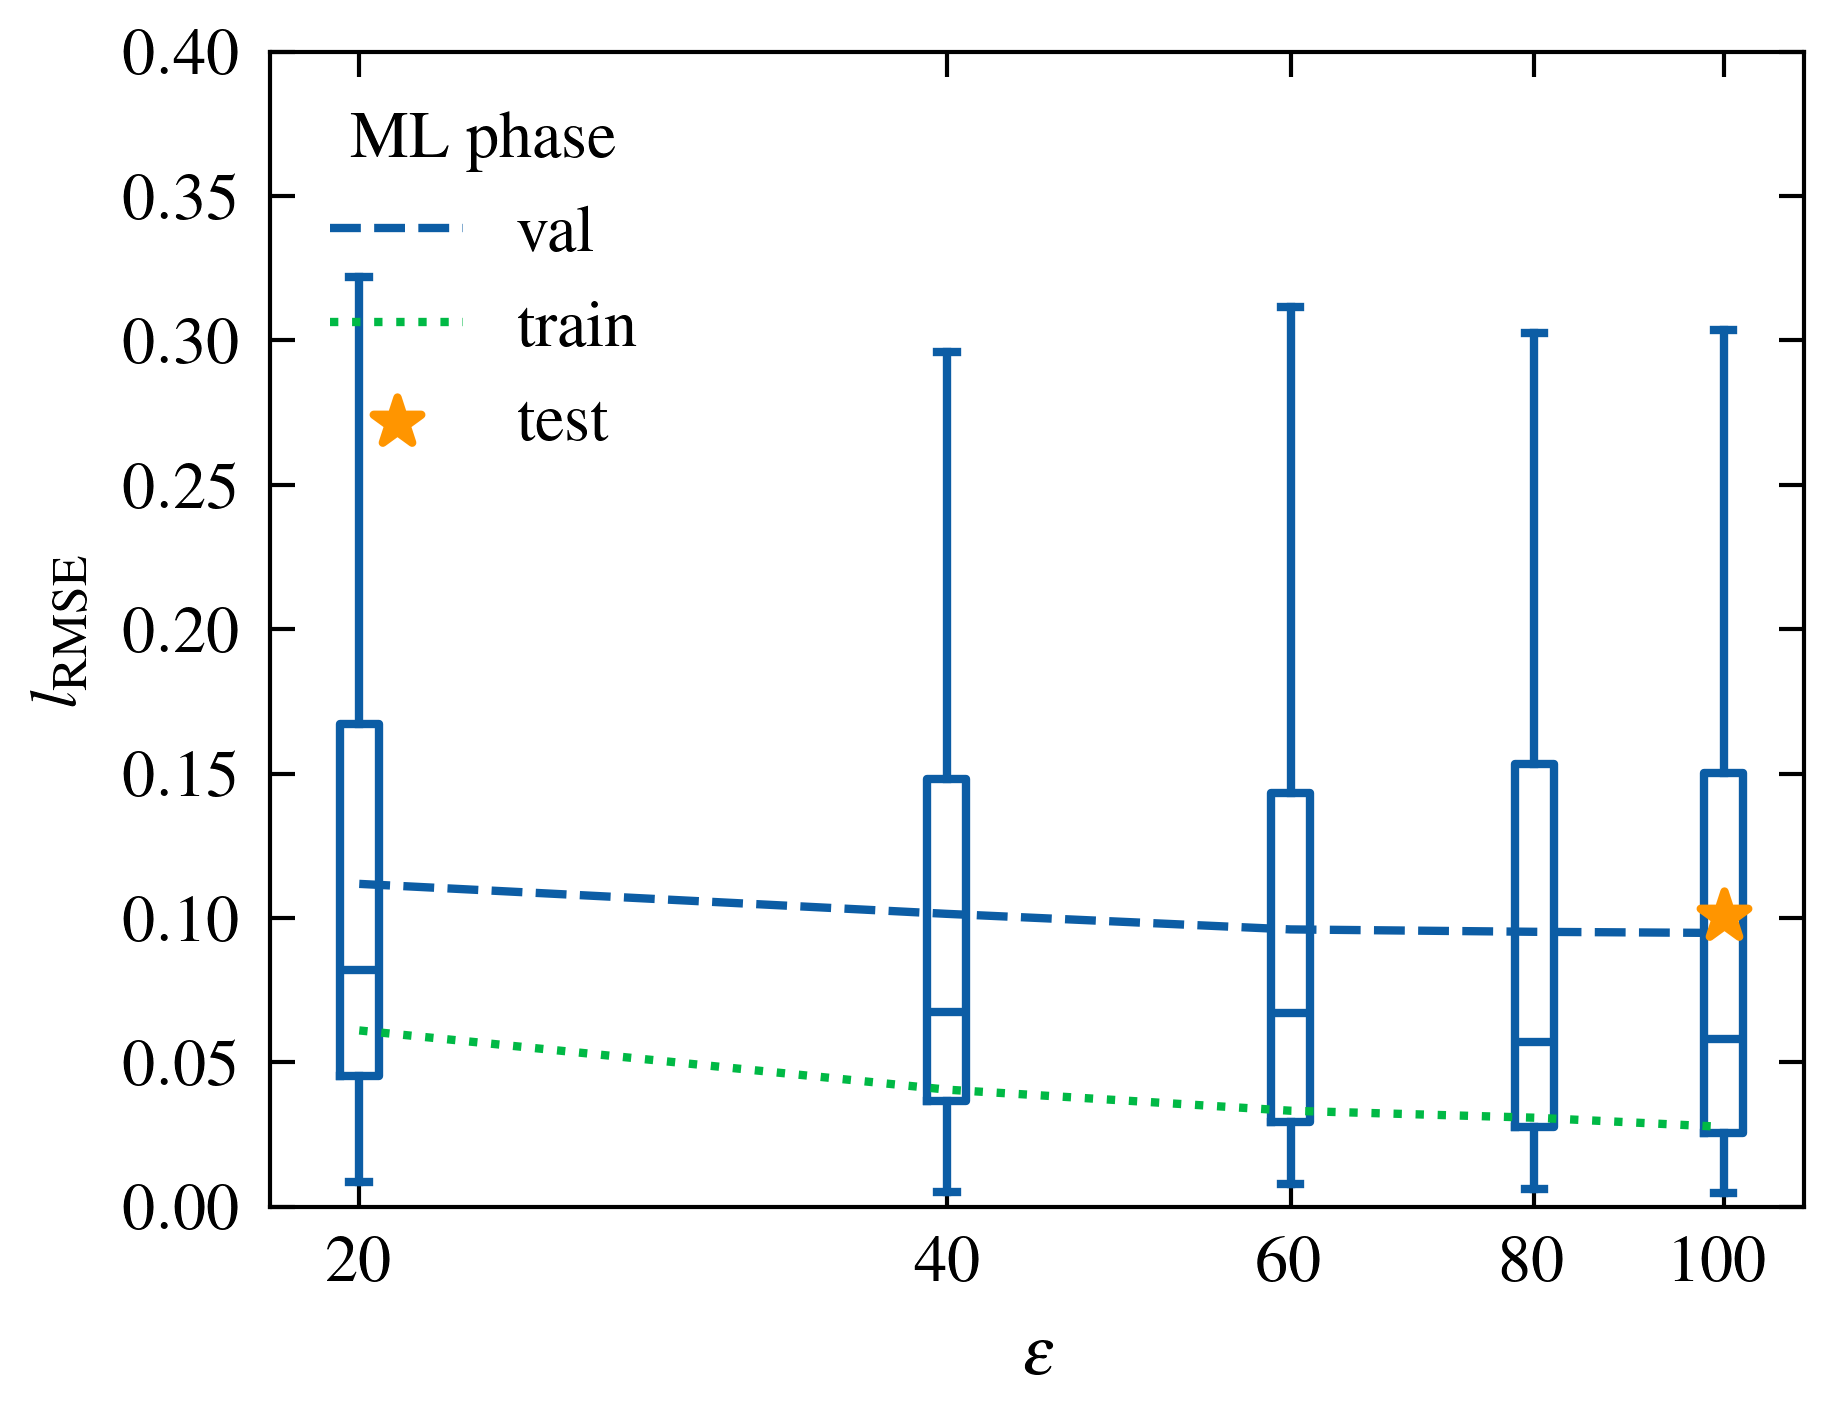

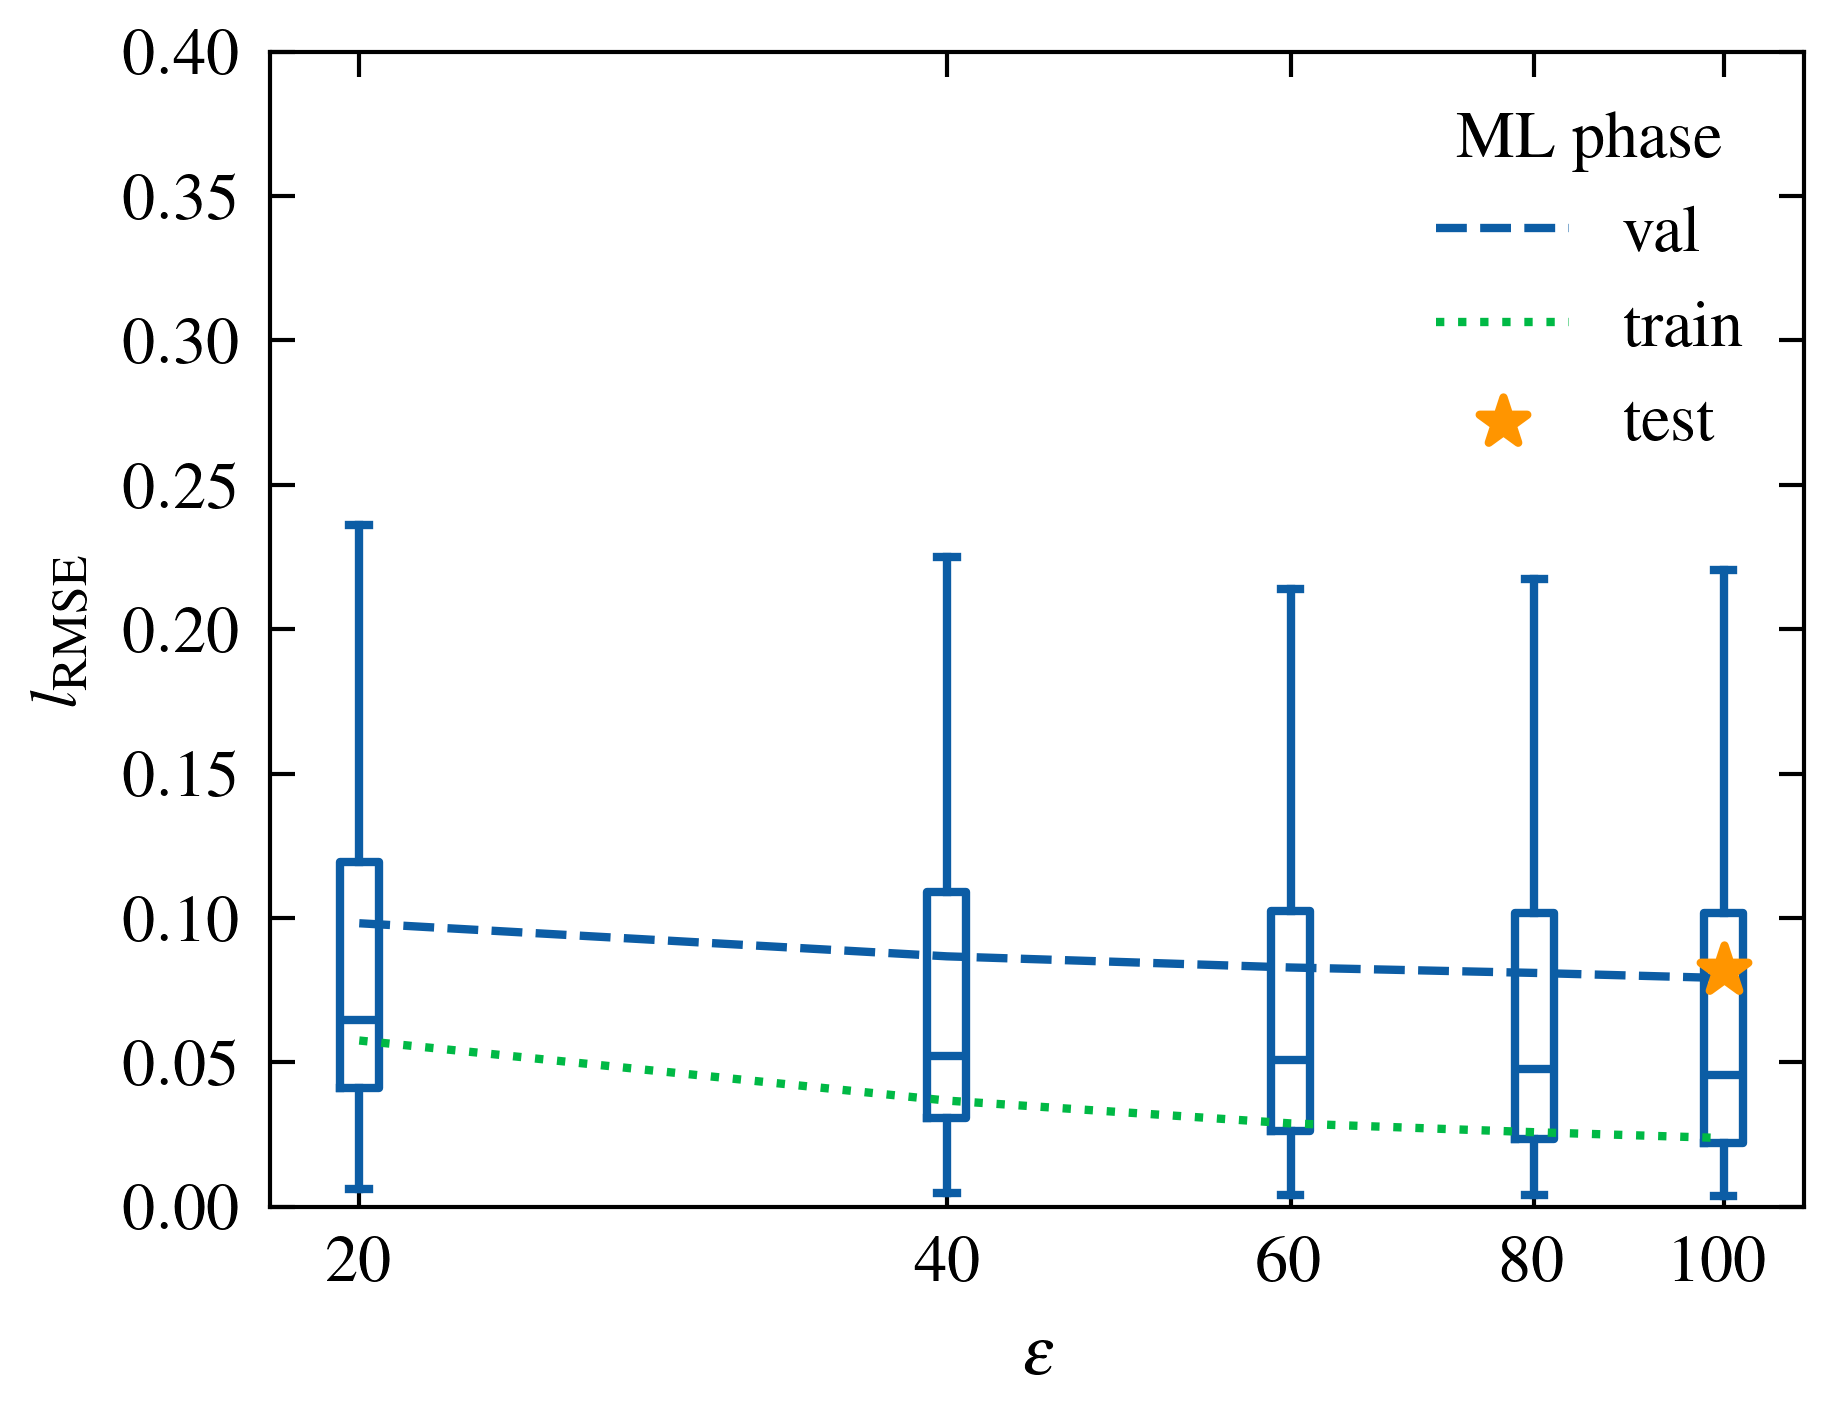

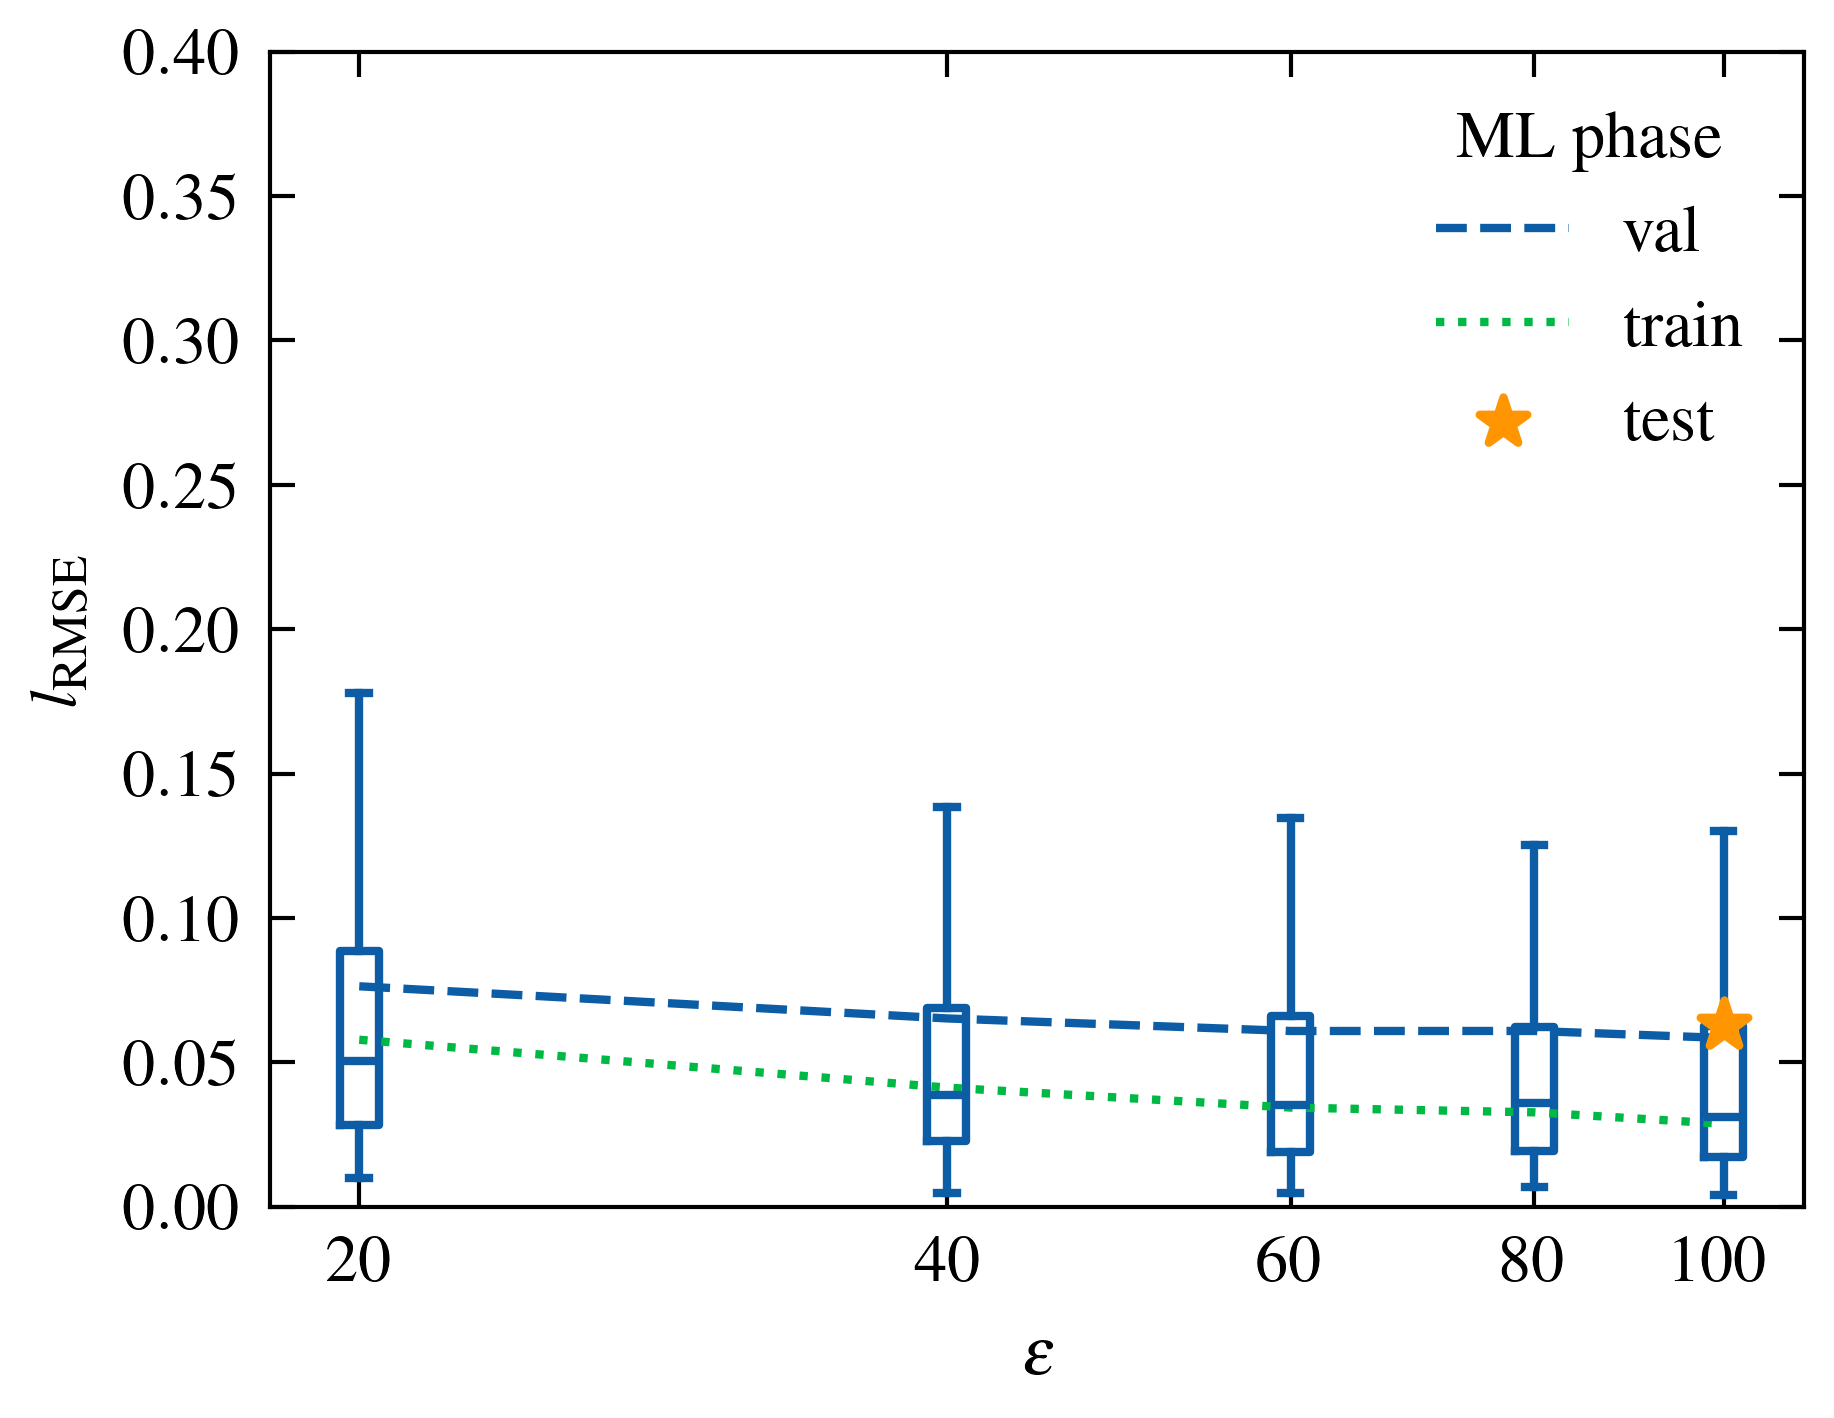

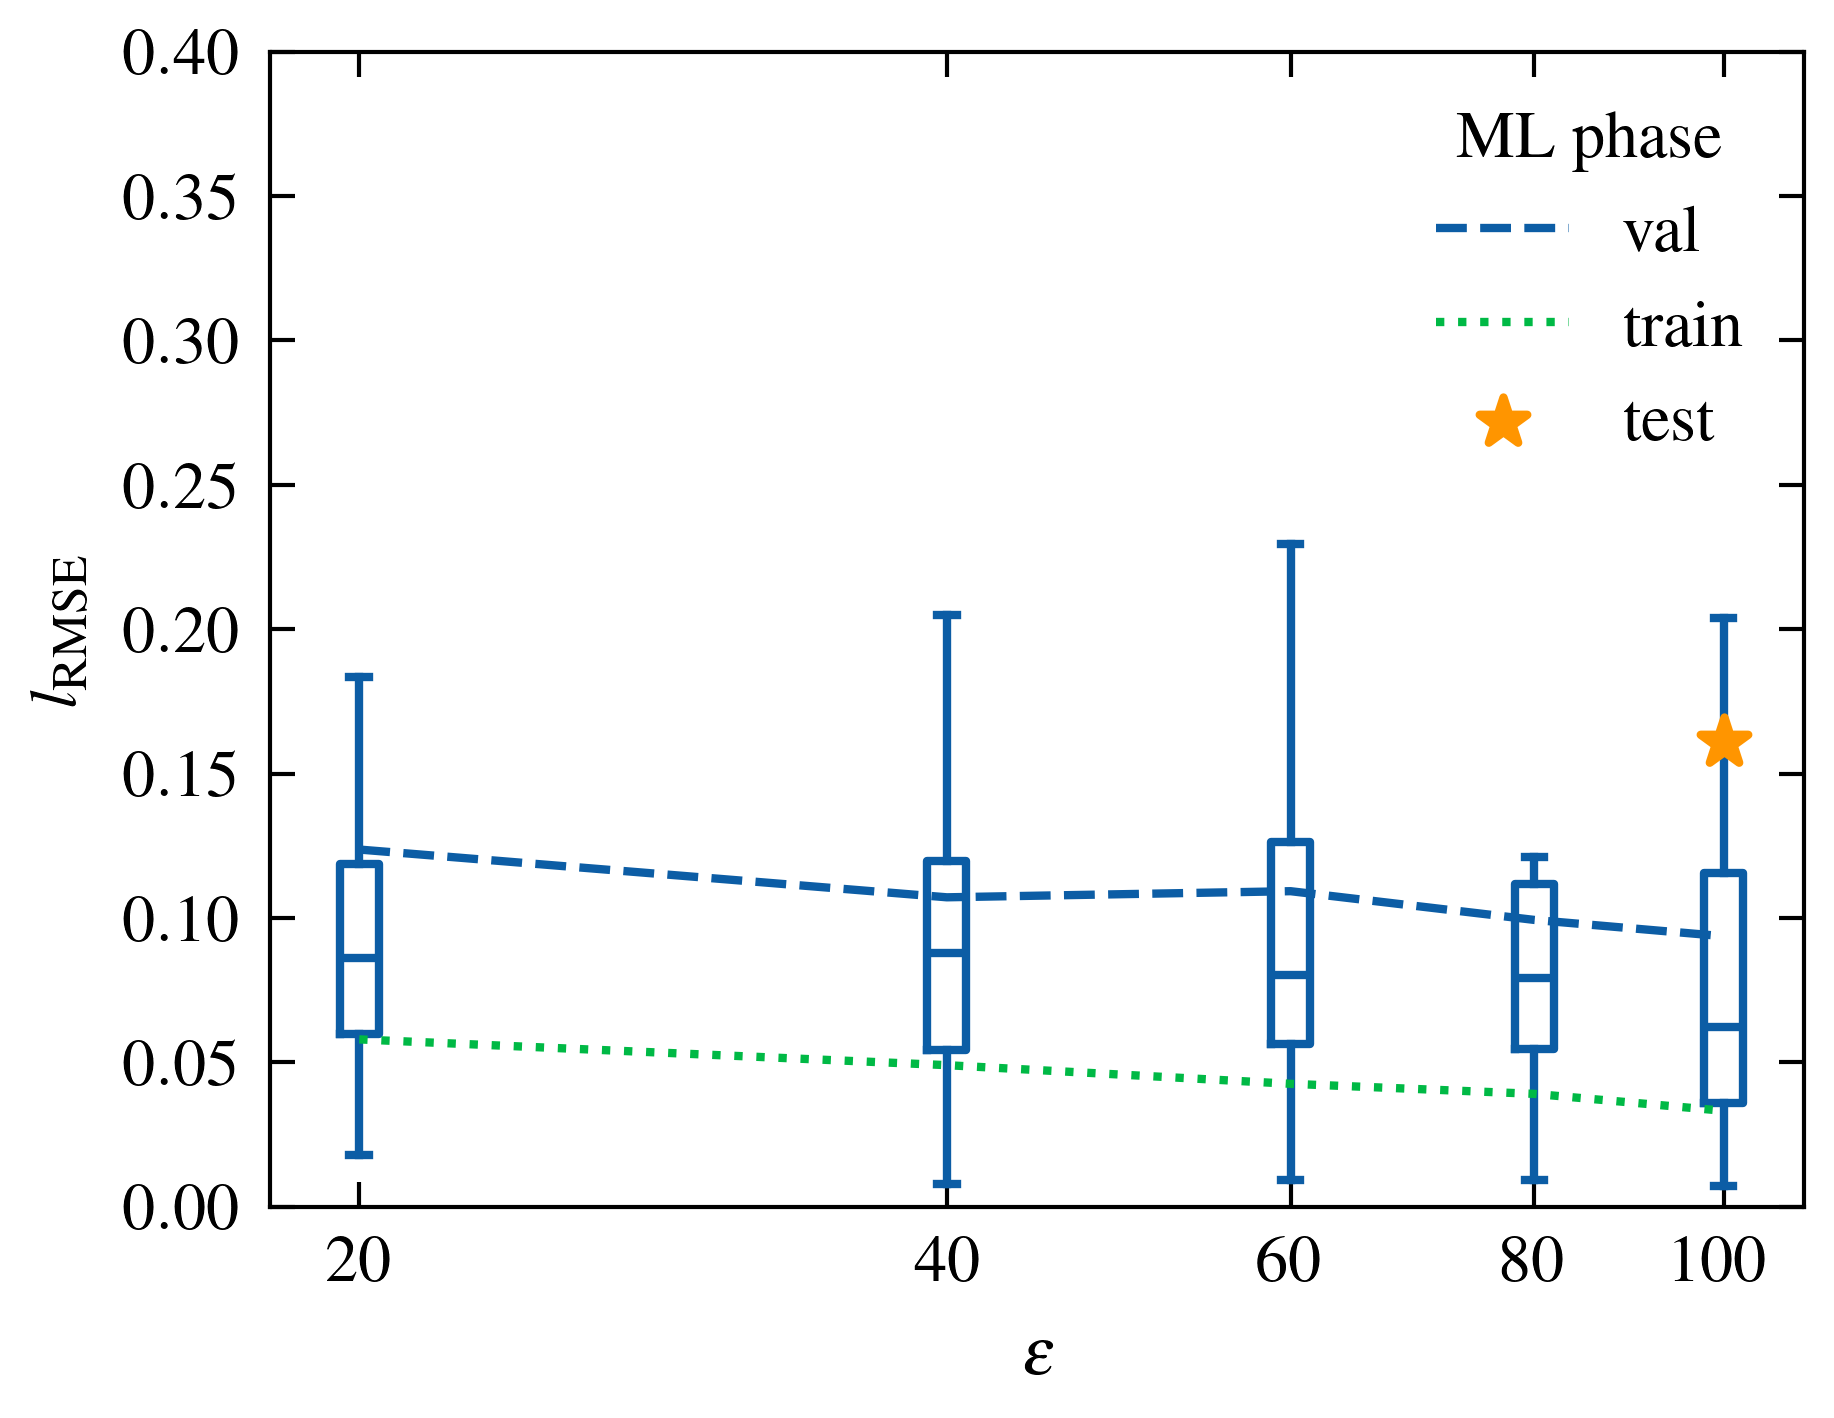

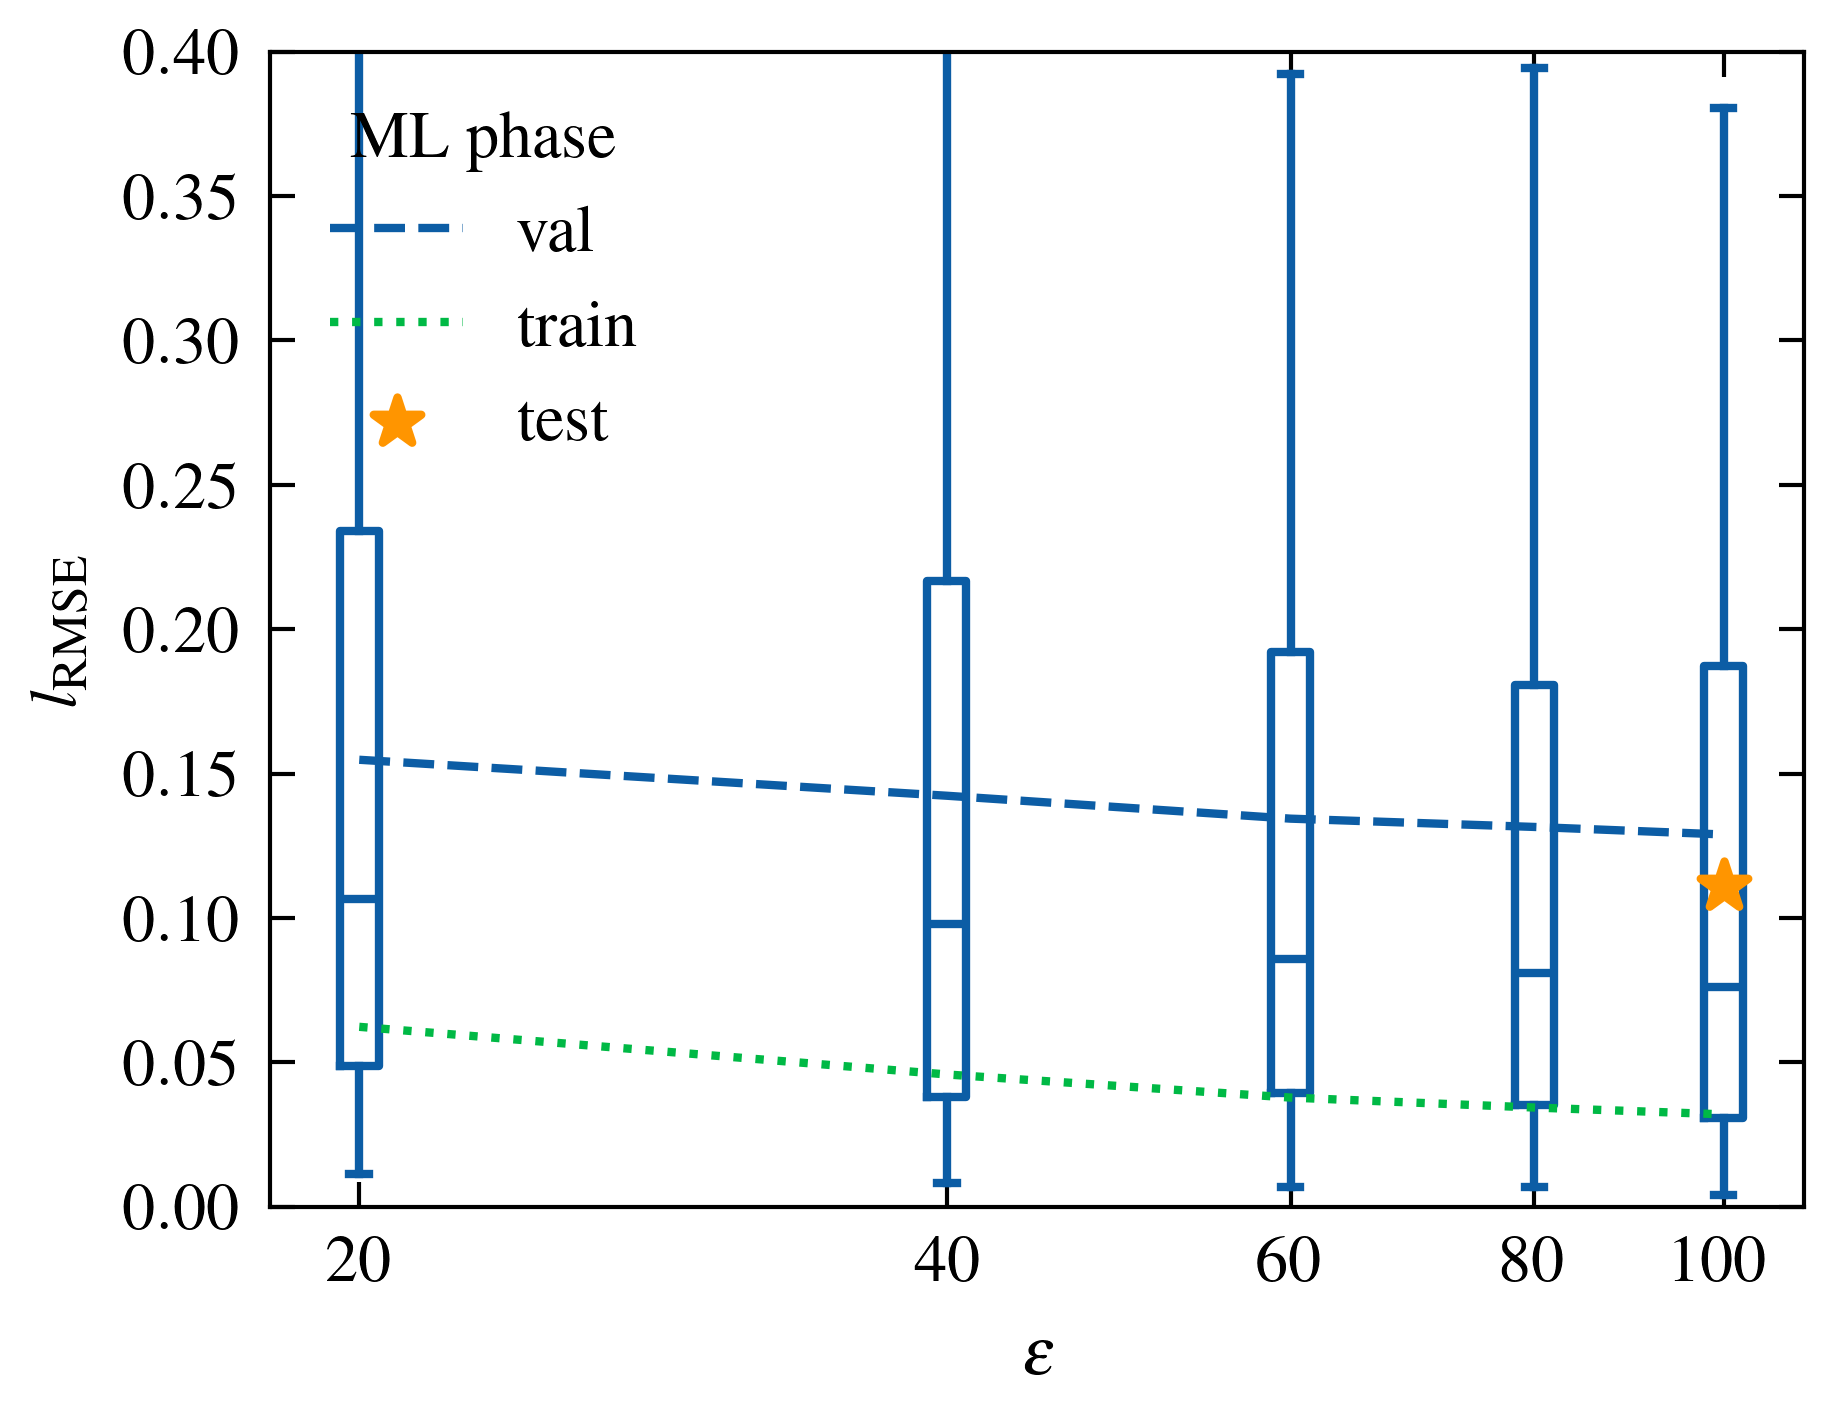

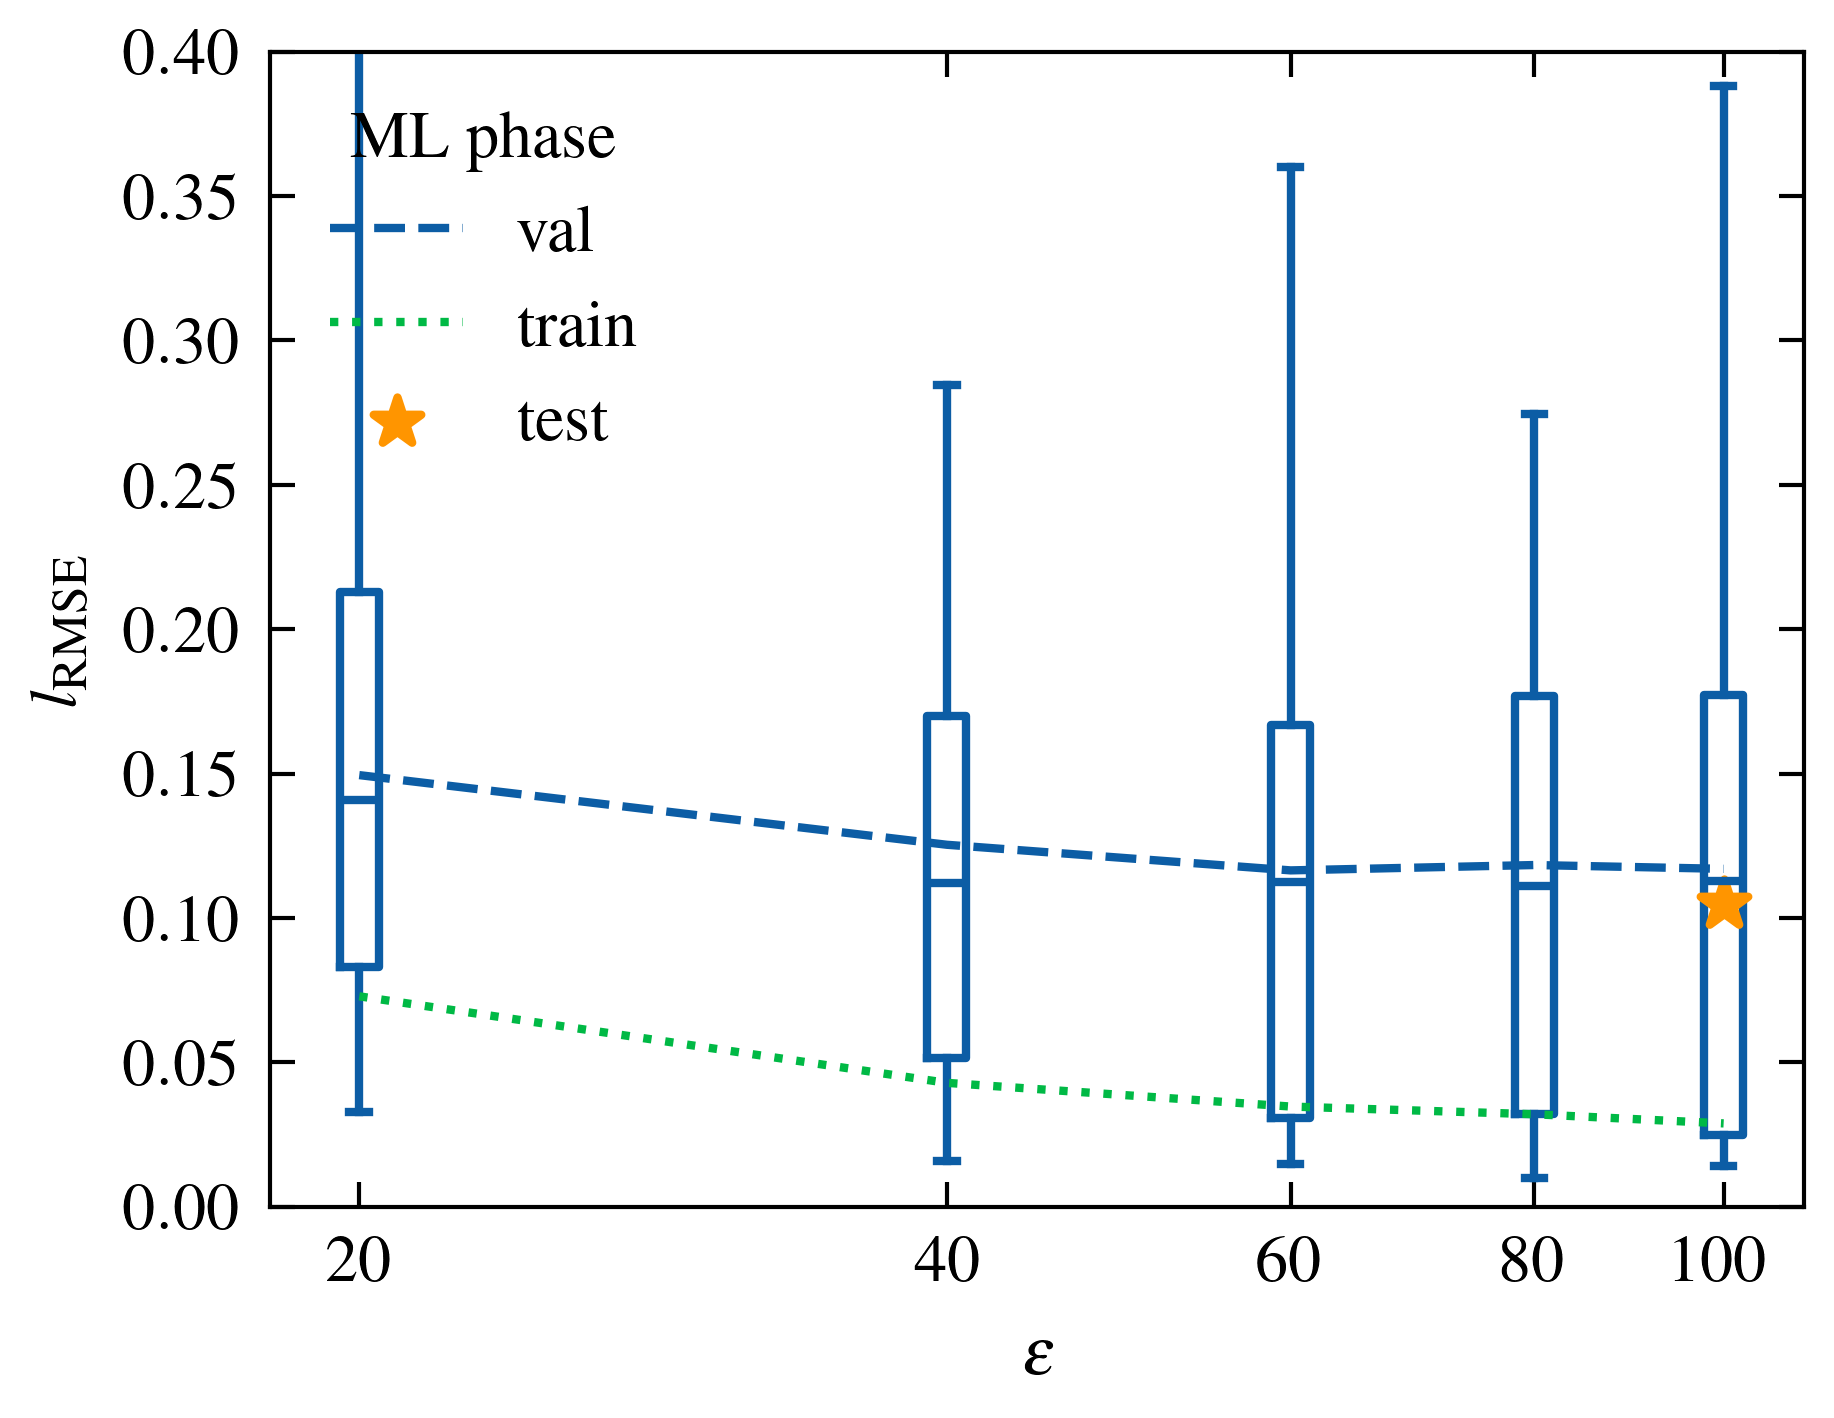

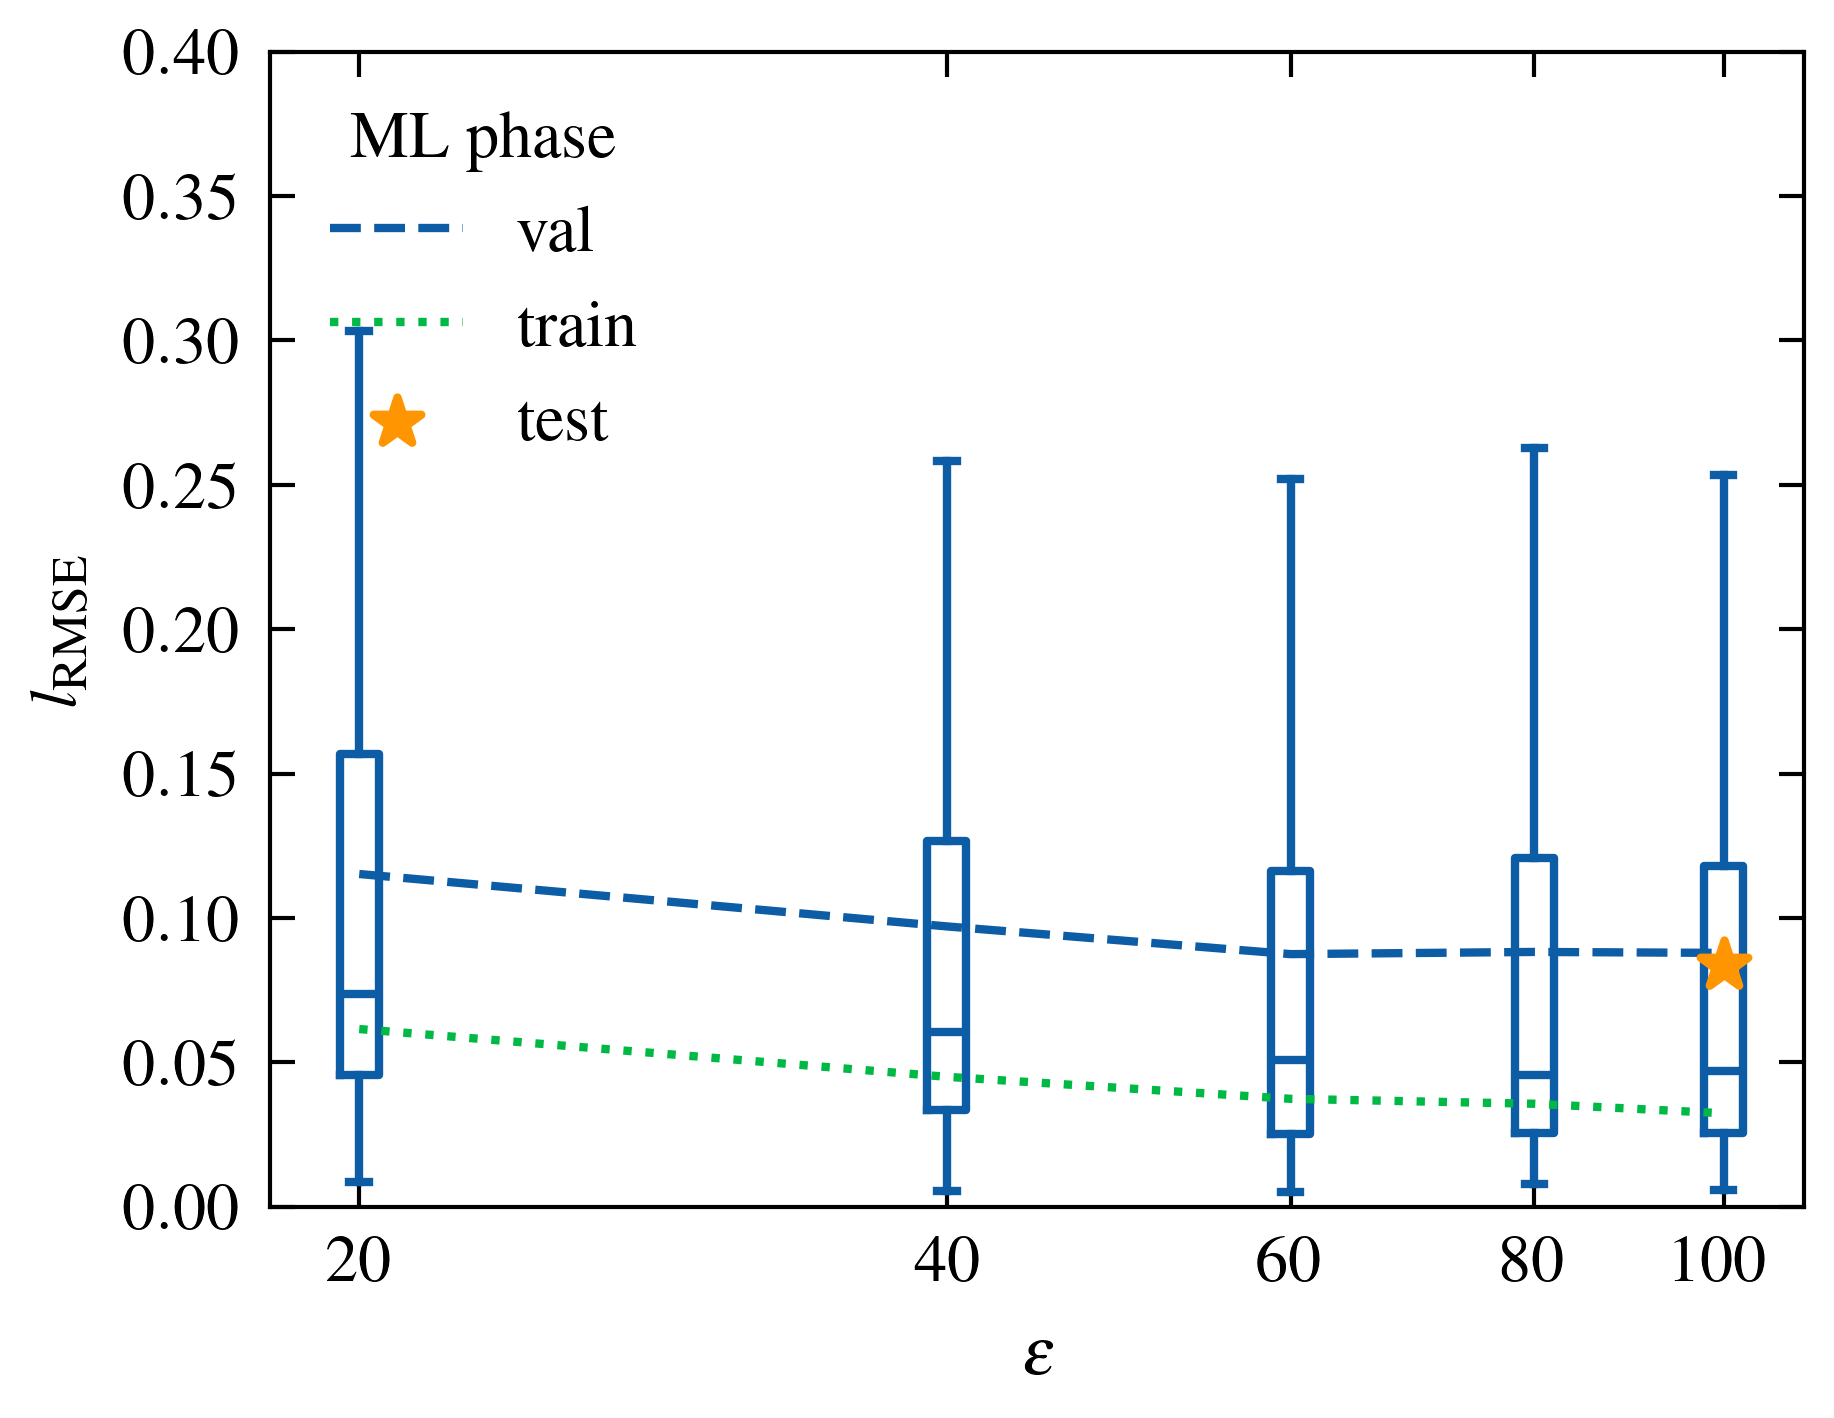

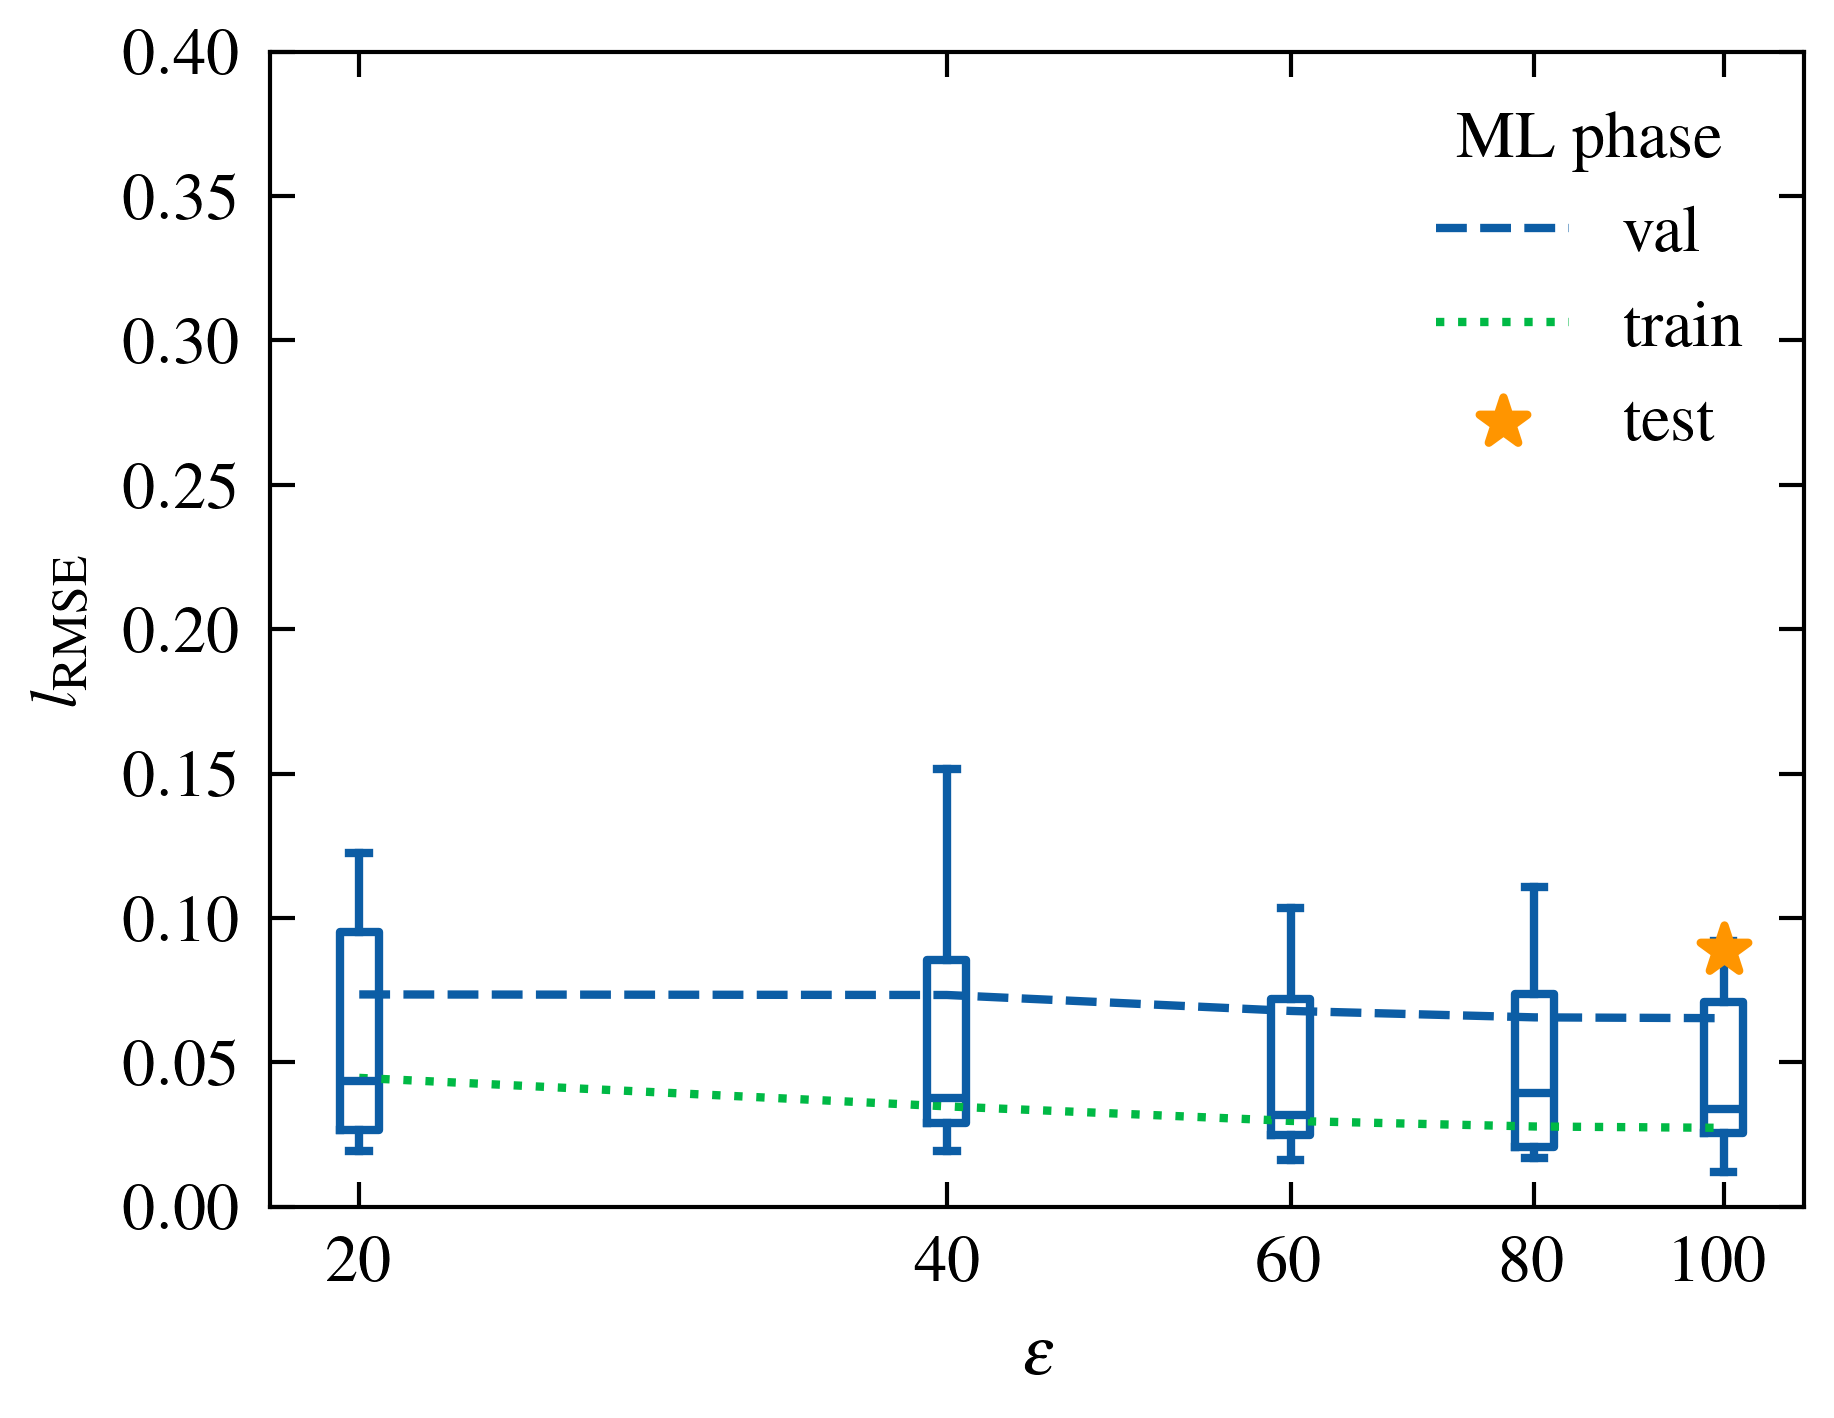

In [49]:
epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{\text{RMSE}}$', xticks=epochs, xticklabels=epochs)


for group in sorted(df.group.unique()):
    df_group = df.loc[df["group"] == group]

    fig, ax = plt.subplots()

    ax.set_xscale('log')
    plt.minorticks_off()

    colors = iter([cm.batlowS(i) for i in range(10)])

    # c_train = next(colors)
    # next(colors)
    # next(colors)
    # c_test = next(colors)
    # c_val = next(colors)
    c_box = dict(color="#0C5DA5")


    average_rmse = df_group.groupby(['phase', 'epoch'])['RMSE'].mean().reset_index()
    for i, phase in enumerate(["val", "train"]):
        df_average_mse_phase = average_rmse.loc[average_rmse['phase'] == phase]
        
        if phase == "train":
            c = "#00B945"
        else:
            c = "#0C5DA5"
        
        # Line plot
        ax.plot(df_average_mse_phase["epoch"], (df_average_mse_phase["RMSE"]), label=phase, linestyle=["--", ":"][i], color=c)
        
        # Box plot
        if phase == "val":
            for epoch in epochs:
                width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
                bp = ax.boxplot((df_group.loc[(df_group['phase'] == phase) & (df_group['epoch'] == epoch)]["RMSE"]), positions=[epoch], showfliers=False, widths=width,
                    boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)

    # Scatter point
    df_test = average_rmse.loc[average_rmse['phase'] == "test"]
    ax.scatter(100, (df_test.loc[df_test["epoch"] == 100]["RMSE"]), label="test", marker="*", zorder=2, color="#FF9500")

    ax.legend(title='ML phase')
    ax.autoscale(tight=True)
    ax.set_xlim([18, 110])
    ax.set_ylim([0, 0.4])
    ax.set(**pparam)

    fig.savefig(f'figures/training_pattern_{group}', dpi=1200)

0.029054724784821805
0.001268472384633449
   phase  epoch      RMSE
10   val     20  0.032748
11   val     40  0.028512
12   val     60  0.028153
13   val     80  0.027432
14   val    100  0.026477
   phase  epoch      RMSE
5  train     20  0.020740
6  train     40  0.012066
7  train     60  0.010220
8  train     80  0.009338
9  train    100  0.007243


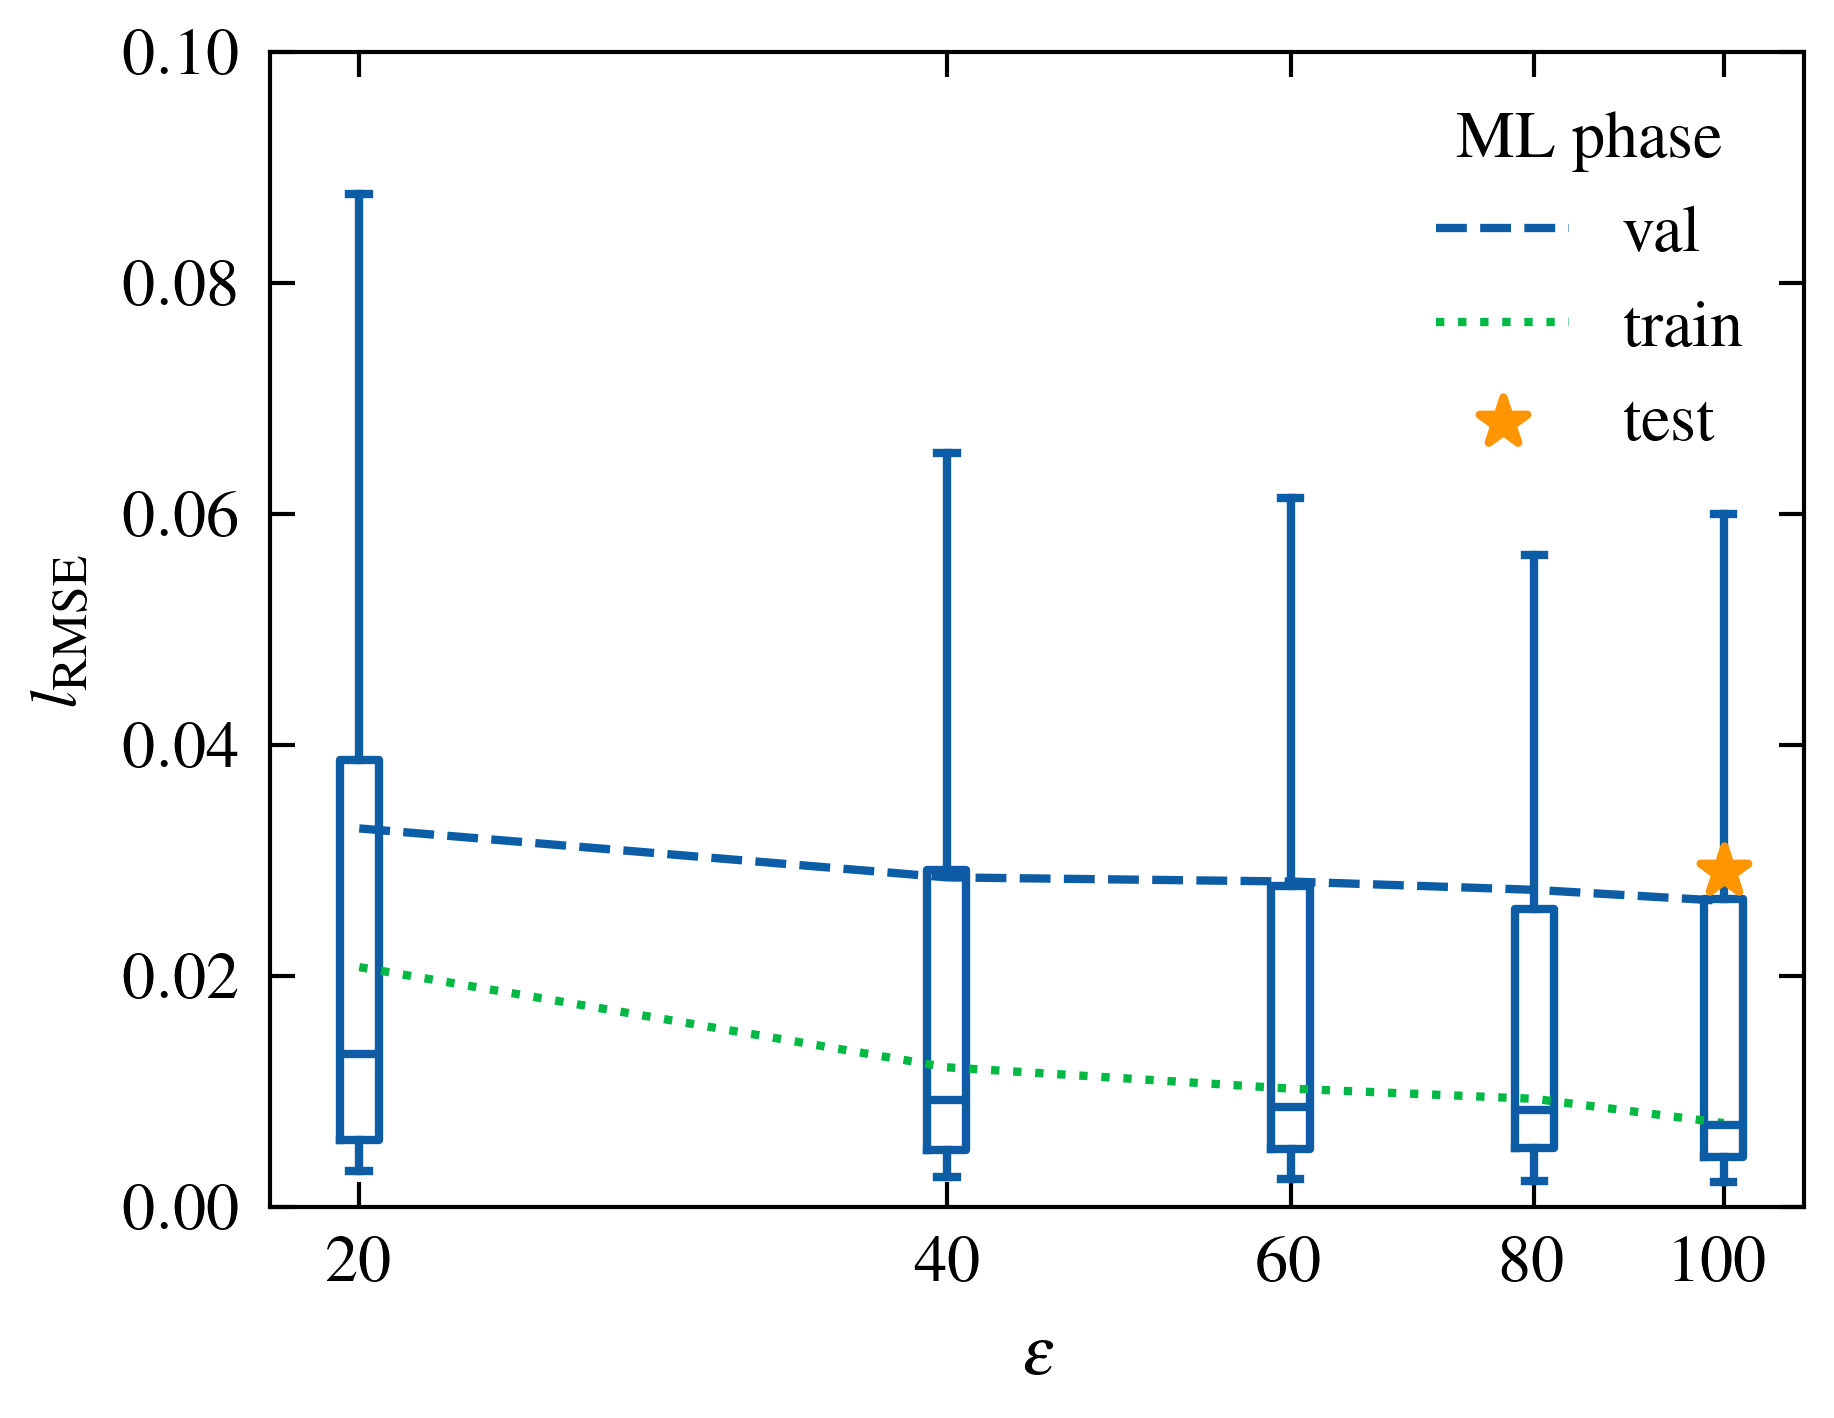

In [46]:
epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{\text{RMSE}}$', xticks=epochs, xticklabels=epochs)

fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

average_mse = df_structure.groupby(['phase', 'epoch'])['RMSE'].mean().reset_index()

print(np.mean(df_structure.query("phase == 'test' & epoch == 100")["RMSE"]))
print(sem(df_structure.query("phase == 'test' & epoch == 100")["RMSE"]))


c_box = dict(color="#0C5DA5")
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    print(df_average_mse_phase)
    if phase == "train":
        c = "#00B945"
    else:
        c = "#0C5DA5"
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], (df_average_mse_phase["RMSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot((df_structure.loc[(df_structure['phase'] == phase) & (df_structure['epoch'] == epoch)]["RMSE"]), positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
ax.scatter(100, (df_test.loc[df_test["epoch"] == 100]["RMSE"]), label="test", marker="*", zorder=2, color="#FF9500")

ax.legend(title='ML phase')
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 0.1])
ax.set(**pparam)

fig.savefig('figures/training_structure', dpi=1200)

In [47]:
df_I = df.loc[df["group"] == "I a -3 d"]